In [60]:
fff=!pwd
print(fff[0]+"/analysis_expression.ipynb")

/workspace/02_cha_drug_repositioning/analysis_expression.ipynb


In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [11]:
import numpy as np
import pandas as pd
import copy
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import pickle

from cmapPy.pandasGEXpress.parse import parse
from cmapPy.pandasGEXpress.write_gct import write
from cmapPy.pandasGEXpress.GCToo import GCToo
from cmapPy.pandasGEXpress.gctx2gct import gctx2gct_main

import torch

import warnings
warnings.filterwarnings('ignore')

In [12]:
from super_classes import param_class as param_class_module
from utils import data_processing as data_processing_module
from utils import data_load as data_load_module
from run import train as train_module
from run import test_model as test_model_module

# Configure parameters

In [13]:
BASE_DIR="/workspace/datafiles/2023/04/02_cha_drug_repositioning/paper_data"
GCTX_PATH_GSE70138="GSE70138_Broad_LINCS_Level4_ZSPCINF_mlr12k_n345976x12328_2017-03-06.gctx"
GCTX_PATH_GSE92742="GSE92742_Broad_LINCS_Level4_ZSPCINF_mlr12k_n1319138x12328.gctx"
TXT_META_PATH_GSE70138="GSE70138_Broad_LINCS_inst_info_2017-03-06.txt"
TXT_META_PATH_GSE92742="GSE92742_Broad_LINCS_inst_info.txt"
PERT_META_PATH_GSE70138="GSE70138_Broad_LINCS_pert_info_2017-03-06.txt"
PERT_META_PATH_GSE92742="GSE92742_Broad_LINCS_pert_info.txt"
TXT_LANDMARK_GENES_PATH="GSE92742_Broad_LINCS_gene_info_delta_landmark.txt"

In [14]:
configurable_parameters_dict={
  "BASE_DIR":BASE_DIR,
  "GCTX_PATH_GSE70138":GCTX_PATH_GSE70138,
  "GCTX_PATH_GSE92742":GCTX_PATH_GSE92742,
  "TXT_META_PATH_GSE70138":TXT_META_PATH_GSE70138,
  "TXT_META_PATH_GSE92742":TXT_META_PATH_GSE92742,
  "PERT_META_PATH_GSE70138":PERT_META_PATH_GSE70138,
  "PERT_META_PATH_GSE92742":PERT_META_PATH_GSE92742
}

# Load data

In [15]:
loaded_gctx_GSE70138=data_load_module.Utils_Data_Load.load_gctx(BASE_DIR,GCTX_PATH_GSE70138)
loaded_gctx_GSE92742=data_load_module.Utils_Data_Load.load_gctx(BASE_DIR,GCTX_PATH_GSE92742)

In [ ]:
loaded_gctx.head(2)

In [ ]:
loaded_gctx.shape

# For fast test

In [ ]:
loaded_gctx_GSE70138=loaded_gctx_GSE70138.iloc[:,:100000]
loaded_gctx_GSE92742=loaded_gctx_GSE92742.iloc[:,:100000]

# Clean column and row names

In [16]:
loaded_gctx_GSE70138=data_processing_module.Utils_Data_Processing.clean_column_row_names(loaded_gctx_GSE70138)
loaded_gctx_GSE92742=data_processing_module.Utils_Data_Processing.clean_column_row_names(loaded_gctx_GSE92742)

In [54]:
display(loaded_gctx_GSE70138.head(2))
display(loaded_gctx_GSE92742.head(2))

,REP.A001_A375_24H_X1_B22:A03,REP.A001_A375_24H_X1_B22:A04,REP.A001_A375_24H_X1_B22:A05,REP.A001_A375_24H_X1_B22:A06,REP.A001_A375_24H_X1_B22:A07,REP.A001_A375_24H_X1_B22:A08,REP.A001_A375_24H_X1_B22:A09,REP.A001_A375_24H_X1_B22:A10,REP.A001_A375_24H_X1_B22:A11,REP.A001_A375_24H_X1_B22:A12,...,REP.A013_YAPC_24H_X2_B22:J17,REP.A013_YAPC_24H_X2_B22:J18,REP.A013_YAPC_24H_X2_B22:J19,REP.A013_YAPC_24H_X2_B22:J20,REP.A013_YAPC_24H_X2_B22:J21,REP.A013_YAPC_24H_X2_B22:J22,REP.A013_YAPC_24H_X2_B22:J23,REP.A013_YAPC_24H_X2_B22:J24,REP.A013_YAPC_24H_X2_B22:K01,REP.A013_YAPC_24H_X2_B22:K02
780,14.8204,-0.5200,-1.0369,-0.3005,0.4163,-0.1698,-0.3789,0.0907,0.5457,-1.1748,...,-0.4274,-1.2330,-0.5048,-0.3748,-0.5988,1.1329,0.4441,1.3877,0.1174,1.1003
7849,0.0000,4.3134,-1.1246,-0.4670,-0.2225,-0.1234,-0.3441,-0.9418,1.2708,-2.1935,...,-0.9481,-0.8872,1.0970,-0.3746,0.0699,-0.0475,0.2455,-0.7401,-0.5027,0.0350


,CPC005_A375_6H_X1_B3_DUO52HI53LO:K06,CPC005_A375_6H_X2_B3_DUO52HI53LO:K06,CPC005_A375_6H_X3_B3_DUO52HI53LO:K06,CPC005_A375_6H_X1_B3_DUO52HI53LO:C19,CPC005_A375_6H_X2_B3_DUO52HI53LO:C19,CPC005_A375_6H_X3_B3_DUO52HI53LO:C19,CPC004_A375_6H_X1_B3_DUO52HI53LO:K13,CPC004_A375_6H_X2_B3_DUO52HI53LO:K13,CPC004_A375_6H_X3_B3_DUO52HI53LO:K13,CPC005_A375_6H_X1_B3_DUO52HI53LO:K20,...,CPC006_NCIH1836_6H_X1_B5_DUO52HI53LO:D22,CPC006_NCIH1836_6H_X2_B5_DUO52HI53LO:D22,CPC006_NCIH1836_6H_X1_B5_DUO52HI53LO:M16,CPC006_NCIH1836_6H_X2_B5_DUO52HI53LO:M16,CPC006_NCIH1836_6H_X1_B5_DUO52HI53LO:D14,CPC006_NCIH1836_6H_X2_B5_DUO52HI53LO:D14,CPC006_NCIH1836_6H_X1_B5_DUO52HI53LO:K05,CPC006_NCIH1836_6H_X2_B5_DUO52HI53LO:K05,CPC006_NCIH1836_6H_X1_B5_DUO52HI53LO:P16,CPC006_NCIH1836_6H_X2_B5_DUO52HI53LO:P16
5720,0.8509,0.6964,0.7763,-0.7216,-0.5528,-0.8905,1.1575,-10.4761,-0.2220,-0.4631,...,0.5787,-1.0934,1.5597,-0.2548,0.3895,1.1967,0.6017,-0.5307,-0.4662,-0.5010
466,0.0117,-1.1202,-1.2383,0.2762,-1.9274,-1.1556,1.6463,2.9997,-0.1231,-0.9180,...,1.3584,0.7433,0.7832,0.0000,-0.2954,-0.3469,-0.5936,0.5569,-0.1558,-0.8841


# Load meta data

In [17]:
loaded_pert_txt_GSE70138=data_load_module.Utils_Data_Load.load_txt(BASE_DIR,TXT_META_PATH_GSE70138)
loaded_pert_txt_GSE92742=data_load_module.Utils_Data_Load.load_txt(BASE_DIR,TXT_META_PATH_GSE92742)
loaded_pert_actual_txt_GSE70138=data_load_module.Utils_Data_Load.load_txt(BASE_DIR,PERT_META_PATH_GSE70138)
loaded_pert_actual_txt_GSE92742=data_load_module.Utils_Data_Load.load_txt(BASE_DIR,PERT_META_PATH_GSE92742)
loaded_landmark_txt=data_load_module.Utils_Data_Load.load_txt(BASE_DIR,TXT_LANDMARK_GENES_PATH)

# left join "loaded_pert_txt" and "loaded_pert_actual_txt"

In [10]:
set(loaded_pert_txt.columns).intersection(set(loaded_pert_actual_txt.columns))

{'pert_id', 'pert_iname', 'pert_type'}

In [18]:
joint_data_pert_pert_actual_GSE70138=loaded_pert_txt_GSE70138.merge(loaded_pert_actual_txt_GSE70138.drop(columns=['pert_iname', 'pert_type']),left_on='pert_id',right_on='pert_id',how='left')
joint_data_pert_pert_actual_GSE92742=loaded_pert_txt_GSE92742.merge(loaded_pert_actual_txt_GSE92742.drop(columns=['pert_iname', 'pert_type']),left_on='pert_id',right_on='pert_id',how='left')

In [58]:
display(joint_data_pert_pert_actual_GSE70138.head(2))
display(joint_data_pert_pert_actual_GSE92742.head(2))

,inst_id,cell_id,det_plate,det_well,pert_mfc_id,pert_dose,pert_dose_unit,pert_id,pert_iname,pert_type,pert_time,pert_time_unit,canonical_smiles,inchi_key
0,LJP005_A375_24H_X1_B19:A03,A375,LJP005_A375_24H_X1_B19,A03,DMSO,-666.0,-666,DMSO,DMSO,ctl_vehicle,24.0,h,CS(=O)C,IAZDPXIOMUYVGZ-UHFFFAOYSA-N
1,LPROT001_A375_6H_X1_B20:B03,A375,LPROT001_A375_6H_X1_B20,B03,DMSO,-666.0,-666,DMSO,DMSO,ctl_vehicle,6.0,h,CS(=O)C,IAZDPXIOMUYVGZ-UHFFFAOYSA-N


,inst_id,rna_plate,rna_well,pert_id,pert_iname,pert_type,pert_dose,pert_dose_unit,pert_time,pert_time_unit,cell_id,is_touchstone,inchi_key_prefix,inchi_key,canonical_smiles,pubchem_cid
0,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:F13,ASG001_MCF7_24H_X1,F13,DMSO,DMSO,ctl_vehicle,0.1,%,24,h,MCF7,1.0,IAZDPXIOMUYVGZ,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,CS(=O)C,-666
1,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:G13,ASG001_MCF7_24H_X1,G13,DMSO,DMSO,ctl_vehicle,0.1,%,24,h,MCF7,1.0,IAZDPXIOMUYVGZ,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,CS(=O)C,-666


# Set index data

In [19]:
joint_data_pert_pert_actual_GSE70138.index=list(joint_data_pert_pert_actual_GSE70138['inst_id'])
joint_data_pert_pert_actual_GSE92742.index=list(joint_data_pert_pert_actual_GSE92742['inst_id'])
loaded_landmark_txt.index=[str(i) for i in loaded_landmark_txt['pr_gene_id']]

In [61]:
display(joint_data_pert_pert_actual_GSE70138.head(2))
display(joint_data_pert_pert_actual_GSE92742.head(2))
display(loaded_landmark_txt.head(2))

,inst_id,cell_id,det_plate,det_well,pert_mfc_id,pert_dose,pert_dose_unit,pert_id,pert_iname,pert_type,pert_time,pert_time_unit,canonical_smiles,inchi_key
LJP005_A375_24H_X1_B19:A03,LJP005_A375_24H_X1_B19:A03,A375,LJP005_A375_24H_X1_B19,A03,DMSO,-666.0,-666,DMSO,DMSO,ctl_vehicle,24.0,h,CS(=O)C,IAZDPXIOMUYVGZ-UHFFFAOYSA-N
LPROT001_A375_6H_X1_B20:B03,LPROT001_A375_6H_X1_B20:B03,A375,LPROT001_A375_6H_X1_B20,B03,DMSO,-666.0,-666,DMSO,DMSO,ctl_vehicle,6.0,h,CS(=O)C,IAZDPXIOMUYVGZ-UHFFFAOYSA-N


,inst_id,rna_plate,rna_well,pert_id,pert_iname,pert_type,pert_dose,pert_dose_unit,pert_time,pert_time_unit,cell_id,is_touchstone,inchi_key_prefix,inchi_key,canonical_smiles,pubchem_cid
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:F13,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:F13,ASG001_MCF7_24H_X1,F13,DMSO,DMSO,ctl_vehicle,0.1,%,24,h,MCF7,1.0,IAZDPXIOMUYVGZ,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,CS(=O)C,-666
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:G13,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:G13,ASG001_MCF7_24H_X1,G13,DMSO,DMSO,ctl_vehicle,0.1,%,24,h,MCF7,1.0,IAZDPXIOMUYVGZ,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,CS(=O)C,-666


,pr_gene_id,pr_gene_symbol,pr_gene_title
780,780,DDR1,discoidin domain receptor tyrosine kinase 1
7849,7849,PAX8,paired box 8


# Remove -666 rows (non drugs)

In [20]:
joint_data_pert_pert_actual_remove_non_drug_GSE70138=joint_data_pert_pert_actual_GSE70138.drop(joint_data_pert_pert_actual_GSE70138[(joint_data_pert_pert_actual_GSE70138['canonical_smiles']=="-666")].index)
joint_data_pert_pert_actual_remove_non_drug_GSE92742=joint_data_pert_pert_actual_GSE92742.drop(joint_data_pert_pert_actual_GSE92742[(joint_data_pert_pert_actual_GSE92742['canonical_smiles']=="-666")].index)

In [62]:
display(joint_data_pert_pert_actual_remove_non_drug_GSE70138.head(2))
display(joint_data_pert_pert_actual_remove_non_drug_GSE92742.head(2))

,inst_id,cell_id,det_plate,det_well,pert_mfc_id,pert_dose,pert_dose_unit,pert_id,pert_iname,pert_type,pert_time,pert_time_unit,canonical_smiles,inchi_key
LJP005_A375_24H_X1_B19:A12,LJP005_A375_24H_X1_B19:A12,A375,LJP005_A375_24H_X1_B19,A12,BRD-K76908866-001-06-8,0.04,um,BRD-K76908866,CP-724714,trt_cp,24.0,h,COCC(=O)NC\C=C\c1ccc2ncnc(Nc3ccc(Oc4ccc(C)nc4)...,LLVZBTWPGQVVLW-SNAWJCMRSA-N
LJP005_A375_24H_X1_B19:E09,LJP005_A375_24H_X1_B19:E09,A375,LJP005_A375_24H_X1_B19,E09,BRD-K93788137-001-03-3,1.11,um,BRD-K93788137,PF-431396,trt_cp,24.0,h,CN(c1ccccc1CNc1nc(Nc2ccc3NC(=O)Cc3c2)ncc1C(F)(...,POJZIZBONPAWIV-UHFFFAOYSA-N


,inst_id,rna_plate,rna_well,pert_id,pert_iname,pert_type,pert_dose,pert_dose_unit,pert_time,pert_time_unit,cell_id,is_touchstone,inchi_key_prefix,inchi_key,canonical_smiles,pubchem_cid
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:A06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:A06,ASG001_MCF7_24H_X1,A06,BRD-A60070924,alpha-estradiol,trt_cp,10.0,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:B06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:B06,ASG001_MCF7_24H_X1,B06,BRD-A60070924,alpha-estradiol,trt_cp,2.0,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450


# Leave only trt_cp in pert_type

In [21]:
# https://clue.io/connectopedia/perturbagen_types_and_controls
joint_data_pert_pert_actual_remove_non_drug_GSE70138=joint_data_pert_pert_actual_remove_non_drug_GSE70138[joint_data_pert_pert_actual_remove_non_drug_GSE70138['pert_type']=="trt_cp"]
joint_data_pert_pert_actual_remove_non_drug_GSE92742=joint_data_pert_pert_actual_remove_non_drug_GSE92742[joint_data_pert_pert_actual_remove_non_drug_GSE92742['pert_type']=="trt_cp"]

In [69]:
display(joint_data_pert_pert_actual_remove_non_drug_GSE70138.head())
print(joint_data_pert_pert_actual_remove_non_drug_GSE70138.shape)
display(joint_data_pert_pert_actual_remove_non_drug_GSE92742.head())
print(joint_data_pert_pert_actual_remove_non_drug_GSE92742.shape)

,inst_id,cell_id,det_plate,det_well,pert_mfc_id,pert_dose,pert_dose_unit,pert_id,pert_iname,pert_type,pert_time,pert_time_unit,canonical_smiles,inchi_key
LJP005_A375_24H_X1_B19:A12,LJP005_A375_24H_X1_B19:A12,A375,LJP005_A375_24H_X1_B19,A12,BRD-K76908866-001-06-8,0.04,um,BRD-K76908866,CP-724714,trt_cp,24.0,h,COCC(=O)NC\C=C\c1ccc2ncnc(Nc3ccc(Oc4ccc(C)nc4)...,LLVZBTWPGQVVLW-SNAWJCMRSA-N
LJP005_A375_24H_X1_B19:E09,LJP005_A375_24H_X1_B19:E09,A375,LJP005_A375_24H_X1_B19,E09,BRD-K93788137-001-03-3,1.11,um,BRD-K93788137,PF-431396,trt_cp,24.0,h,CN(c1ccccc1CNc1nc(Nc2ccc3NC(=O)Cc3c2)ncc1C(F)(...,POJZIZBONPAWIV-UHFFFAOYSA-N
LJP005_A375_24H_X3_B19:K19,LJP005_A375_24H_X3_B19:K19,A375,LJP005_A375_24H_X3_B19,K19,BRD-A18328003-001-02-5,10.00,um,BRD-A18328003,GDC-0980,trt_cp,24.0,h,CC1=C(SC2=C1N=C(N=C2N3CCOCC3)C4=CN=C(N=C4)N)CN...,YOVVNQKCSKSHKT-UHFFFAOYSA-N
LJP005_A375_24H_X3_B19:K20,LJP005_A375_24H_X3_B19:K20,A375,LJP005_A375_24H_X3_B19,K20,BRD-A18328003-001-02-5,3.33,um,BRD-A18328003,GDC-0980,trt_cp,24.0,h,CC1=C(SC2=C1N=C(N=C2N3CCOCC3)C4=CN=C(N=C4)N)CN...,YOVVNQKCSKSHKT-UHFFFAOYSA-N
LJP005_A375_24H_X3_B19:K21,LJP005_A375_24H_X3_B19:K21,A375,LJP005_A375_24H_X3_B19,K21,BRD-A18328003-001-02-5,1.11,um,BRD-A18328003,GDC-0980,trt_cp,24.0,h,CC1=C(SC2=C1N=C(N=C2N3CCOCC3)C4=CN=C(N=C4)N)CN...,YOVVNQKCSKSHKT-UHFFFAOYSA-N


(314422, 14)


,inst_id,rna_plate,rna_well,pert_id,pert_iname,pert_type,pert_dose,pert_dose_unit,pert_time,pert_time_unit,cell_id,is_touchstone,inchi_key_prefix,inchi_key,canonical_smiles,pubchem_cid
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:A06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:A06,ASG001_MCF7_24H_X1,A06,BRD-A60070924,alpha-estradiol,trt_cp,10.00,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:B06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:B06,ASG001_MCF7_24H_X1,B06,BRD-A60070924,alpha-estradiol,trt_cp,2.00,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:C06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:C06,ASG001_MCF7_24H_X1,C06,BRD-A60070924,alpha-estradiol,trt_cp,0.40,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:D06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:D06,ASG001_MCF7_24H_X1,D06,BRD-A60070924,alpha-estradiol,trt_cp,0.08,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:E06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:E06,ASG001_MCF7_24H_X1,E06,BRD-A60070924,alpha-estradiol,trt_cp,10.00,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450


(663874, 16)


# Merge "loaded_gctx" and "loaded_landmark_txt" (leave only landmark genes)

In [22]:
expression_df_by_landmarks_GSE70138=pd.merge(loaded_gctx_GSE70138,loaded_landmark_txt,left_index=True,right_index=True,how='inner')
expression_df_by_landmarks_GSE92742=pd.merge(loaded_gctx_GSE92742,loaded_landmark_txt,left_index=True,right_index=True,how='inner')

In [71]:
display(expression_df_by_landmarks_GSE70138.head(2))
display(expression_df_by_landmarks_GSE92742.head(2))

,REP.A001_A375_24H_X1_B22:A03,REP.A001_A375_24H_X1_B22:A04,REP.A001_A375_24H_X1_B22:A05,REP.A001_A375_24H_X1_B22:A06,REP.A001_A375_24H_X1_B22:A07,REP.A001_A375_24H_X1_B22:A08,REP.A001_A375_24H_X1_B22:A09,REP.A001_A375_24H_X1_B22:A10,REP.A001_A375_24H_X1_B22:A11,REP.A001_A375_24H_X1_B22:A12,...,XPR002_YAPC.311_96H_X3_B22:P17,XPR002_YAPC.311_96H_X3_B22:P18,XPR002_YAPC.311_96H_X3_B22:P19,XPR002_YAPC.311_96H_X3_B22:P21,XPR002_YAPC.311_96H_X3_B22:P22,XPR002_YAPC.311_96H_X3_B22:P23,XPR002_YAPC.311_96H_X3_B22:P24,pr_gene_id,pr_gene_symbol,pr_gene_title
780,14.8204,-0.5200,-1.0369,-0.3005,0.4163,-0.1698,-0.3789,0.0907,0.5457,-1.1748,...,0.2624,-0.8600,3.7718,-0.0917,0.1214,-1.2161,-0.1781,780,DDR1,discoidin domain receptor tyrosine kinase 1
7849,0.0000,4.3134,-1.1246,-0.4670,-0.2225,-0.1234,-0.3441,-0.9418,1.2708,-2.1935,...,0.1521,0.0461,-0.1812,-0.6319,1.6618,0.7115,0.3420,7849,PAX8,paired box 8


,CPC005_A375_6H_X1_B3_DUO52HI53LO:K06,CPC005_A375_6H_X2_B3_DUO52HI53LO:K06,CPC005_A375_6H_X3_B3_DUO52HI53LO:K06,CPC005_A375_6H_X1_B3_DUO52HI53LO:C19,CPC005_A375_6H_X2_B3_DUO52HI53LO:C19,CPC005_A375_6H_X3_B3_DUO52HI53LO:C19,CPC004_A375_6H_X1_B3_DUO52HI53LO:K13,CPC004_A375_6H_X2_B3_DUO52HI53LO:K13,CPC004_A375_6H_X3_B3_DUO52HI53LO:K13,CPC005_A375_6H_X1_B3_DUO52HI53LO:K20,...,PCLB003_PC3_24H_X3_B13:P18,PCLB003_PC3_24H_X3_B13:P19,PCLB003_PC3_24H_X3_B13:P20,PCLB003_PC3_24H_X3_B13:P21,PCLB003_PC3_24H_X3_B13:P22,PCLB003_PC3_24H_X3_B13:P23,PCLB003_PC3_24H_X3_B13:P24,pr_gene_id,pr_gene_symbol,pr_gene_title
55847,0.2106,1.1142,-0.5801,-0.9112,0.5033,3.0285,0.9118,0.0184,-0.0293,-1.2838,...,0.1329,0.4067,0.5962,-0.1673,1.3051,0.7453,0.1329,55847,CISD1,CDGSH iron sulfur domain 1
25803,0.2892,0.1883,0.6909,1.4429,6.0724,-1.2484,0.8752,3.4359,0.1169,-1.3850,...,-1.9368,-1.1910,0.1538,-0.9033,-0.9033,-1.6760,0.5652,25803,SPDEF,SAM pointed domain containing ETS transcriptio...


# Transpose df

In [23]:
expression_df_by_landmarks_T_GSE70138=expression_df_by_landmarks_GSE70138.T
expression_df_by_landmarks_T_GSE92742=expression_df_by_landmarks_GSE92742.T

In [22]:
display(expression_df_by_landmarks_T_GSE70138.head(2))
display(expression_df_by_landmarks_T_GSE92742.head(2))

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CTNS,TSTA3,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1
REP.A001_A375_24H_X1_B22:A03,14.8204,0.0,-0.3428,-0.7251,0.0,0.2381,0.3615,-0.2455,-1.4629,-0.3523,...,0.7094,0.375,1.9697,1.0853,-0.672,0.1111,4.2066,-1.8642,1.8391,-0.8088
REP.A001_A375_24H_X1_B22:A04,-0.52,4.3134,-0.8369,0.2381,0.0,0.8633,0.9437,1.345,0.9622,-0.4702,...,0.867,0.484,-0.3556,1.5125,0.8923,-0.5714,-0.3861,-0.35,-0.9354,-0.7052


,CISD1,SPDEF,IGF1R,GSTM2,SPTLC2,TSKU,TMEM2,SLC2A6,EZH2,ICAM3,...,PPP2R5B,NIPBL,PPP2R3A,DTNA,MEGF9,RAB3GAP1,ALMS1,HBE1,QRSL1,MAN2A2
CPC005_A375_6H_X1_B3_DUO52HI53LO:K06,0.2106,0.2892,-0.3222,-0.5751,-0.8432,-0.0981,0.1181,0.3545,-0.9332,0.9282,...,-0.2673,0.5202,0.4783,0.3221,1.7838,0.6258,-0.6607,1.5576,0.5938,0.8408
CPC005_A375_6H_X2_B3_DUO52HI53LO:K06,1.1142,0.1883,-0.0239,1.121,-0.8318,-0.4604,-0.7833,0.2543,-0.8127,-0.2484,...,-0.1253,-0.4552,1.8226,1.9999,1.1418,-1.5645,1.2444,1.9761,0.52,1.0644


# Give gene names to columns

In [24]:
expression_df_by_landmarks_T_GSE70138.columns=list(expression_df_by_landmarks_T_GSE70138.loc["pr_gene_symbol",:])
expression_df_by_landmarks_T_GSE92742.columns=list(expression_df_by_landmarks_T_GSE92742.loc["pr_gene_symbol",:])

In [20]:
display(expression_df_by_landmarks_T_GSE70138.head(2))
display(expression_df_by_landmarks_T_GSE92742.head(2))

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CTNS,TSTA3,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1
REP.A001_A375_24H_X1_B22:A03,14.8204,0.0,-0.3428,-0.7251,0.0,0.2381,0.3615,-0.2455,-1.4629,-0.3523,...,0.7094,0.375,1.9697,1.0853,-0.672,0.1111,4.2066,-1.8642,1.8391,-0.8088
REP.A001_A375_24H_X1_B22:A04,-0.52,4.3134,-0.8369,0.2381,0.0,0.8633,0.9437,1.345,0.9622,-0.4702,...,0.867,0.484,-0.3556,1.5125,0.8923,-0.5714,-0.3861,-0.35,-0.9354,-0.7052


,CISD1,SPDEF,IGF1R,GSTM2,SPTLC2,TSKU,TMEM2,SLC2A6,EZH2,ICAM3,...,PPP2R5B,NIPBL,PPP2R3A,DTNA,MEGF9,RAB3GAP1,ALMS1,HBE1,QRSL1,MAN2A2
CPC005_A375_6H_X1_B3_DUO52HI53LO:K06,0.2106,0.2892,-0.3222,-0.5751,-0.8432,-0.0981,0.1181,0.3545,-0.9332,0.9282,...,-0.2673,0.5202,0.4783,0.3221,1.7838,0.6258,-0.6607,1.5576,0.5938,0.8408
CPC005_A375_6H_X2_B3_DUO52HI53LO:K06,1.1142,0.1883,-0.0239,1.121,-0.8318,-0.4604,-0.7833,0.2543,-0.8127,-0.2484,...,-0.1253,-0.4552,1.8226,1.9999,1.1418,-1.5645,1.2444,1.9761,0.52,1.0644


In [25]:
test_keys=[str(one) for one in list(loaded_landmark_txt['pr_gene_id'])]
test_values=loaded_landmark_txt['pr_gene_symbol']
res = {test_keys[i]: test_values[i] for i in range(len(test_keys))}
res

{'780': 'DDR1',
 '7849': 'PAX8',
 '23': 'ABCF1',
 '9552': 'SPAG7',
 '10921': 'RNPS1',
 '10285': 'SMNDC1',
 '533': 'ATP6V0B',
 '23326': 'USP22',
 '9761': 'MLEC',
 '3927': 'LASP1',
 '1465': 'CSRP1',
 '5792': 'PTPRF',
 '3337': 'DNAJB1',
 '7494': 'XBP1',
 '2896': 'GRN',
 '3098': 'HK1',
 '11014': 'KDELR2',
 '823': 'CAPN1',
 '813': 'CALU',
 '1509': 'CTSD',
 '3925': 'STMN1',
 '1891': 'ECH1',
 '8826': 'IQGAP1',
 '1153': 'CIRBP',
 '5048': 'PAFAH1B1',
 '10525': 'HYOU1',
 '2058': 'EPRS',
 '1152': 'CKB',
 '6772': 'STAT1',
 '2288': 'FKBP4',
 '3895': 'KTN1',
 '10972': 'TMED10',
 '10099': 'TSPAN3',
 '2778': 'GNAS',
 '16': 'AARS',
 '3032': 'HADHB',
 '6184': 'RPN1',
 '10606': 'PAICS',
 '10904': 'BLCAP',
 '3033': 'HADH',
 '2771': 'GNAI2',
 '6599': 'SMARCC1',
 '9375': 'TM9SF2',
 '8396': 'PIP4K2B',
 '5829': 'PXN',
 '9276': 'COPB2',
 '10857': 'PGRMC1',
 '3693': 'ITGB5',
 '5355': 'PLP2',
 '4780': 'NFE2L2',
 '4154': 'MBNL1',
 '4836': 'NMT1',
 '8531': 'YBX3',
 '8553': 'BHLHE40',
 '54386': 'TERF2IP',
 '25793':

# Remove unnecessary data (last 3 rows)

In [26]:
expression_df_by_landmarks_T_wo_unnecessary_rows_GSE70138=expression_df_by_landmarks_T_GSE70138.drop(["pr_gene_id","pr_gene_symbol","pr_gene_title"],axis='index')
expression_df_by_landmarks_T_wo_unnecessary_rows_GSE92742=expression_df_by_landmarks_T_GSE92742.drop(["pr_gene_id","pr_gene_symbol","pr_gene_title"],axis='index')

In [36]:
display(expression_df_by_landmarks_T_wo_unnecessary_rows_GSE70138.head(2))
display(expression_df_by_landmarks_T_wo_unnecessary_rows_GSE92742.head(2))

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CTNS,TSTA3,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1
REP.A001_A375_24H_X1_B22:A03,14.8204,0.0,-0.3428,-0.7251,0.0,0.2381,0.3615,-0.2455,-1.4629,-0.3523,...,0.7094,0.375,1.9697,1.0853,-0.672,0.1111,4.2066,-1.8642,1.8391,-0.8088
REP.A001_A375_24H_X1_B22:A04,-0.52,4.3134,-0.8369,0.2381,0.0,0.8633,0.9437,1.345,0.9622,-0.4702,...,0.867,0.484,-0.3556,1.5125,0.8923,-0.5714,-0.3861,-0.35,-0.9354,-0.7052


,CISD1,SPDEF,IGF1R,GSTM2,SPTLC2,TSKU,TMEM2,SLC2A6,EZH2,ICAM3,...,PPP2R5B,NIPBL,PPP2R3A,DTNA,MEGF9,RAB3GAP1,ALMS1,HBE1,QRSL1,MAN2A2
CPC005_A375_6H_X1_B3_DUO52HI53LO:K06,0.2106,0.2892,-0.3222,-0.5751,-0.8432,-0.0981,0.1181,0.3545,-0.9332,0.9282,...,-0.2673,0.5202,0.4783,0.3221,1.7838,0.6258,-0.6607,1.5576,0.5938,0.8408
CPC005_A375_6H_X2_B3_DUO52HI53LO:K06,1.1142,0.1883,-0.0239,1.121,-0.8318,-0.4604,-0.7833,0.2543,-0.8127,-0.2484,...,-0.1253,-0.4552,1.8226,1.9999,1.1418,-1.5645,1.2444,1.9761,0.52,1.0644


# Merge "expression_df_by_landmarks_T_wo_unnecessary_rows" and "joint_data_pert_pert_actual_remove_non_drug"

In [26]:
display(expression_df_by_landmarks_T_wo_unnecessary_rows_GSE70138)
display(joint_data_pert_pert_actual_remove_non_drug_GSE70138)
display(expression_df_by_landmarks_T_wo_unnecessary_rows_GSE92742)
display(joint_data_pert_pert_actual_remove_non_drug_GSE92742)

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CTNS,TSTA3,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1
REP.A001_A375_24H_X1_B22:A03,14.8204,0.0,-0.3428,-0.7251,0.0,0.2381,0.3615,-0.2455,-1.4629,-0.3523,...,0.7094,0.375,1.9697,1.0853,-0.672,0.1111,4.2066,-1.8642,1.8391,-0.8088
REP.A001_A375_24H_X1_B22:A04,-0.52,4.3134,-0.8369,0.2381,0.0,0.8633,0.9437,1.345,0.9622,-0.4702,...,0.867,0.484,-0.3556,1.5125,0.8923,-0.5714,-0.3861,-0.35,-0.9354,-0.7052
REP.A001_A375_24H_X1_B22:A05,-1.0369,-1.1246,0.4273,0.4431,-12.0546,-0.9982,-0.3025,1.1257,-0.1755,-1.808,...,3.012,-2.7835,-2.0614,1.0125,-1.5032,-0.2322,0.2059,1.3284,0.7052,-0.5938
REP.A001_A375_24H_X1_B22:A06,-0.3005,-0.467,-0.5573,-0.4323,1.0573,0.8633,0.8386,1.345,0.2052,-0.5396,...,0.1901,0.0736,0.1695,1.2331,-0.9634,-0.7223,-1.3643,0.2662,-1.1066,-0.6409
REP.A001_A375_24H_X1_B22:A07,0.4163,-0.2225,0.9273,0.0202,0.0,-0.4607,0.0204,0.6745,-0.3362,0.6315,...,-0.3424,-1.9697,-0.7345,3.5454,-7.9314,-1.4845,0.7707,0.2316,-0.8891,-0.1372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPR002_YAPC.311_96H_X3_B22:P19,3.7718,-0.1812,0.8485,0.6561,1.1396,-0.6286,-1.3584,-8.0871,1.1781,1.1403,...,-1.1505,-2.4626,-0.8016,0.027,-1.1676,-0.1264,-0.0498,0.4958,-0.2879,0.5873
XPR002_YAPC.311_96H_X3_B22:P21,-0.0917,-0.6319,0.0,-1.5178,-0.6745,0.4512,-1.4404,1.0913,0.2498,-0.1316,...,-0.7953,-0.7957,-0.5181,-0.4776,0.1737,0.7452,0.3936,0.2968,-0.9849,-0.689
XPR002_YAPC.311_96H_X3_B22:P22,0.1214,1.6618,2.0524,0.2665,-1.0193,-0.6286,-3.0051,-0.2354,-1.4309,-0.9119,...,1.4419,-1.1496,-1.2415,1.4665,-2.2397,-0.374,-0.6745,1.1215,1.3827,0.2558
XPR002_YAPC.311_96H_X3_B22:P23,-1.2161,0.7115,0.0127,-2.1421,0.1503,-0.3872,0.0,1.2235,0.4029,0.6153,...,-0.4318,-0.9837,-1.6384,-0.8351,-0.6606,0.9696,15.3159,0.893,-0.0073,0.3188


,inst_id,cell_id,det_plate,det_well,pert_mfc_id,pert_dose,pert_dose_unit,pert_id,pert_iname,pert_type,pert_time,pert_time_unit,canonical_smiles,inchi_key
LJP005_A375_24H_X1_B19:A12,LJP005_A375_24H_X1_B19:A12,A375,LJP005_A375_24H_X1_B19,A12,BRD-K76908866-001-06-8,0.040000,um,BRD-K76908866,CP-724714,trt_cp,24.0,h,COCC(=O)NC\C=C\c1ccc2ncnc(Nc3ccc(Oc4ccc(C)nc4)...,LLVZBTWPGQVVLW-SNAWJCMRSA-N
LJP005_A375_24H_X1_B19:E09,LJP005_A375_24H_X1_B19:E09,A375,LJP005_A375_24H_X1_B19,E09,BRD-K93788137-001-03-3,1.110000,um,BRD-K93788137,PF-431396,trt_cp,24.0,h,CN(c1ccccc1CNc1nc(Nc2ccc3NC(=O)Cc3c2)ncc1C(F)(...,POJZIZBONPAWIV-UHFFFAOYSA-N
LJP005_A375_24H_X3_B19:K19,LJP005_A375_24H_X3_B19:K19,A375,LJP005_A375_24H_X3_B19,K19,BRD-A18328003-001-02-5,10.000000,um,BRD-A18328003,GDC-0980,trt_cp,24.0,h,CC1=C(SC2=C1N=C(N=C2N3CCOCC3)C4=CN=C(N=C4)N)CN...,YOVVNQKCSKSHKT-UHFFFAOYSA-N
LJP005_A375_24H_X3_B19:K20,LJP005_A375_24H_X3_B19:K20,A375,LJP005_A375_24H_X3_B19,K20,BRD-A18328003-001-02-5,3.330000,um,BRD-A18328003,GDC-0980,trt_cp,24.0,h,CC1=C(SC2=C1N=C(N=C2N3CCOCC3)C4=CN=C(N=C4)N)CN...,YOVVNQKCSKSHKT-UHFFFAOYSA-N
LJP005_A375_24H_X3_B19:K21,LJP005_A375_24H_X3_B19:K21,A375,LJP005_A375_24H_X3_B19,K21,BRD-A18328003-001-02-5,1.110000,um,BRD-A18328003,GDC-0980,trt_cp,24.0,h,CC1=C(SC2=C1N=C(N=C2N3CCOCC3)C4=CN=C(N=C4)N)CN...,YOVVNQKCSKSHKT-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REP.A028_YAPC_24H_X3_B25:P20,REP.A028_YAPC_24H_X3_B25:P20,YAPC,REP.A028_YAPC_24H_X3_B25,P20,BRD-A97502381-001-01-3,3.333330,um,BRD-A97502381,cyanocobalamin,trt_cp,24.0,h,C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@@H]2...,FMCRMSOQAVOHRD-SBGISONWSA-M
REP.A028_YAPC_24H_X3_B25:P21,REP.A028_YAPC_24H_X3_B25:P21,YAPC,REP.A028_YAPC_24H_X3_B25,P21,BRD-A97502381-001-01-3,1.111110,um,BRD-A97502381,cyanocobalamin,trt_cp,24.0,h,C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@@H]2...,FMCRMSOQAVOHRD-SBGISONWSA-M
REP.A028_YAPC_24H_X3_B25:P22,REP.A028_YAPC_24H_X3_B25:P22,YAPC,REP.A028_YAPC_24H_X3_B25,P22,BRD-A97502381-001-01-3,0.370370,um,BRD-A97502381,cyanocobalamin,trt_cp,24.0,h,C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@@H]2...,FMCRMSOQAVOHRD-SBGISONWSA-M
REP.A028_YAPC_24H_X3_B25:P23,REP.A028_YAPC_24H_X3_B25:P23,YAPC,REP.A028_YAPC_24H_X3_B25,P23,BRD-A97502381-001-01-3,0.123457,um,BRD-A97502381,cyanocobalamin,trt_cp,24.0,h,C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@@H]2...,FMCRMSOQAVOHRD-SBGISONWSA-M


,CISD1,SPDEF,IGF1R,GSTM2,SPTLC2,TSKU,TMEM2,SLC2A6,EZH2,ICAM3,...,PPP2R5B,NIPBL,PPP2R3A,DTNA,MEGF9,RAB3GAP1,ALMS1,HBE1,QRSL1,MAN2A2
CPC005_A375_6H_X1_B3_DUO52HI53LO:K06,0.2106,0.2892,-0.3222,-0.5751,-0.8432,-0.0981,0.1181,0.3545,-0.9332,0.9282,...,-0.2673,0.5202,0.4783,0.3221,1.7838,0.6258,-0.6607,1.5576,0.5938,0.8408
CPC005_A375_6H_X2_B3_DUO52HI53LO:K06,1.1142,0.1883,-0.0239,1.121,-0.8318,-0.4604,-0.7833,0.2543,-0.8127,-0.2484,...,-0.1253,-0.4552,1.8226,1.9999,1.1418,-1.5645,1.2444,1.9761,0.52,1.0644
CPC005_A375_6H_X3_B3_DUO52HI53LO:K06,-0.5801,0.6909,0.6483,1.3141,-0.3543,-0.5894,-0.6738,0.5314,-1.9364,-0.2479,...,-1.0087,0.6199,0.1954,1.3671,1.1292,0.282,1.4025,0.9381,0.1446,1.135
CPC005_A375_6H_X1_B3_DUO52HI53LO:C19,-0.9112,1.4429,-0.0429,0.4156,-0.7471,-0.9169,-2.7559,1.4535,-0.1395,-0.9452,...,-0.262,2.9899,0.8036,-1.2185,-0.9323,-1.9296,1.4871,0.6217,1.2324,0.4805
CPC005_A375_6H_X2_B3_DUO52HI53LO:C19,0.5033,6.0724,-1.9076,-0.8586,-2.1555,-1.9553,-3.5233,2.4385,-0.7044,-0.9356,...,-1.6648,0.5386,2.7577,1.1956,-0.7954,0.7783,2.2568,2.5406,0.6557,-1.0526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_PC3_24H_X3_B13:P20,0.5962,0.1538,1.186,0.0327,-0.3984,0.0067,0.2962,0.7383,0.5153,1.0618,...,-1.2056,0.7663,0.3304,-0.1943,0.0616,0.3375,-1.1686,-0.5414,-0.155,-1.5139
PCLB003_PC3_24H_X3_B13:P21,-0.1673,-0.9033,0.9729,-0.0281,0.2449,0.6232,6.9459,0.6492,0.8914,2.2962,...,1.1579,0.5704,-0.1618,-0.8402,2.7763,-0.9369,-0.3287,0.2908,1.5675,0.8592
PCLB003_PC3_24H_X3_B13:P22,1.3051,-0.9033,0.1365,0.4172,-0.6067,-0.0756,1.6631,0.1456,1.0564,1.3956,...,-0.1505,0.2836,0.1882,0.5396,-0.5566,-0.8389,-0.8474,1.5572,0.1154,-1.5145
PCLB003_PC3_24H_X3_B13:P23,0.7453,-1.676,0.5517,-0.1741,0.2449,-0.7411,0.1297,0.0,-0.5153,0.9577,...,-1.0949,-0.5031,1.3957,-0.473,0.8153,0.6182,0.5022,-0.0564,0.0362,-0.9448


,inst_id,rna_plate,rna_well,pert_id,pert_iname,pert_type,pert_dose,pert_dose_unit,pert_time,pert_time_unit,cell_id,is_touchstone,inchi_key_prefix,inchi_key,canonical_smiles,pubchem_cid
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:A06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:A06,ASG001_MCF7_24H_X1,A06,BRD-A60070924,alpha-estradiol,trt_cp,10.00,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:B06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:B06,ASG001_MCF7_24H_X1,B06,BRD-A60070924,alpha-estradiol,trt_cp,2.00,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:C06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:C06,ASG001_MCF7_24H_X1,C06,BRD-A60070924,alpha-estradiol,trt_cp,0.40,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:D06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:D06,ASG001_MCF7_24H_X1,D06,BRD-A60070924,alpha-estradiol,trt_cp,0.08,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
ASG001_MCF7_24H_X1_B7_DUO52HI53LO:E06,ASG001_MCF7_24H_X1_B7_DUO52HI53LO:E06,ASG001_MCF7_24H_X1,E06,BRD-A60070924,alpha-estradiol,trt_cp,10.00,um,24,h,MCF7,1.0,VOXZDWNPVJITMN,VOXZDWNPVJITMN-UHFFFAOYSA-N,CC12CCC3C(CCc4cc(O)ccc34)C1CCC2O,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB002_MCF7_24H_X3_B13:P20,PCLB002_MCF7_24H_X3_B13:P20,PCLB002_MCF7_24H_X3,P20,BRD-A75409952,wortmannin,trt_cp,3.33,um,24,h,MCF7,0.0,QDLHCMPXEPAAMD,QDLHCMPXEPAAMD-UHFFFAOYSA-N,COCC1OC(=O)c2coc3c2C1(C)C1=C(C2CCC(=O)C2(C)CC1...,-666
PCLB002_MCF7_24H_X3_B13:P21,PCLB002_MCF7_24H_X3_B13:P21,PCLB002_MCF7_24H_X3,P21,BRD-A75409952,wortmannin,trt_cp,1.11,um,24,h,MCF7,0.0,QDLHCMPXEPAAMD,QDLHCMPXEPAAMD-UHFFFAOYSA-N,COCC1OC(=O)c2coc3c2C1(C)C1=C(C2CCC(=O)C2(C)CC1...,-666
PCLB002_MCF7_24H_X3_B13:P22,PCLB002_MCF7_24H_X3_B13:P22,PCLB002_MCF7_24H_X3,P22,BRD-A75409952,wortmannin,trt_cp,0.37,um,24,h,MCF7,0.0,QDLHCMPXEPAAMD,QDLHCMPXEPAAMD-UHFFFAOYSA-N,COCC1OC(=O)c2coc3c2C1(C)C1=C(C2CCC(=O)C2(C)CC1...,-666
PCLB002_MCF7_24H_X3_B13:P23,PCLB002_MCF7_24H_X3_B13:P23,PCLB002_MCF7_24H_X3,P23,BRD-A75409952,wortmannin,trt_cp,0.12,um,24,h,MCF7,0.0,QDLHCMPXEPAAMD,QDLHCMPXEPAAMD-UHFFFAOYSA-N,COCC1OC(=O)c2coc3c2C1(C)C1=C(C2CCC(=O)C2(C)CC1...,-666


In [27]:
expression_pert_df_GSE70138=pd.merge(expression_df_by_landmarks_T_wo_unnecessary_rows_GSE70138,joint_data_pert_pert_actual_remove_non_drug_GSE70138[['pert_iname']],left_index=True,right_index=True,how='inner')
expression_pert_df_GSE92742=pd.merge(expression_df_by_landmarks_T_wo_unnecessary_rows_GSE92742,joint_data_pert_pert_actual_remove_non_drug_GSE92742[['pert_iname']],left_index=True,right_index=True,how='inner')

In [21]:
display(expression_pert_df_GSE70138.head(2))
display(expression_pert_df_GSE92742.head(2))

NameError: name 'expression_pert_df_GSE70138' is not defined

In [43]:
display(expression_pert_df_GSE70138.shape)
display(expression_pert_df_GSE92742.shape)

(94633, 978)

(96993, 978)

# Concatenate two LINCS data

In [28]:
expression_pert_df_GSE70138['LINCS']=["GSE70138"]*expression_pert_df_GSE70138.shape[0]
expression_pert_df_GSE92742['LINCS']=["GSE92742"]*expression_pert_df_GSE92742.shape[0]

In [29]:
expression_pert_df_cat=pd.concat((expression_pert_df_GSE70138,expression_pert_df_GSE92742),axis=0)

In [46]:
expression_pert_df_cat

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1,pert_iname,LINCS
REP.A001_A375_24H_X1_B22:A07,0.4163,-0.2225,0.9273,0.0202,0.0,-0.4607,0.0204,0.6745,-0.3362,0.6315,...,-0.7345,3.5454,-7.9314,-1.4845,0.7707,0.2316,-0.8891,-0.1372,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A08,-0.1698,-0.1234,-0.1034,0.464,-16.6213,-0.4256,0.751,1.345,-0.4169,-1.3208,...,-0.0553,1.4655,0.342,-2.3748,-0.4059,0.0063,-0.4077,13.4469,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A09,-0.3789,-0.3441,0.3622,-4.0071,0.0,0.0,0.8806,0.0,0.2052,-1.216,...,0.926,0.3322,0.1071,-0.0438,0.8398,-0.9396,1.5787,12.1437,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A10,0.0907,-0.9418,-0.0818,-1.0441,0.0,-0.3292,1.5043,0.6745,-0.1755,0.252,...,0.517,0.4509,-0.5566,0.2643,-0.3026,0.816,0.2214,12.1766,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A11,0.5457,1.2708,0.1439,0.0958,0.0,0.9065,-0.7551,0.487,0.2947,0.4657,...,-0.6222,1.3378,-0.0955,-2.066,0.2742,-1.6494,-0.8301,13.1083,aminoguanidine,GSE70138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CPC006_NCIH1836_6H_X2_B5_DUO52HI53LO:D14,-0.5683,-0.0583,0.1076,0.0334,0.8713,0.9869,0.1823,0.6745,-0.7129,-0.0827,...,0.4182,0.5046,0.2807,0.6161,0.2964,0.0184,0.8091,-0.6885,STAT3-inhibitor-VI,GSE92742
CPC006_NCIH1836_6H_X1_B5_DUO52HI53LO:K05,-0.1891,-0.4215,0.7645,-0.9728,0.6749,1.8555,0.6283,0.0,0.2902,-0.4458,...,-1.6245,1.3705,0.3407,-0.0661,1.2225,0.5703,-0.5469,-0.5746,orantinib,GSE92742
CPC006_NCIH1836_6H_X2_B5_DUO52HI53LO:K05,0.6276,-1.0329,-0.437,0.5622,-0.354,0.1333,1.0908,0.0,-1.5306,-0.0563,...,-1.0642,1.3263,0.399,-0.6305,0.4906,-2.4124,-0.5197,-0.8321,orantinib,GSE92742
CPC006_NCIH1836_6H_X1_B5_DUO52HI53LO:P16,1.2818,-0.9704,0.1165,-0.6068,-4.4214,0.4498,-0.4514,0.0,0.7816,1.279,...,0.2703,-0.6238,1.0674,1.4584,0.0,0.44,-1.7138,0.6745,salermide,GSE92742


# Save data as csv

In [31]:
entire_compounds=list(expression_pert_df_cat['pert_iname'].unique())
entire_compounds.sort()
entire_compounds

['(+)-3-(1-propyl-piperidin-3-yl)-phenol',
 '(+/-)-7-hydroxy-2-(N,N-di-n-propylamino)tetralin',
 '1,2,3,4,5,6-hexabromocyclohexane',
 '1,2,3,4-tetrahydroisoquinoline',
 '1,2-dichlorobenzene',
 '1,2-propylene-glycol',
 '1-benzylimidazole',
 '1-methylisoquinoline',
 '1-monopalmitin',
 '1-phenylbiguanide',
 '10-DEBC',
 '10-hydroxycamptothecin',
 '10H-phenothiazin-10-yl)(p-tolyl)methanone',
 '1271738-62-5',
 '15-delta-prostaglandin-j2',
 '16,16-dimethylprostaglandin-e2',
 '17-beta-estradiol',
 '17-hydroxyprogesterone-caproate',
 '1B Parent',
 "2',5'-dideoxyadenosine",
 '2-(4-methoxybenzylthio)-6-methylpyrimidin-4-ol',
 '2-(biphenyl-4-ylsulfonamido)pentanedioic-acid',
 '2-aminobenzenesulfonamide',
 '2-aminopurine',
 '2-aminotetralin',
 '2-fluoropalmitic-acid',
 '2-iminobiotin',
 '2-methoxyestradiol',
 "3,3'-diindolylmethane",
 '3,6-dimethoxyflavone',
 '3-amino-benzamide',
 '3-deazaadenosine',
 '3-matida',
 '3-methyl-GABA',
 '4,5,6,7-tetrabromobenzotriazole',
 '4-(2-amino-ethyl)-benzenesulfo

In [32]:
d={'entire_compounds':entire_compounds}
df=pd.DataFrame(d)
df

,entire_compounds
0,(+)-3-(1-propyl-piperidin-3-yl)-phenol
1,"(+/-)-7-hydroxy-2-(N,N-di-n-propylamino)tetralin"
2,"1,2,3,4,5,6-hexabromocyclohexane"
3,"1,2,3,4-tetrahydroisoquinoline"
4,"1,2-dichlorobenzene"
...,...
20497,zonisamide
20498,zopiclone
20499,zosuquidar
20500,zoxazolamine


In [33]:
fn='./entire_compounds.csv'
df.to_csv(fn,sep=',',encoding='utf-8',index=False)

In [1]:
expression_pert_df

NameError: name 'expression_pert_df' is not defined

In [47]:
BRD_compounds=expression_pert_df[expression_pert_df['pert_iname'].str.contains('BRD-')]

,CISD1,SPDEF,IGF1R,GSTM2,SPTLC2,TSKU,TMEM2,SLC2A6,EZH2,ICAM3,...,NIPBL,PPP2R3A,DTNA,MEGF9,RAB3GAP1,ALMS1,HBE1,QRSL1,MAN2A2,pert_iname
CPC004_A375_6H_X1_B3_DUO52HI53LO:I14,0.5681,-0.8006,0.4898,-0.4735,-0.4619,-0.0753,-0.6824,-2.1776,-0.2726,0.5411,...,0.258,-0.3281,-0.3651,0.4427,-0.9774,-0.6278,-2.1592,1.6484,1.1751,BRD-A66861218
CPC004_A375_6H_X2_B3_DUO52HI53LO:I14,0.6414,-0.2625,-2.1682,-0.032,0.5439,-0.4642,-0.0235,-0.355,0.4016,0.9985,...,-1.3878,-0.3261,-0.307,-0.4151,-0.2151,-0.3329,-1.0682,0.7354,-0.3744,BRD-A66861218
CPC004_A375_6H_X3_B3_DUO52HI53LO:I14,1.4087,-0.2777,-0.4662,1.6099,2.9627,0.0233,-0.1091,0.7119,-1.7484,0.701,...,-0.7942,-1.023,-0.544,2.3975,-2.6452,2.1796,0.503,4.1488,1.2966,BRD-A66861218
CPC005_A375_6H_X1_B3_DUO52HI53LO:M21,0.7888,-0.5666,1.7847,1.4205,0.1498,0.9431,0.8844,-1.4689,-12.6751,-1.4783,...,0.5886,-0.4193,0.0441,1.2695,-0.0933,0.0568,-0.6526,-1.1043,1.7705,BRD-K48311056
CPC005_A375_6H_X2_B3_DUO52HI53LO:M21,-0.6258,-0.7544,0.4522,-0.7581,0.7908,1.9025,-0.1795,0.9708,-0.0904,0.2928,...,-0.5811,-0.0851,-1.8664,0.746,-1.3918,1.0111,0.2718,-1.4549,2.4172,BRD-K48311056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_PC3_24H_X3_B13:O14,0.2954,0.2548,-0.0912,-0.7756,-0.83,-1.2555,-0.0645,0.086,0.5926,-1.2938,...,-0.1714,0.056,-0.1876,-1.1038,0.873,-1.2271,-1.2141,0.058,-0.1182,BRD-K16956545
PCLB003_PC3_24H_X3_B13:O15,-0.4573,0.3826,-0.002,-0.6541,-1.1273,-1.0912,-0.888,0.7383,-0.5023,-1.2764,...,0.3635,0.5825,-0.5862,-0.4215,-0.9836,0.5917,0.8775,-0.6233,-1.1853,BRD-K16956545
PCLB003_PC3_24H_X3_B13:O16,-0.7042,-0.3233,0.3998,-0.0994,0.3025,0.5179,-0.5434,-0.1935,0.5255,1.5397,...,3.9016,-1.0948,-3.5817,0.2133,-2.5669,1.4387,-0.6104,0.6816,-0.0719,BRD-K16956545
PCLB003_PC3_24H_X3_B13:O17,0.5962,0.0903,-0.6106,0.1036,0.7179,-0.9601,-0.8606,-1.9296,-1.0833,1.1396,...,0.18,-0.5421,-0.1228,0.9739,-1.2518,-1.0816,0.0776,-0.4711,0.9682,BRD-K16956545


In [52]:
BRD_compounds=BRD_compounds['pert_iname'].value_counts().to_frame().reset_index()
BRD_compounds.columns=['compounds','freq']
fn='./BRD_compounds_and_their_frequency.csv'
BRD_compounds.to_csv(fn,sep=',',encoding='utf-8',index=False)

# Select frequent compounds (freq>100, 1170 compounds)

In [55]:
expression_pert_df_cat

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1,pert_iname,LINCS
REP.A001_A375_24H_X1_B22:A07,0.4163,-0.2225,0.9273,0.0202,0.0,-0.4607,0.0204,0.6745,-0.3362,0.6315,...,-0.7345,3.5454,-7.9314,-1.4845,0.7707,0.2316,-0.8891,-0.1372,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A08,-0.1698,-0.1234,-0.1034,0.464,-16.6213,-0.4256,0.751,1.345,-0.4169,-1.3208,...,-0.0553,1.4655,0.342,-2.3748,-0.4059,0.0063,-0.4077,13.4469,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A09,-0.3789,-0.3441,0.3622,-4.0071,0.0,0.0,0.8806,0.0,0.2052,-1.216,...,0.926,0.3322,0.1071,-0.0438,0.8398,-0.9396,1.5787,12.1437,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A10,0.0907,-0.9418,-0.0818,-1.0441,0.0,-0.3292,1.5043,0.6745,-0.1755,0.252,...,0.517,0.4509,-0.5566,0.2643,-0.3026,0.816,0.2214,12.1766,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A11,0.5457,1.2708,0.1439,0.0958,0.0,0.9065,-0.7551,0.487,0.2947,0.4657,...,-0.6222,1.3378,-0.0955,-2.066,0.2742,-1.6494,-0.8301,13.1083,aminoguanidine,GSE70138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_PC3_24H_X3_B13:P20,0.3662,-2.1044,0.2024,0.8759,-0.9267,-0.0539,-0.1612,2.8925,0.372,-0.0475,...,-0.976,0.0881,-2.5475,0.4033,1.1583,0.6428,-1.2056,-0.2261,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P21,0.3775,-0.4531,-0.0109,-0.266,-0.1719,0.0985,-0.1459,-2.066,-0.375,-1.2346,...,-1.0873,-2.0991,-1.4825,2.1151,0.0,0.5136,1.1579,-0.087,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P22,0.5546,0.0,-0.3511,1.6628,-0.8406,-0.6109,-0.4939,-1.4338,0.0589,0.0729,...,-1.0419,-0.2673,-1.2113,-1.0933,1.1583,-0.3659,-0.1505,0.4603,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P23,0.3037,-0.666,1.176,0.5265,-1.0765,0.36,0.4682,7.2672,-0.4834,-0.5445,...,-0.9612,-2.7238,-0.7698,0.3769,0.2699,0.2177,-1.0949,0.3538,wortmannin,GSE92742


In [30]:
pert_counts_df=expression_pert_df_cat['pert_iname'].value_counts().to_frame()
pert_counts_df

,pert_iname
bortezomib,6290
MG-132,6289
vorinostat,4768
geldanamycin,3907
trichostatin-a,3692
...,...
BRD-K80564983,2
BRD-K10196668,1
BRD-K47471281,1
BRD-K82494568,1


In [31]:
criterion_num=40
selected_compounds=list(pert_counts_df[pert_counts_df['pert_iname']>criterion_num].index)    ;display(selected_compounds);len(selected_compounds)

['bortezomib',
 'MG-132',
 'vorinostat',
 'geldanamycin',
 'trichostatin-a',
 'wortmannin',
 'GSK-1059615',
 'PD-0325901',
 'dasatinib',
 'sirolimus',
 'withaferin-a',
 'CGP-60474',
 'curcumin',
 'olaparib',
 'tozasertib',
 'mitoxantrone',
 'sulforaphane',
 'fulvestrant',
 'genistein',
 'estradiol',
 'veliparib',
 'BI-2536',
 'saracatinib',
 'radicicol',
 'tamoxifen',
 'AZD-7762',
 'LY-294002',
 'resveratrol',
 'BRD-K98948170',
 'selumetinib',
 'sorafenib',
 'raloxifene',
 'entinostat',
 'PF-04217903',
 'gefitinib',
 'vemurafenib',
 'AS-605240',
 'GSK-1070916',
 'imatinib',
 'tert-butylhydroquinone',
 'BRD-K93367411',
 'MLN-8054',
 'alvocidib',
 'barasertib-HQPA',
 'fostamatinib',
 'MK-2206',
 'tivozanib',
 'dexamethasone',
 'PI-103',
 'GW-843682X',
 'crizotinib',
 'lapatinib',
 'nilotinib',
 'tanespimycin',
 'Y-27632',
 'GDC-0941',
 'neratinib',
 'PD-173074',
 'SJB-shh-31',
 'thioridazine',
 'palbociclib',
 'PLX-4720',
 'AKT-inhibitor-1-2',
 'MK-1775',
 'torin-1',
 'PD-184352',
 'NVP-

5883

# Save data as CSV

In [39]:
filtered_compounds=list(pert_counts_df[pert_counts_df['pert_iname']>criterion_num].index)
d={'compounds':filtered_compounds}
df=pd.DataFrame(d)
fn='./selected_compounds_two_lincs_freq{}_len{}.csv'.format(criterion_num,len(filtered_compounds))
df.to_csv(fn,sep=',',encoding='utf-8',index=False)

# Leave samples associated with selected compounds

In [32]:
expression_freq_pert_df=expression_pert_df_cat[expression_pert_df_cat['pert_iname'].isin(selected_compounds)]
expression_freq_pert_df

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1,pert_iname,LINCS
REP.A001_A375_24H_X1_B22:A07,0.4163,-0.2225,0.9273,0.0202,0.0,-0.4607,0.0204,0.6745,-0.3362,0.6315,...,-0.7345,3.5454,-7.9314,-1.4845,0.7707,0.2316,-0.8891,-0.1372,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A08,-0.1698,-0.1234,-0.1034,0.464,-16.6213,-0.4256,0.751,1.345,-0.4169,-1.3208,...,-0.0553,1.4655,0.342,-2.3748,-0.4059,0.0063,-0.4077,13.4469,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A09,-0.3789,-0.3441,0.3622,-4.0071,0.0,0.0,0.8806,0.0,0.2052,-1.216,...,0.926,0.3322,0.1071,-0.0438,0.8398,-0.9396,1.5787,12.1437,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A10,0.0907,-0.9418,-0.0818,-1.0441,0.0,-0.3292,1.5043,0.6745,-0.1755,0.252,...,0.517,0.4509,-0.5566,0.2643,-0.3026,0.816,0.2214,12.1766,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A11,0.5457,1.2708,0.1439,0.0958,0.0,0.9065,-0.7551,0.487,0.2947,0.4657,...,-0.6222,1.3378,-0.0955,-2.066,0.2742,-1.6494,-0.8301,13.1083,aminoguanidine,GSE70138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_PC3_24H_X3_B13:P20,0.3662,-2.1044,0.2024,0.8759,-0.9267,-0.0539,-0.1612,2.8925,0.372,-0.0475,...,-0.976,0.0881,-2.5475,0.4033,1.1583,0.6428,-1.2056,-0.2261,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P21,0.3775,-0.4531,-0.0109,-0.266,-0.1719,0.0985,-0.1459,-2.066,-0.375,-1.2346,...,-1.0873,-2.0991,-1.4825,2.1151,0.0,0.5136,1.1579,-0.087,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P22,0.5546,0.0,-0.3511,1.6628,-0.8406,-0.6109,-0.4939,-1.4338,0.0589,0.0729,...,-1.0419,-0.2673,-1.2113,-1.0933,1.1583,-0.3659,-0.1505,0.4603,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P23,0.3037,-0.666,1.176,0.5265,-1.0765,0.36,0.4682,7.2672,-0.4834,-0.5445,...,-0.9612,-2.7238,-0.7698,0.3769,0.2699,0.2177,-1.0949,0.3538,wortmannin,GSE92742


In [58]:
expression_pert_df_cat[expression_pert_df_cat['pert_iname'].str.contains('BRD-')]

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1,pert_iname,LINCS
LJP008_ASC_24H_X1.A2_B22:H19,0.5088,-1.8375,0.3182,1.258,1.0762,-3.2643,0.5229,1.6161,0.8841,1.4025,...,0.3889,1.2122,0.766,0.5551,0.007,-0.0796,-0.031,1.1158,BRD-K68548958,GSE70138
LJP008_ASC_24H_X1.A2_B22:H20,0.2855,-0.5595,-0.4836,-1.0325,0.465,0.0711,0.2591,-1.3656,-2.1733,-2.596,...,-2.2393,0.0322,-0.9803,3.5925,0.4083,-1.3084,0.5022,0.8384,BRD-K68548958,GSE70138
LJP008_ASC_24H_X1.A2_B22:H21,-1.169,0.3026,0.0273,-0.4839,1.3831,1.2752,-2.2539,1.0728,0.0769,0.4982,...,-0.5047,-0.2471,-0.1893,-0.1723,0.7179,-2.3348,-1.5126,-0.031,BRD-K68548958,GSE70138
LJP008_ASC_24H_X1.A2_B22:H22,-1.0768,-0.4163,-0.4339,-1.1629,1.1701,0.8427,0.2785,0.1445,1.651,0.6684,...,-0.805,0.8331,0.515,0.7265,-0.6322,0.2797,0.5469,0.2969,BRD-K68548958,GSE70138
LJP008_ASC_24H_X1.A2_B22:H23,-0.9281,1.8848,0.0213,-1.7598,1.5956,0.1195,-0.6273,-1.3656,-1.5911,-1.382,...,-0.19,0.5577,-1.1103,0.1298,0.4943,-1.4891,0.3056,0.4548,BRD-K68548958,GSE70138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_PC3_24H_X3_B13:O14,0.3775,2.429,-0.37,0.7715,-1.2537,0.1674,-0.4939,0.3111,0.6368,-0.7116,...,-0.9428,0.9621,0.068,-1.09,0.9069,1.2545,-0.9644,-0.4172,BRD-K16956545,GSE92742
PCLB003_PC3_24H_X3_B13:O15,-2.0578,2.6856,1.6231,-0.1697,0.05,0.398,0.4682,-0.8331,-0.375,-0.9717,...,-1.5753,0.2671,0.2065,0.8879,-0.4718,0.3879,-0.8061,-0.3146,BRD-K16956545,GSE92742
PCLB003_PC3_24H_X3_B13:O16,-0.5816,44.754101,-0.1847,-0.9793,0.5066,0.0587,0.4895,0.018,-0.8444,-2.4284,...,-0.1704,0.7047,0.1223,2.305,-0.3236,0.4651,1.1399,-0.0323,BRD-K16956545,GSE92742
PCLB003_PC3_24H_X3_B13:O17,0.6745,-0.4531,-1.5181,0.9094,-1.0962,0.1219,0.7706,0.7239,0.4351,0.5608,...,0.5707,0.1523,1.0675,-0.4373,-0.1014,1.1963,0.3677,0.0603,BRD-K16956545,GSE92742


# Remove BRDs

In [54]:
expression_freq_pert_df

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1,pert_iname,LINCS,pert_iname_num
REP.A001_A375_24H_X1_B22:A07,0.4163,-0.2225,0.9273,0.0202,0.0,-0.4607,0.0204,0.6745,-0.3362,0.6315,...,3.5454,-7.9314,-1.4845,0.7707,0.2316,-0.8891,-0.1372,aminoguanidine,GSE70138,0
REP.A001_A375_24H_X1_B22:A08,-0.1698,-0.1234,-0.1034,0.464,-16.6213,-0.4256,0.751,1.345,-0.4169,-1.3208,...,1.4655,0.342,-2.3748,-0.4059,0.0063,-0.4077,13.4469,aminoguanidine,GSE70138,0
REP.A001_A375_24H_X1_B22:A09,-0.3789,-0.3441,0.3622,-4.0071,0.0,0.0,0.8806,0.0,0.2052,-1.216,...,0.3322,0.1071,-0.0438,0.8398,-0.9396,1.5787,12.1437,aminoguanidine,GSE70138,0
REP.A001_A375_24H_X1_B22:A10,0.0907,-0.9418,-0.0818,-1.0441,0.0,-0.3292,1.5043,0.6745,-0.1755,0.252,...,0.4509,-0.5566,0.2643,-0.3026,0.816,0.2214,12.1766,aminoguanidine,GSE70138,0
REP.A001_A375_24H_X1_B22:A11,0.5457,1.2708,0.1439,0.0958,0.0,0.9065,-0.7551,0.487,0.2947,0.4657,...,1.3378,-0.0955,-2.066,0.2742,-1.6494,-0.8301,13.1083,aminoguanidine,GSE70138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_PC3_24H_X3_B13:P20,0.3662,-2.1044,0.2024,0.8759,-0.9267,-0.0539,-0.1612,2.8925,0.372,-0.0475,...,0.0881,-2.5475,0.4033,1.1583,0.6428,-1.2056,-0.2261,wortmannin,GSE92742,2166
PCLB003_PC3_24H_X3_B13:P21,0.3775,-0.4531,-0.0109,-0.266,-0.1719,0.0985,-0.1459,-2.066,-0.375,-1.2346,...,-2.0991,-1.4825,2.1151,0.0,0.5136,1.1579,-0.087,wortmannin,GSE92742,2166
PCLB003_PC3_24H_X3_B13:P22,0.5546,0.0,-0.3511,1.6628,-0.8406,-0.6109,-0.4939,-1.4338,0.0589,0.0729,...,-0.2673,-1.2113,-1.0933,1.1583,-0.3659,-0.1505,0.4603,wortmannin,GSE92742,2166
PCLB003_PC3_24H_X3_B13:P23,0.3037,-0.666,1.176,0.5265,-1.0765,0.36,0.4682,7.2672,-0.4834,-0.5445,...,-2.7238,-0.7698,0.3769,0.2699,0.2177,-1.0949,0.3538,wortmannin,GSE92742,2166


In [33]:
expression_freq_pert_df=expression_freq_pert_df[~expression_freq_pert_df['pert_iname'].str.contains('BRD-')]

In [34]:
expression_freq_pert_df['pert_iname'].value_counts()

bortezomib                6290
MG-132                    6289
vorinostat                4768
geldanamycin              3907
trichostatin-a            3692
                          ... 
5-nonyloxytryptamine        42
SA-1920013                  41
hydrocortisone-acetate      41
VU-0413255-1                41
TL-HRAS-24                  41
Name: pert_iname, Length: 3820, dtype: int64

# Convert pert_iname to number

In [35]:
keys = list(expression_freq_pert_df['pert_iname'].unique())
values = list(range(len(expression_freq_pert_df['pert_iname'].unique())))
dictionary = dict(zip(keys, values))

In [30]:
print(dictionary)

{'rutin': 0, 'alaproclate': 1, 'albendazole': 2, 'alfuzosin': 3, 'aliskiren': 4, 'altrenogest': 5, 'altretamine': 6, 'ALX-5407': 7, 'amcinonide': 8, 'spiramide': 9, 'aminoglutethimide': 10, 'amiodarone': 11, 'amlodipine': 12, 'amoxapine': 13, 'amsacrine': 14, 'anagrelide': 15, 'phenazone': 16, 'apigenin': 17, 'ambroxol': 18, 'amisulpride': 19, 'amodiaquine': 20, 'atovaquone': 21, 'BADGE': 22, 'bendroflumethiazide': 23, 'benzthiazide': 24, 'betamethasone': 25, 'BH3I-1': 26, 'BIBX-1382': 27, 'biperiden': 28, 'bisoprolol': 29, 'bromocriptine': 30, 'brompheniramine': 31, 'brucine': 32, 'budesonide': 33, 'bupropion': 34, 'buspirone': 35, 'BW-B70C': 36, 'benazepril': 37, 'benzamil': 38, 'benzonatate': 39, 'bisindolylmaleimide': 40, 'bucladesine': 41, 'ceramide': 42, 'caffeine': 43, 'carbamazepine': 44, 'carbinoxamine': 45, 'carvedilol': 46, 'celecoxib': 47, 'CGS-15943': 48, 'chlorambucil': 49, 'chloroquine': 50, 'chloroxine': 51, 'chlorphenamine': 52, 'chlorpromazine': 53, 'chlorprothixene':

In [36]:
number_of_perturbagens=len(list(expression_freq_pert_df['pert_iname'].unique()))
configurable_parameters_dict['number_of_perturbagens']=number_of_perturbagens
number_of_perturbagens

3820

In [93]:
expression_freq_pert_df

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,CABIN1,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1,pert_iname,LINCS
REP.A001_A375_24H_X1_B22:A07,0.4163,-0.2225,0.9273,0.0202,0.0,-0.4607,0.0204,0.6745,-0.3362,0.6315,...,-0.7345,3.5454,-7.9314,-1.4845,0.7707,0.2316,-0.8891,-0.1372,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A08,-0.1698,-0.1234,-0.1034,0.464,-16.6213,-0.4256,0.751,1.345,-0.4169,-1.3208,...,-0.0553,1.4655,0.342,-2.3748,-0.4059,0.0063,-0.4077,13.4469,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A09,-0.3789,-0.3441,0.3622,-4.0071,0.0,0.0,0.8806,0.0,0.2052,-1.216,...,0.926,0.3322,0.1071,-0.0438,0.8398,-0.9396,1.5787,12.1437,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A10,0.0907,-0.9418,-0.0818,-1.0441,0.0,-0.3292,1.5043,0.6745,-0.1755,0.252,...,0.517,0.4509,-0.5566,0.2643,-0.3026,0.816,0.2214,12.1766,aminoguanidine,GSE70138
REP.A001_A375_24H_X1_B22:A11,0.5457,1.2708,0.1439,0.0958,0.0,0.9065,-0.7551,0.487,0.2947,0.4657,...,-0.6222,1.3378,-0.0955,-2.066,0.2742,-1.6494,-0.8301,13.1083,aminoguanidine,GSE70138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_PC3_24H_X3_B13:P20,0.3662,-2.1044,0.2024,0.8759,-0.9267,-0.0539,-0.1612,2.8925,0.372,-0.0475,...,-0.976,0.0881,-2.5475,0.4033,1.1583,0.6428,-1.2056,-0.2261,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P21,0.3775,-0.4531,-0.0109,-0.266,-0.1719,0.0985,-0.1459,-2.066,-0.375,-1.2346,...,-1.0873,-2.0991,-1.4825,2.1151,0.0,0.5136,1.1579,-0.087,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P22,0.5546,0.0,-0.3511,1.6628,-0.8406,-0.6109,-0.4939,-1.4338,0.0589,0.0729,...,-1.0419,-0.2673,-1.2113,-1.0933,1.1583,-0.3659,-0.1505,0.4603,wortmannin,GSE92742
PCLB003_PC3_24H_X3_B13:P23,0.3037,-0.666,1.176,0.5265,-1.0765,0.36,0.4682,7.2672,-0.4834,-0.5445,...,-0.9612,-2.7238,-0.7698,0.3769,0.2699,0.2177,-1.0949,0.3538,wortmannin,GSE92742


In [37]:
pert_iname_num=expression_freq_pert_df['pert_iname'].map(dictionary)

In [38]:
expression_freq_pert_df['pert_iname_num']=pert_iname_num

In [96]:
expression_freq_pert_df

,DDR1,PAX8,ABCF1,SPAG7,RNPS1,SMNDC1,ATP6V0B,USP22,MLEC,LASP1,...,GNA11,WDTC1,MARK4,PLSCR3,ZGPAT,PPP2R5B,NPEPL1,pert_iname,LINCS,pert_iname_num
REP.A001_A375_24H_X1_B22:A07,0.4163,-0.2225,0.9273,0.0202,0.0,-0.4607,0.0204,0.6745,-0.3362,0.6315,...,3.5454,-7.9314,-1.4845,0.7707,0.2316,-0.8891,-0.1372,aminoguanidine,GSE70138,0
REP.A001_A375_24H_X1_B22:A08,-0.1698,-0.1234,-0.1034,0.464,-16.6213,-0.4256,0.751,1.345,-0.4169,-1.3208,...,1.4655,0.342,-2.3748,-0.4059,0.0063,-0.4077,13.4469,aminoguanidine,GSE70138,0
REP.A001_A375_24H_X1_B22:A09,-0.3789,-0.3441,0.3622,-4.0071,0.0,0.0,0.8806,0.0,0.2052,-1.216,...,0.3322,0.1071,-0.0438,0.8398,-0.9396,1.5787,12.1437,aminoguanidine,GSE70138,0
REP.A001_A375_24H_X1_B22:A10,0.0907,-0.9418,-0.0818,-1.0441,0.0,-0.3292,1.5043,0.6745,-0.1755,0.252,...,0.4509,-0.5566,0.2643,-0.3026,0.816,0.2214,12.1766,aminoguanidine,GSE70138,0
REP.A001_A375_24H_X1_B22:A11,0.5457,1.2708,0.1439,0.0958,0.0,0.9065,-0.7551,0.487,0.2947,0.4657,...,1.3378,-0.0955,-2.066,0.2742,-1.6494,-0.8301,13.1083,aminoguanidine,GSE70138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_PC3_24H_X3_B13:P20,0.3662,-2.1044,0.2024,0.8759,-0.9267,-0.0539,-0.1612,2.8925,0.372,-0.0475,...,0.0881,-2.5475,0.4033,1.1583,0.6428,-1.2056,-0.2261,wortmannin,GSE92742,1826
PCLB003_PC3_24H_X3_B13:P21,0.3775,-0.4531,-0.0109,-0.266,-0.1719,0.0985,-0.1459,-2.066,-0.375,-1.2346,...,-2.0991,-1.4825,2.1151,0.0,0.5136,1.1579,-0.087,wortmannin,GSE92742,1826
PCLB003_PC3_24H_X3_B13:P22,0.5546,0.0,-0.3511,1.6628,-0.8406,-0.6109,-0.4939,-1.4338,0.0589,0.0729,...,-0.2673,-1.2113,-1.0933,1.1583,-0.3659,-0.1505,0.4603,wortmannin,GSE92742,1826
PCLB003_PC3_24H_X3_B13:P23,0.3037,-0.666,1.176,0.5265,-1.0765,0.36,0.4682,7.2672,-0.4834,-0.5445,...,-2.7238,-0.7698,0.3769,0.2699,0.2177,-1.0949,0.3538,wortmannin,GSE92742,1826


# Make train data

In [39]:
before_standardization_GSE70138=expression_freq_pert_df[expression_freq_pert_df['LINCS']=='GSE70138']
before_standardization_GSE92742=expression_freq_pert_df[expression_freq_pert_df['LINCS']=='GSE92742']

In [40]:
X_data_GSE70138=np.array(before_standardization_GSE70138.iloc[:,:-3], dtype=np.float)
y_data_GSE70138=np.array(before_standardization_GSE70138.iloc[:,-1], dtype=np.int)
X_data_GSE92742=np.array(before_standardization_GSE92742.iloc[:,:-3], dtype=np.float)
y_data_GSE92742=np.array(before_standardization_GSE92742.iloc[:,-1], dtype=np.int)

# X_data=np.array(expression_freq_pert_df.iloc[:,:-3], dtype=np.float)
# y_data=np.array(expression_freq_pert_df.iloc[:,-1], dtype=np.int)

# Perform standardization

In [41]:
# only standardization separately
standard_scaler_GSE70138=StandardScaler()
X_data_standardized_GSE70138=standard_scaler_GSE70138.fit_transform(X_data_GSE70138)
standard_scaler_GSE92742=StandardScaler()
X_data_standardized_GSE92742=standard_scaler_GSE92742.fit_transform(X_data_GSE92742)

# standardization -> min max normalization
# minmax_scaler_GSE70138=MinMaxScaler(feature_range=(-1, 1))
# X_data_minmax_GSE70138=minmax_scaler_GSE70138.fit_transform(X_data_standardized_GSE70138)
# minmax_scaler_GSE92742=MinMaxScaler(feature_range=(-1, 1))
# X_data_minmax_GSE92742=minmax_scaler_GSE92742.fit_transform(X_data_standardized_GSE92742)

# only min max normalization separately
# minmax_scaler_GSE70138=MinMaxScaler()
# X_data_minmax_GSE70138=minmax_scaler_GSE70138.fit_transform(X_data_GSE70138)
# minmax_scaler_GSE92742=MinMaxScaler()
# X_data_minmax_GSE92742=minmax_scaler_GSE92742.fit_transform(X_data_GSE92742)

# standard_scaler=StandardScaler()
# X_data_standardized=standard_scaler.fit_transform(X_data)

# Concat X and y again

In [42]:
expression_pert_np_copied_GSE70138=np.concatenate((X_data_standardized_GSE70138, y_data_GSE70138[:,np.newaxis]), axis=1)
expression_pert_np_copied_GSE92742=np.concatenate((X_data_standardized_GSE92742, y_data_GSE92742[:,np.newaxis]), axis=1)

# expression_pert_np_copied_GSE70138=np.concatenate((X_data_minmax_GSE70138, y_data_GSE70138[:,np.newaxis]), axis=1)
# expression_pert_np_copied_GSE92742=np.concatenate((X_data_minmax_GSE92742, y_data_GSE92742[:,np.newaxis]), axis=1)

# expression_pert_np_copied=np.concatenate((X_data, y_data[:,np.newaxis]), axis=1)

In [48]:
display(expression_pert_np_copied_GSE70138)
display(expression_pert_np_copied_GSE92742)

array([[3.68649121e-01, 2.77946254e-01, 5.88691998e-01, ...,
        2.14627952e-01, 4.70974107e-01, 0.00000000e+00],
       [3.58766296e-01, 2.79384810e-01, 5.66827386e-01, ...,
        2.37532893e-01, 6.86580720e-01, 0.00000000e+00],
       [3.55240449e-01, 2.76181083e-01, 5.76704327e-01, ...,
        3.32045505e-01, 6.65896340e-01, 0.00000000e+00],
       ...,
       [4.36427671e-01, 3.05101730e-01, 6.32576081e-01, ...,
        2.53809960e-01, 5.53875059e-01, 1.56900000e+03],
       [3.76994131e-01, 3.05550281e-01, 5.40709496e-01, ...,
        2.09522635e-01, 4.93393283e-01, 1.34400000e+03],
       [3.39334513e-01, 2.80377719e-01, 6.21521797e-01, ...,
        2.93834131e-01, 4.95889946e-01, 3.11000000e+02]])

array([[3.03248576e-01, 5.39107549e-01, 7.10706765e-01, ...,
        3.01055864e-01, 7.64343354e-01, 1.74800000e+03],
       [2.92437628e-01, 5.44346974e-01, 6.56294653e-01, ...,
        3.07512875e-01, 7.46111235e-01, 1.74800000e+03],
       [3.24076290e-01, 5.38631989e-01, 7.17044081e-01, ...,
        2.67342991e-01, 7.51743304e-01, 1.74800000e+03],
       ...,
       [3.38810239e-01, 5.44969751e-01, 7.16590986e-01, ...,
        3.06366983e-01, 7.51970295e-01, 2.17500000e+03],
       [3.32484524e-01, 5.39461531e-01, 7.39578436e-01, ...,
        2.63423312e-01, 7.50861373e-01, 2.17500000e+03],
       [3.49795150e-01, 5.35897729e-01, 7.24296621e-01, ...,
        3.11578064e-01, 7.73842590e-01, 2.17500000e+03]])

# Data concatenation

In [43]:
expression_pert_np_copied=np.concatenate((expression_pert_np_copied_GSE70138,expression_pert_np_copied_GSE92742),axis=0)

# Data shape check

In [44]:
expression_pert_np_copied.shape

(680909, 978)

# For fast test

In [45]:
fast_test_number=10000

In [46]:
expression_pert_np_copied_small=expression_pert_np_copied[:fast_test_number,:]

In [47]:
expression_pert_np_copied_small.shape

(10000, 978)

In [48]:
configurable_parameters_dict['number_of_perturbagens']=len(np.unique(expression_pert_np_copied_small[:fast_test_number,-1]))
configurable_parameters_dict

{'BASE_DIR': '/workspace/datafiles/2023/04/02_cha_drug_repositioning/paper_data',
 'GCTX_PATH_GSE70138': 'GSE70138_Broad_LINCS_Level4_ZSPCINF_mlr12k_n345976x12328_2017-03-06.gctx',
 'GCTX_PATH_GSE92742': 'GSE92742_Broad_LINCS_Level4_ZSPCINF_mlr12k_n1319138x12328.gctx',
 'TXT_META_PATH_GSE70138': 'GSE70138_Broad_LINCS_inst_info_2017-03-06.txt',
 'TXT_META_PATH_GSE92742': 'GSE92742_Broad_LINCS_inst_info.txt',
 'PERT_META_PATH_GSE70138': 'GSE70138_Broad_LINCS_pert_info_2017-03-06.txt',
 'PERT_META_PATH_GSE92742': 'GSE92742_Broad_LINCS_pert_info.txt',
 'number_of_perturbagens': 114}

In [49]:
configurable_parameters_dict['number_of_perturbagens']=len(np.unique(expression_pert_np_copied[:,-1]))
configurable_parameters_dict

{'BASE_DIR': '/workspace/datafiles/2023/04/02_cha_drug_repositioning/paper_data',
 'GCTX_PATH_GSE70138': 'GSE70138_Broad_LINCS_Level4_ZSPCINF_mlr12k_n345976x12328_2017-03-06.gctx',
 'GCTX_PATH_GSE92742': 'GSE92742_Broad_LINCS_Level4_ZSPCINF_mlr12k_n1319138x12328.gctx',
 'TXT_META_PATH_GSE70138': 'GSE70138_Broad_LINCS_inst_info_2017-03-06.txt',
 'TXT_META_PATH_GSE92742': 'GSE92742_Broad_LINCS_inst_info.txt',
 'PERT_META_PATH_GSE70138': 'GSE70138_Broad_LINCS_pert_info_2017-03-06.txt',
 'PERT_META_PATH_GSE92742': 'GSE92742_Broad_LINCS_pert_info.txt',
 'number_of_perturbagens': 3820}

In [50]:
# y_train_test=expression_pert_np_copied_small[:fast_test_number,-1].astype(int)
y_train_test=expression_pert_np_copied[:,-1].astype(int)

class_counts = np.bincount(y_train_test)
n_samples = len(y_train_test)
total_samples = np.sum(class_counts)
class_weights = (1 / n_samples) * (total_samples / class_counts)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
configurable_parameters_dict['class_weight_dict']=class_weight_dict

In [189]:
class_weight_dict

{0: 0.008064516129032258,
 1: 0.007936507936507938,
 2: 0.0034482758620689655,
 3: 0.007936507936507938,
 4: 0.0037735849056603774,
 5: 0.003424657534246575,
 6: 0.00411522633744856,
 7: 0.007936507936507938,
 8: 0.0053475935828877,
 9: 0.00015898251192368842,
 10: 0.007462686567164179,
 11: 0.007142857142857143,
 12: 0.0029761904761904765,
 13: 0.0034722222222222225,
 14: 0.008,
 15: 0.0032051282051282055,
 16: 0.004098360655737705,
 17: 0.002247191011235955,
 18: 0.005235602094240838,
 19: 0.008,
 20: 0.008064516129032258,
 21: 0.004854368932038835,
 22: 0.007936507936507938,
 23: 0.005154639175257732,
 24: 0.007936507936507938,
 25: 0.007936507936507938,
 26: 0.005494505494505495,
 27: 0.008,
 28: 0.008064516129032258,
 29: 0.003831417624521073,
 30: 0.0018552875695732839,
 31: 0.008064516129032258,
 32: 0.004878048780487805,
 33: 0.004524886877828055,
 34: 0.008,
 35: 0.005050505050505051,
 36: 0.0001590077913817777,
 37: 0.005263157894736842,
 38: 0.008130081300813009,
 39: 0.0079

# Main script

In [51]:
torch.cuda.empty_cache()

In [53]:
GET_LIST_OF_CORRECT_AND_INCORRECT_CASES_FOR_CAM=False
ROC_WITH_CI=False
MULTIPLE_MODEL_ROC_IN_ONE_PLOT=False
SUBGROUP_ROC_ANALYSIS=False
CI_IN_PERFORMANCES_IN_SUBGROUPS=True

  0%|          | 1/10000 [03:35<597:33:23, 215.14s/it]

one_epoch 0
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 0.10399396737046517


  0%|          | 2/10000 [07:13<603:00:47, 217.13s/it]

one_epoch 1
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 0.4393342955536635


  0%|          | 3/10000 [10:44<594:29:23, 214.08s/it]

one_epoch 2
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 1.7691595244383151


  0%|          | 4/10000 [14:20<596:36:15, 214.86s/it]

one_epoch 3
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 2.3075971995448774


  0%|          | 5/10000 [17:55<596:43:06, 214.93s/it]

one_epoch 4
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 2.7687735557556152


  0%|          | 6/10000 [21:28<595:05:48, 214.36s/it]

one_epoch 5
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 3.083077763236929


  0%|          | 7/10000 [25:06<597:56:41, 215.41s/it]

one_epoch 6
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 3.2695376765201174


  0%|          | 8/10000 [28:45<601:19:11, 216.65s/it]

one_epoch 7
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 3.4069948005284214


  0%|          | 9/10000 [32:24<603:03:11, 217.29s/it]

one_epoch 8
learning_rate g1 0.001
learning_rate g2 1.0
all_epoch_scaling_param 3.5317178130272358


  0%|          | 10/10000 [36:11<612:03:05, 220.56s/it]

one_epoch 9
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 3.6500525276070386


  0%|          | 11/10000 [39:48<608:33:37, 219.32s/it]

one_epoch 10
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 3.830230262517194


  0%|          | 12/10000 [43:27<607:51:16, 219.09s/it]

one_epoch 11
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 3.914749670861804


  0%|          | 13/10000 [46:59<602:00:41, 217.01s/it]

one_epoch 12
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 3.9811267534238337


  0%|          | 14/10000 [50:35<600:58:10, 216.65s/it]

one_epoch 13
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 4.042803546017512
one_epoch 14
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 4.099995160764437


  0%|          | 16/10000 [57:43<597:07:42, 215.31s/it]

one_epoch 15
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 4.153218866497247


  0%|          | 17/10000 [1:01:34<609:26:18, 219.77s/it]

one_epoch 16
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 4.204803974263347


  0%|          | 18/10000 [1:05:12<608:16:35, 219.37s/it]

one_epoch 17
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 4.25316636829435


  0%|          | 19/10000 [1:08:50<606:47:53, 218.86s/it]

one_epoch 18
learning_rate g1 0.0005
learning_rate g2 1.0
all_epoch_scaling_param 4.300175030454457


  0%|          | 20/10000 [1:12:31<608:24:19, 219.46s/it]

one_epoch 19
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.344745748947238


  0%|          | 21/10000 [1:16:11<609:14:24, 219.79s/it]

one_epoch 20
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.463122851557011


  0%|          | 22/10000 [1:19:59<615:46:23, 222.17s/it]

one_epoch 21
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.509975078784672


  0%|          | 23/10000 [1:23:34<610:11:00, 220.17s/it]

one_epoch 22
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.547291753225925


  0%|          | 24/10000 [1:27:12<608:18:12, 219.52s/it]

one_epoch 23
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.5796056685687825


  0%|          | 25/10000 [1:30:47<603:50:10, 217.93s/it]

one_epoch 24
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.61073695130853
one_epoch 25
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.641239937628406


  0%|          | 27/10000 [1:38:01<603:52:51, 217.99s/it]

one_epoch 26
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.667757787047775


  0%|          | 28/10000 [1:41:37<601:26:03, 217.12s/it]

one_epoch 27
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.694969527645444


  0%|          | 29/10000 [1:45:19<605:40:11, 218.68s/it]

one_epoch 28
learning_rate g1 0.00025
learning_rate g2 1.0
all_epoch_scaling_param 4.724300442839698


  0%|          | 30/10000 [1:49:03<609:51:28, 220.21s/it]

one_epoch 29
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.749843704247156


  0%|          | 31/10000 [1:52:36<604:30:24, 218.30s/it]

one_epoch 30
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.82779848710361
one_epoch 31
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.853773458643538


  0%|          | 33/10000 [1:59:52<603:04:20, 217.82s/it]

one_epoch 32
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.87141230711589


  0%|          | 34/10000 [2:03:22<596:14:24, 215.38s/it]

one_epoch 33
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.888859425394777


  0%|          | 35/10000 [2:07:11<608:04:32, 219.68s/it]

one_epoch 34
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.904334706858275


  0%|          | 36/10000 [2:10:49<606:44:26, 219.22s/it]

one_epoch 35
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.921623824924262


  0%|          | 37/10000 [2:14:29<607:00:53, 219.34s/it]

one_epoch 36
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.934657979477101


  0%|          | 38/10000 [2:18:06<605:23:08, 218.77s/it]

one_epoch 37
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.951001800466539


  0%|          | 39/10000 [2:21:54<613:00:52, 221.55s/it]

one_epoch 38
learning_rate g1 0.000125
learning_rate g2 1.0
all_epoch_scaling_param 4.964892768173766


  0%|          | 40/10000 [2:25:37<613:28:47, 221.74s/it]

one_epoch 39
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 4.980288673157805


  0%|          | 41/10000 [2:29:17<611:55:51, 221.20s/it]

one_epoch 40
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.024647235380292


  0%|          | 42/10000 [2:32:56<610:02:06, 220.54s/it]

one_epoch 41
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.038384314553711
one_epoch 42
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.048042038116769


  0%|          | 44/10000 [2:40:13<606:28:36, 219.30s/it]

one_epoch 43
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.055450011622869
one_epoch 44
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.063225339887566


  0%|          | 45/10000 [2:43:44<599:11:03, 216.68s/it]

one_epoch 45
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.070374228113847


  0%|          | 47/10000 [2:50:58<600:32:12, 217.21s/it]

one_epoch 46
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.078519489390264


  0%|          | 48/10000 [2:54:36<601:17:33, 217.51s/it]

one_epoch 47
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.086785872695625
one_epoch 48
learning_rate g1 6.25e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.0946923130462745


  0%|          | 50/10000 [3:01:40<594:06:34, 214.95s/it]

one_epoch 49
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.102592903933079


  1%|          | 51/10000 [3:05:17<595:28:12, 215.47s/it]

one_epoch 50
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.124611995203032
one_epoch 51
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.13212292240923


  1%|          | 53/10000 [3:12:44<607:59:34, 220.04s/it]

one_epoch 52
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.137716056141555


  1%|          | 54/10000 [3:16:22<606:45:52, 219.62s/it]

one_epoch 53
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.139027386750616
one_epoch 54
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.145278171547147


  1%|          | 56/10000 [3:23:41<604:32:07, 218.86s/it]

one_epoch 55
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.150303424078539


  1%|          | 57/10000 [3:27:22<606:23:19, 219.55s/it]

one_epoch 56
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.152399532596474


  1%|          | 58/10000 [3:30:55<600:35:09, 217.47s/it]

one_epoch 57
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.15637980066125


  1%|          | 59/10000 [3:34:36<604:01:03, 218.74s/it]

one_epoch 58
learning_rate g1 3.125e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.160740399042112


  1%|          | 60/10000 [3:38:14<603:11:15, 218.46s/it]

one_epoch 59
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.16572875525699


  1%|          | 61/10000 [3:41:47<598:49:08, 216.90s/it]

one_epoch 60
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.17726331771584


  1%|          | 62/10000 [3:45:36<608:38:57, 220.48s/it]

one_epoch 61
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.180840907827066


  1%|          | 63/10000 [3:49:26<616:05:28, 223.20s/it]

one_epoch 62
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.182739873339191


  1%|          | 64/10000 [3:53:05<613:09:21, 222.16s/it]

one_epoch 63
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.184969005702333


  1%|          | 65/10000 [3:56:45<611:08:39, 221.45s/it]

one_epoch 64
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.1857558061260605
one_epoch 65
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.187730105538285


  1%|          | 66/10000 [4:00:23<608:28:32, 220.51s/it]

one_epoch 66
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.189793319153271


  1%|          | 68/10000 [4:08:05<622:58:31, 225.81s/it]

one_epoch 67
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.192796431244461


  1%|          | 69/10000 [4:11:43<616:33:02, 223.50s/it]

one_epoch 68
learning_rate g1 1.5625e-05
learning_rate g2 1.0
all_epoch_scaling_param 5.193865598657026
one_epoch 69
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.196557600721181


  1%|          | 71/10000 [4:18:53<604:23:22, 219.14s/it]

one_epoch 70
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.202486921802454


  1%|          | 72/10000 [4:22:32<604:28:04, 219.19s/it]

one_epoch 71
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.205108075078198


  1%|          | 73/10000 [4:26:02<596:37:48, 216.37s/it]

one_epoch 72
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.2047996016225


  1%|          | 74/10000 [4:29:42<599:35:05, 217.46s/it]

one_epoch 73
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.206366919295026


  1%|          | 75/10000 [4:33:26<605:04:33, 219.47s/it]

one_epoch 74
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.207008458850073
one_epoch 75
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.2075295286580445


  1%|          | 77/10000 [4:40:56<611:44:43, 221.94s/it]

one_epoch 76
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.209963287380959


  1%|          | 78/10000 [4:44:39<612:43:59, 222.32s/it]

one_epoch 77
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.210815207196164
one_epoch 78
learning_rate g1 7.8125e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.211052931347462


  1%|          | 79/10000 [4:48:20<611:40:13, 221.95s/it]

one_epoch 79
learning_rate g1 3.90625e-06
learning_rate g2 1.0
all_epoch_scaling_param 5.211504440758481


  1%|          | 80/10000 [4:51:59<603:26:55, 218.99s/it]


KeyboardInterrupt: 

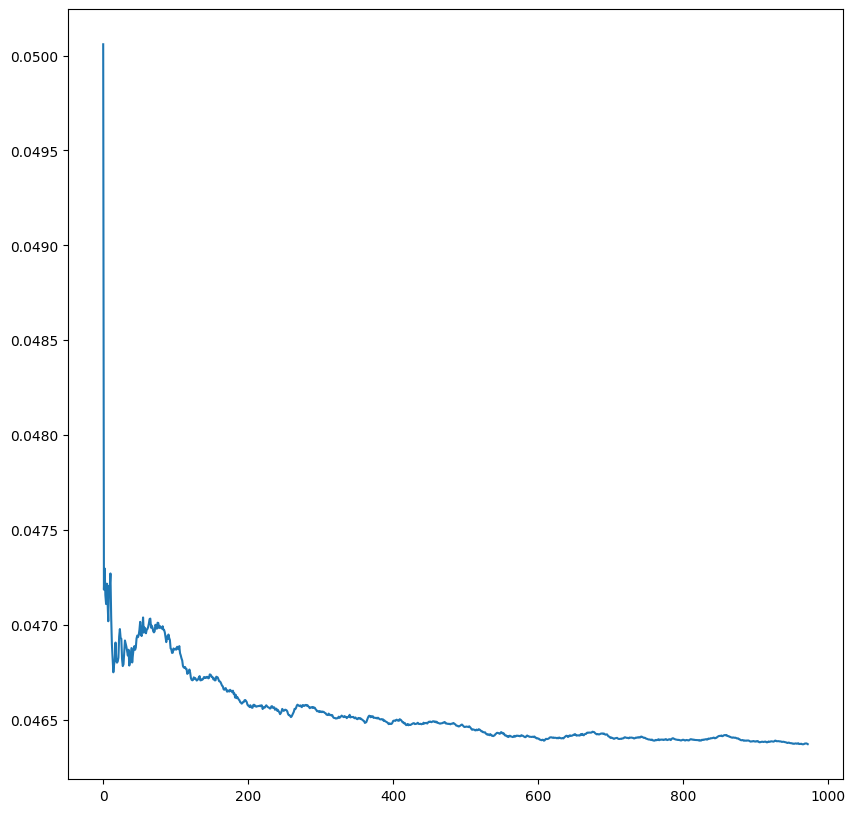

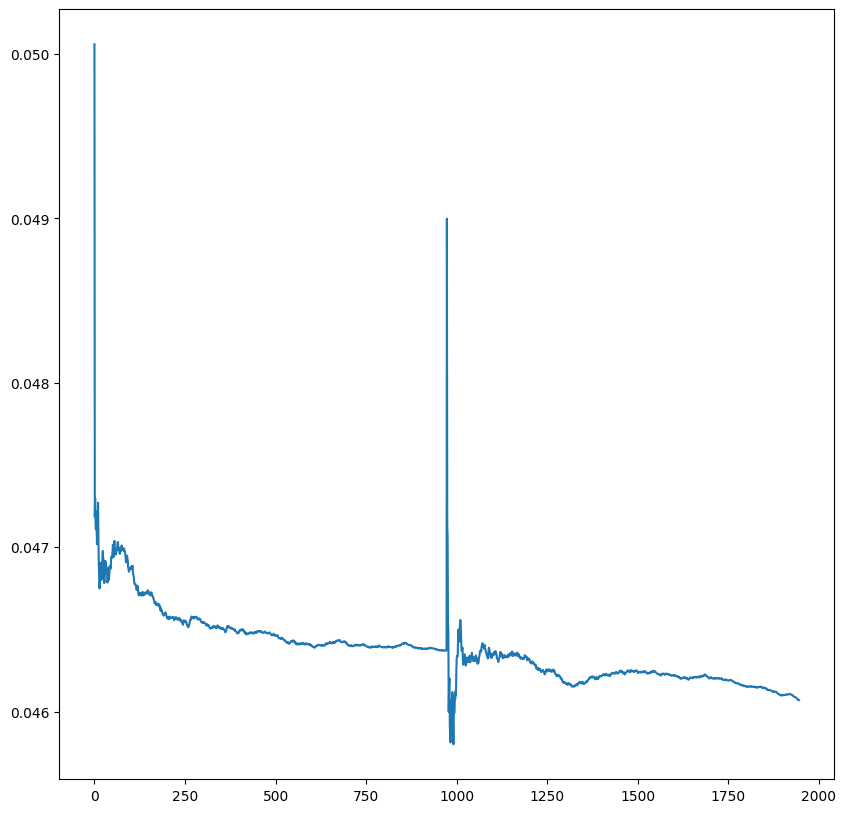

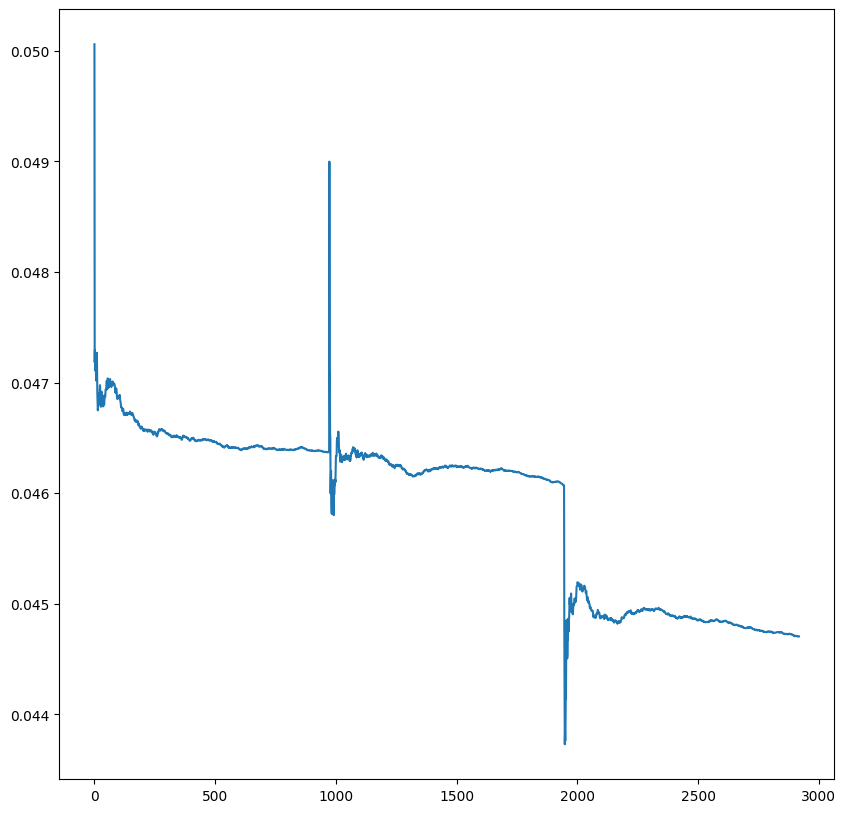

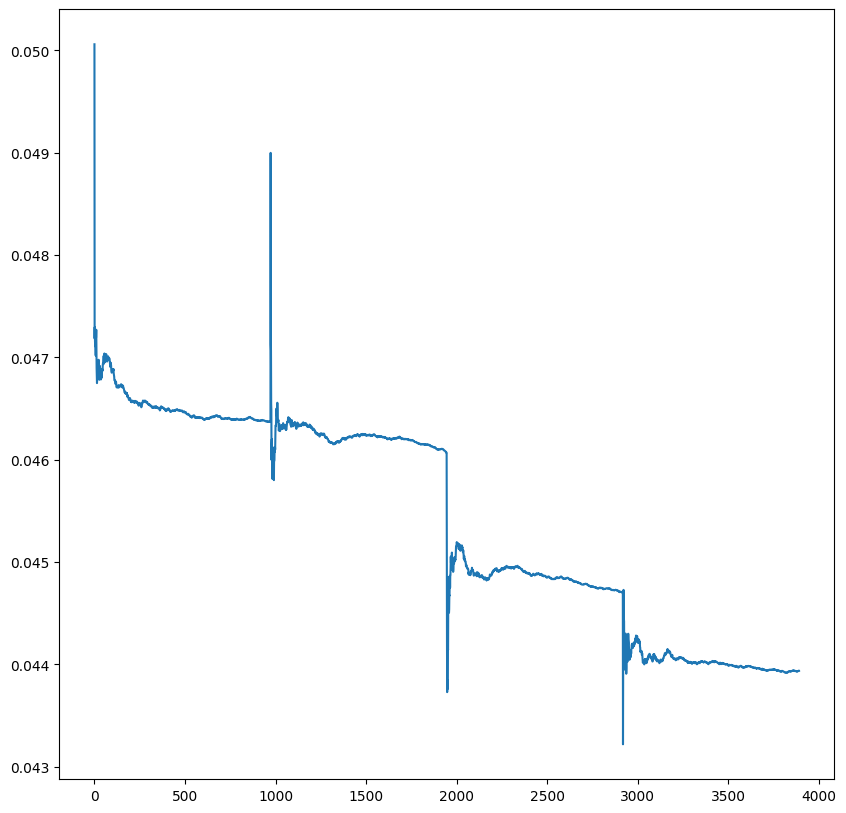

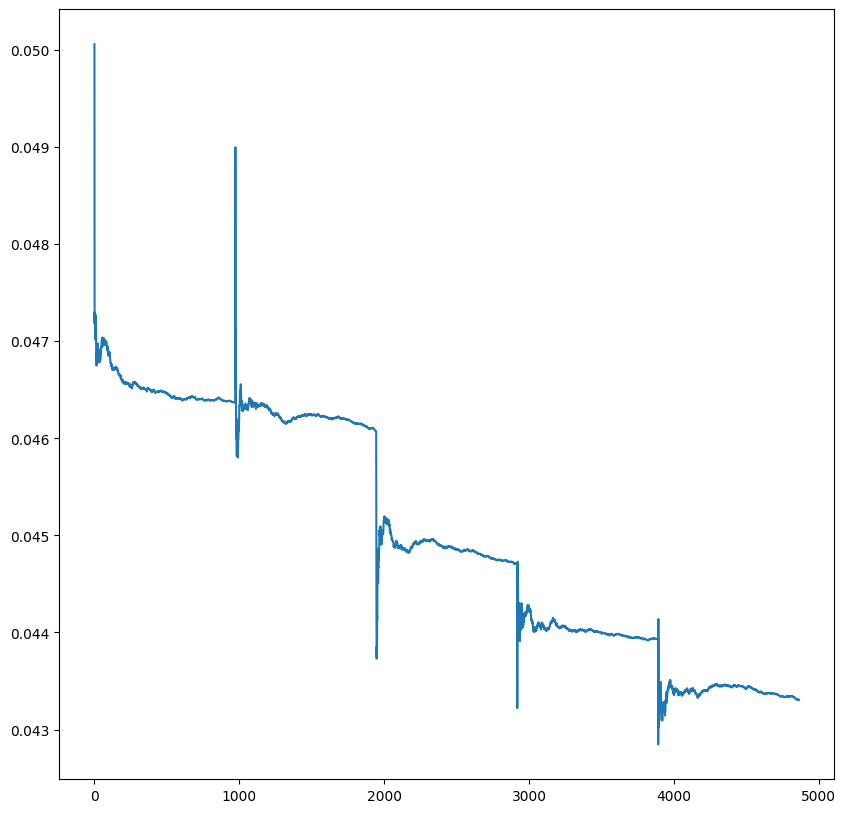

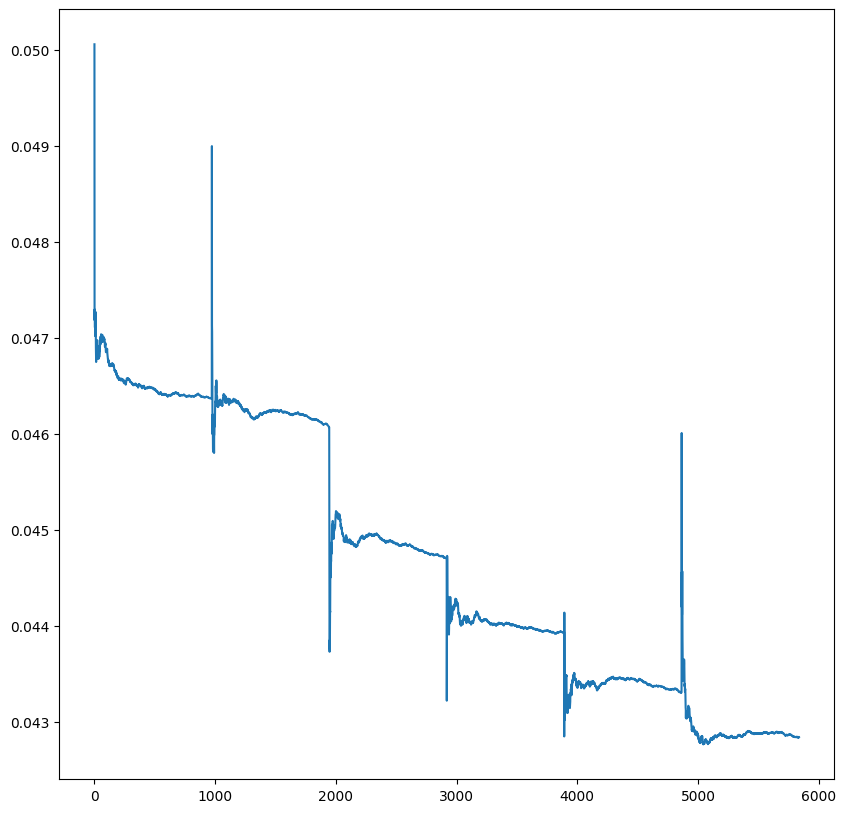

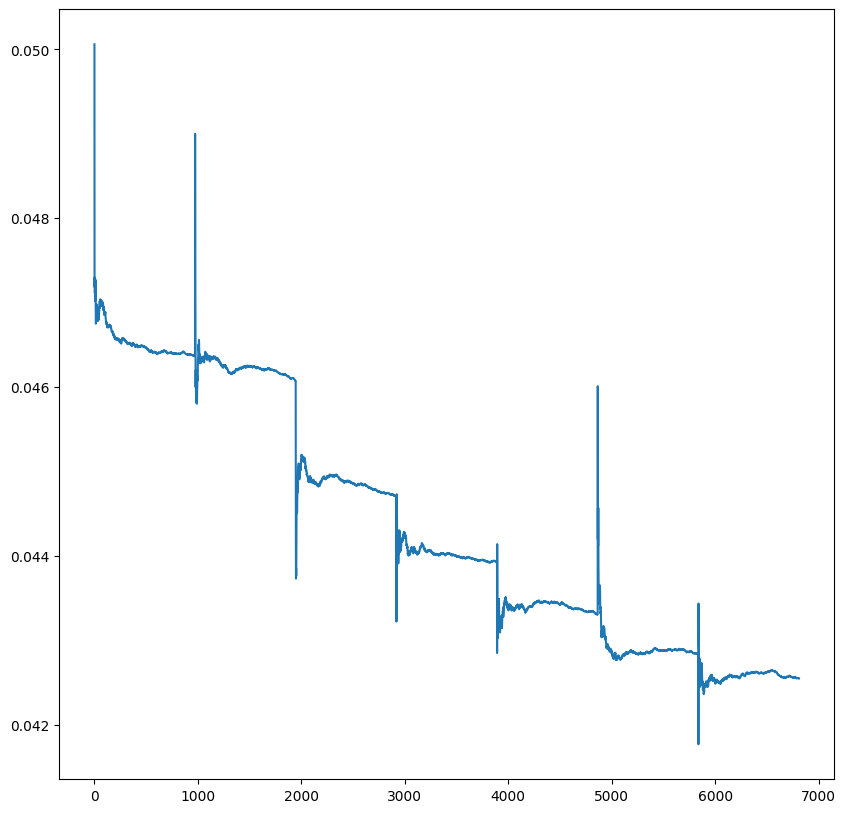

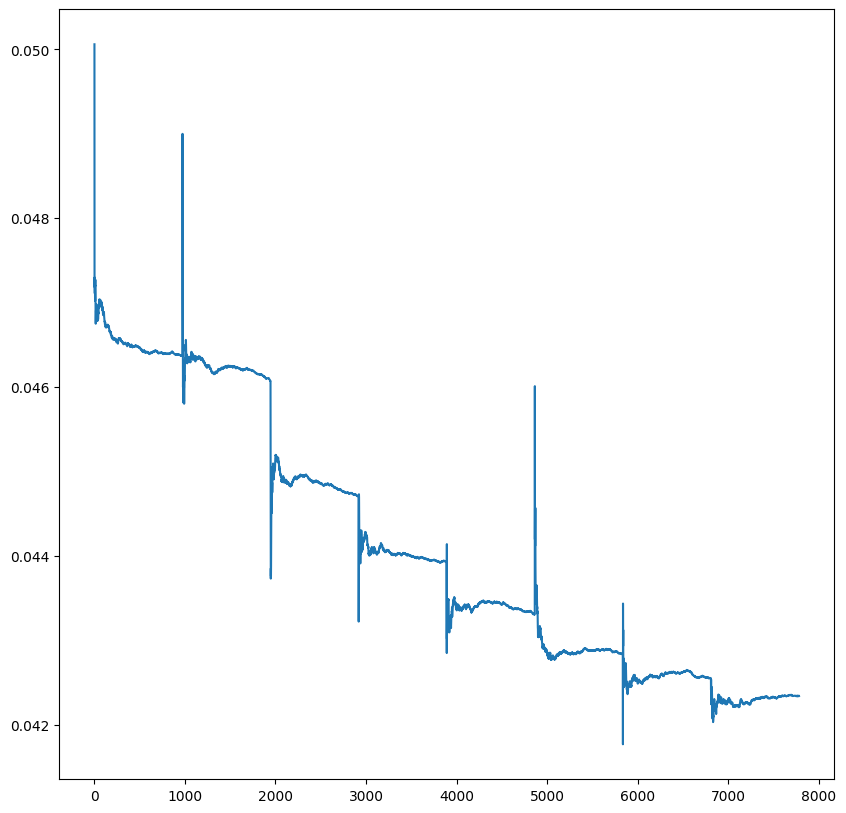

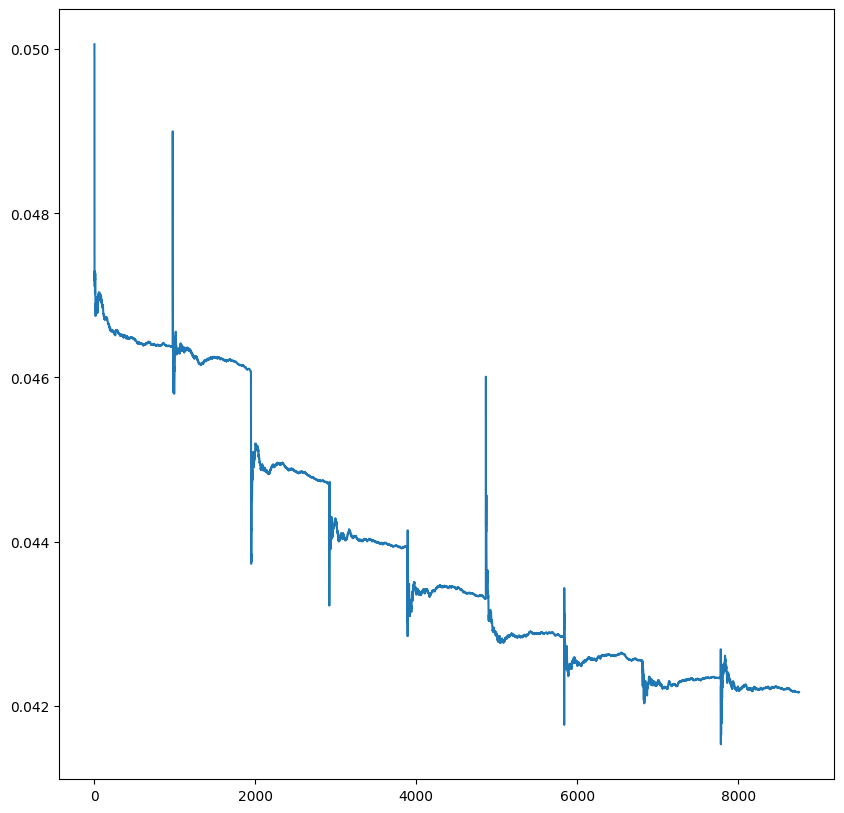

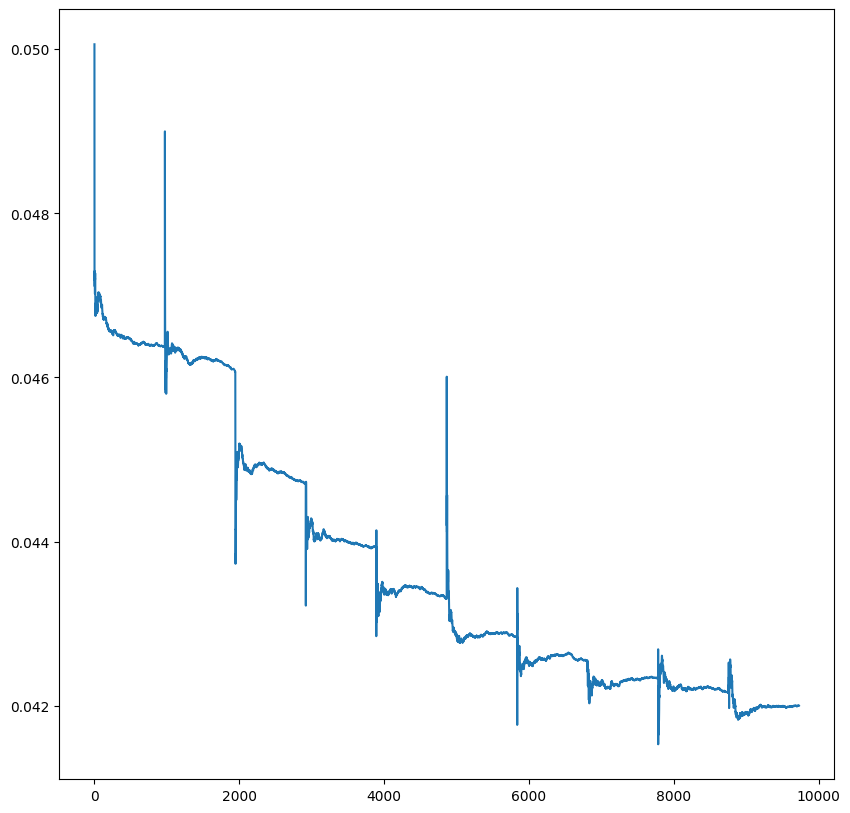

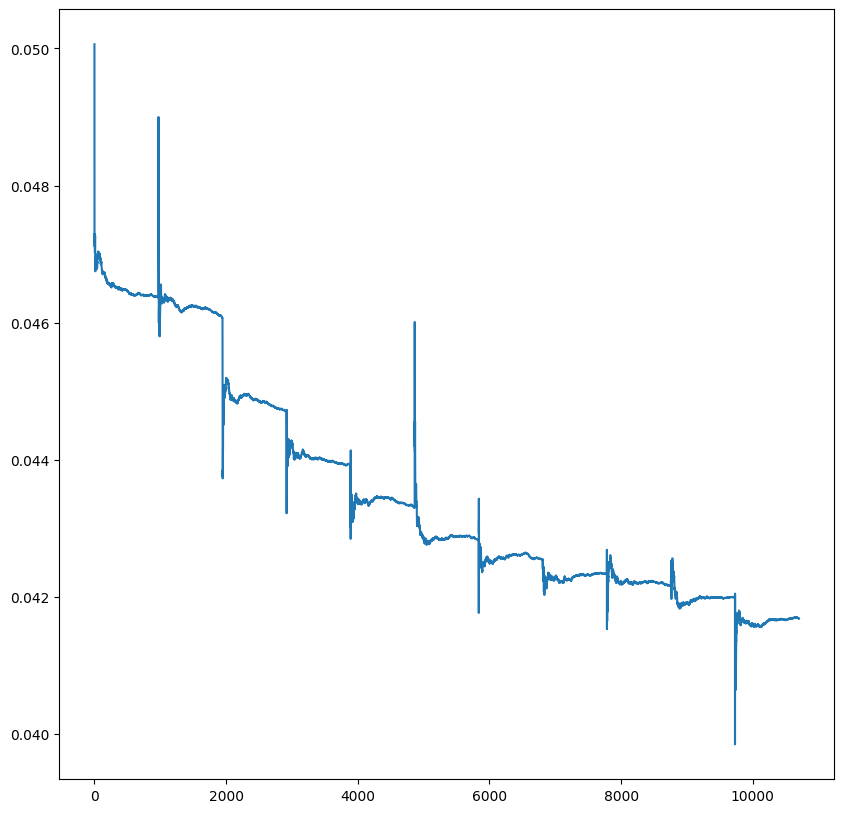

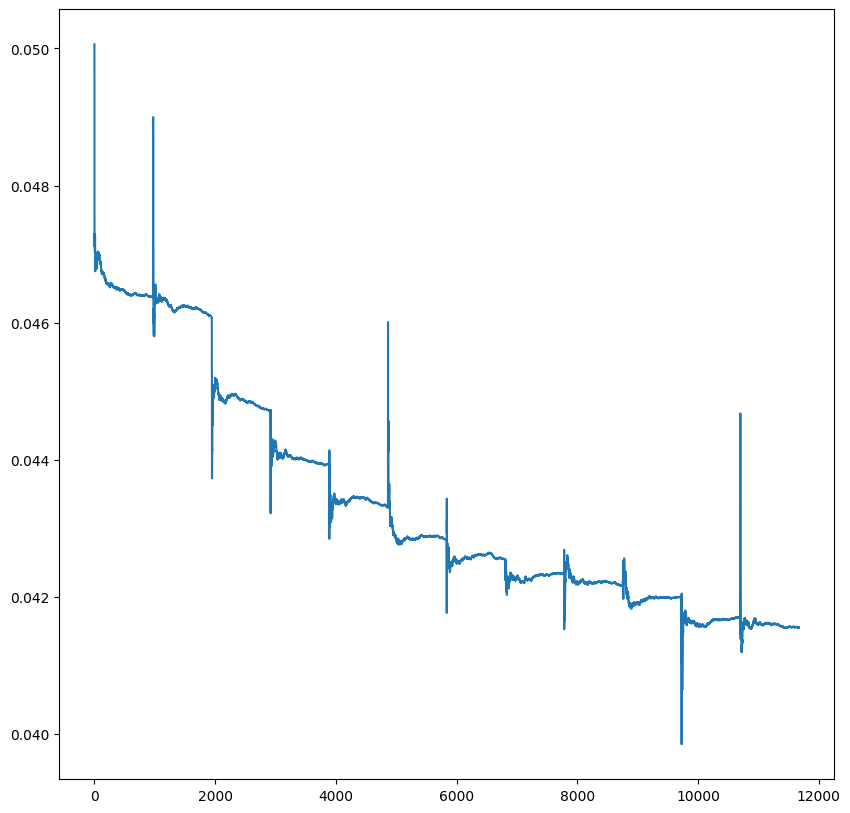

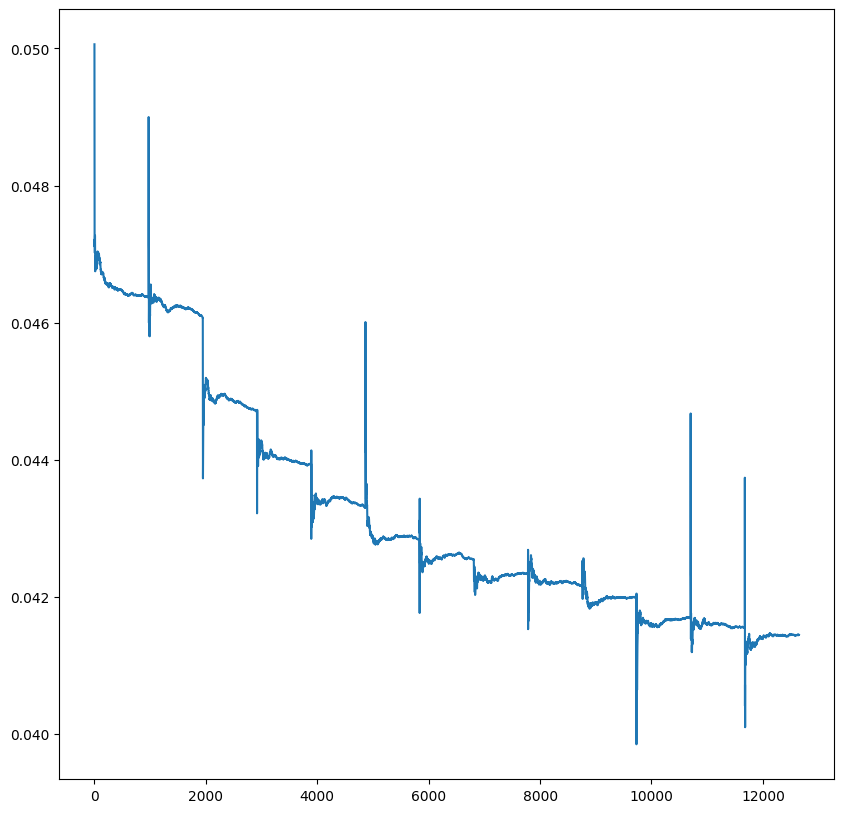

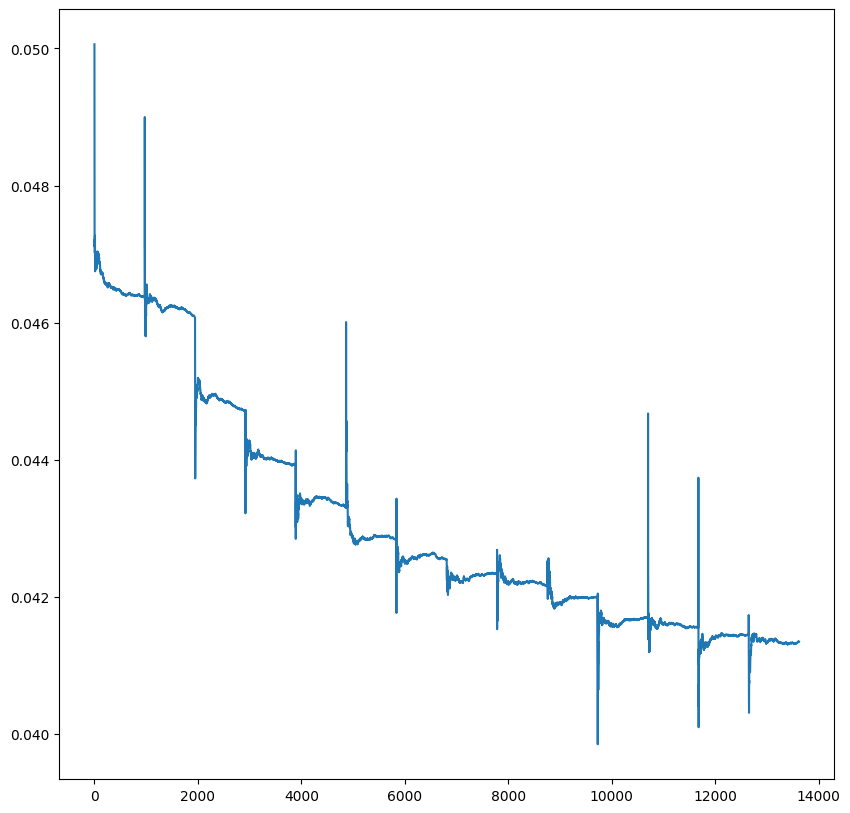

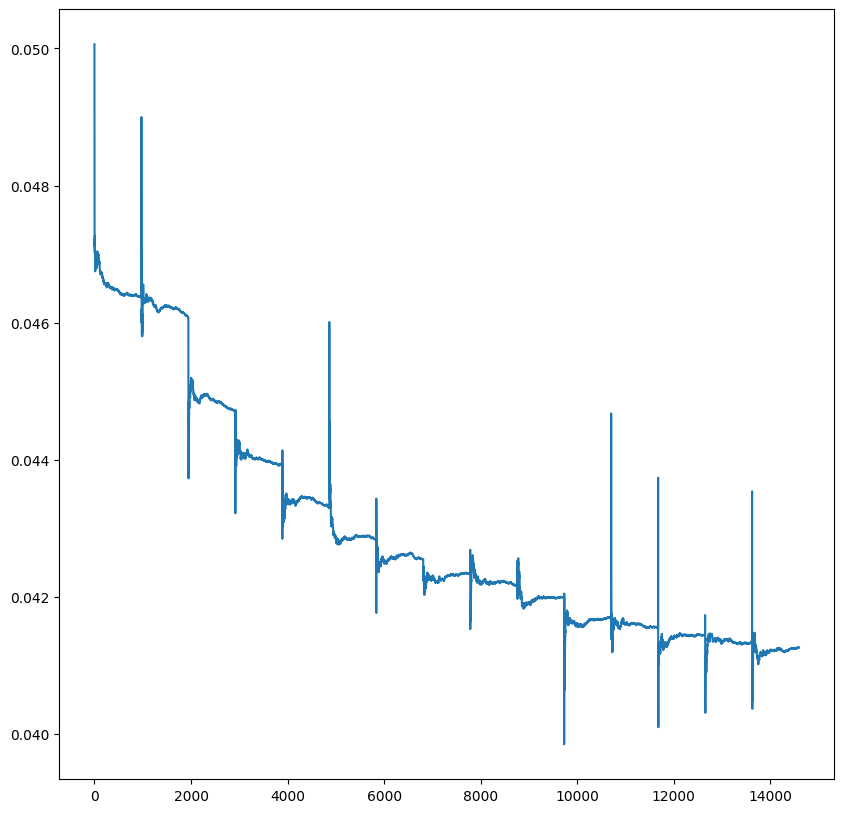

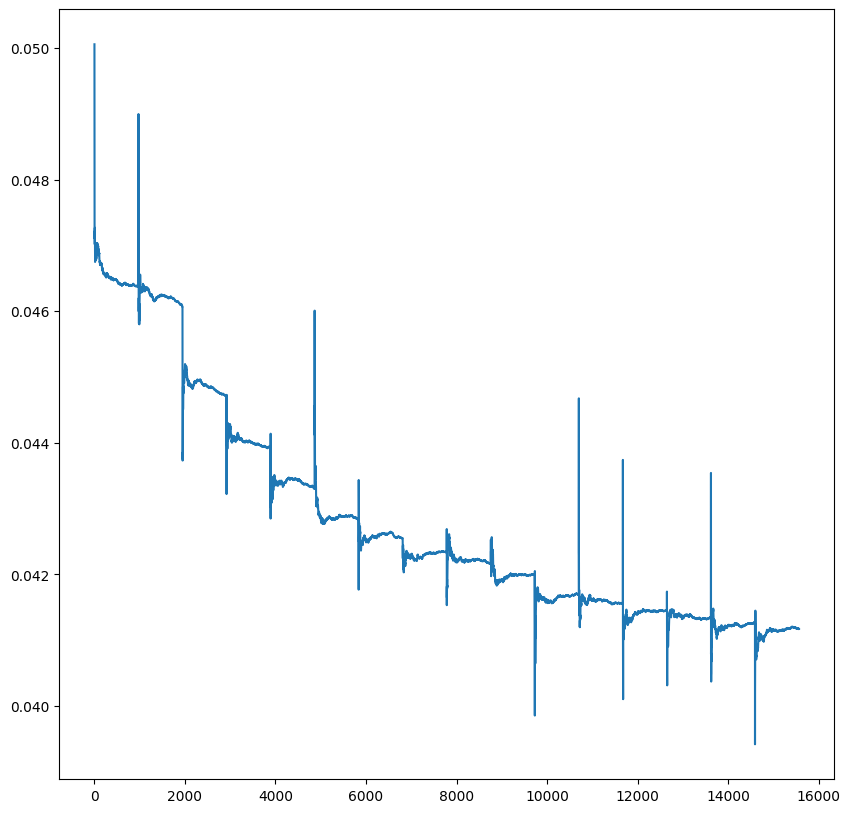

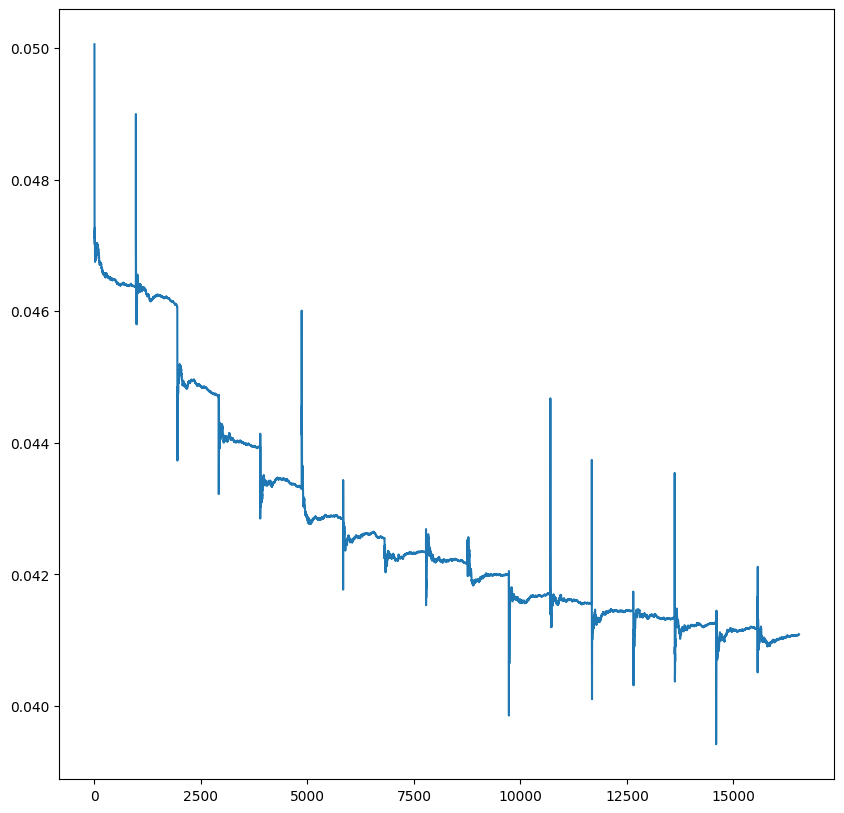

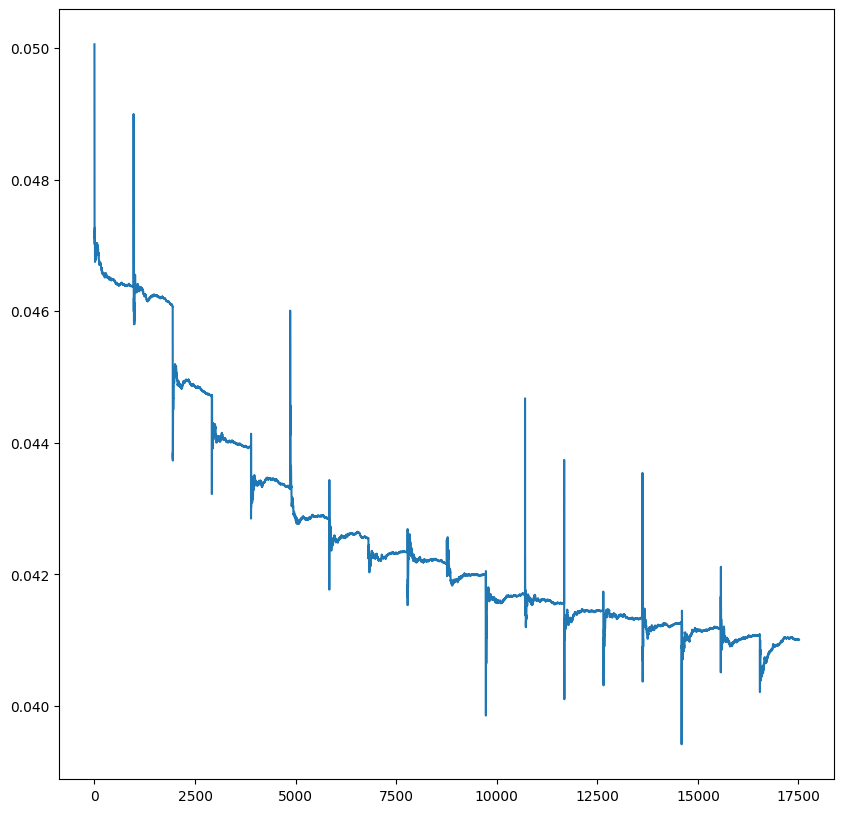

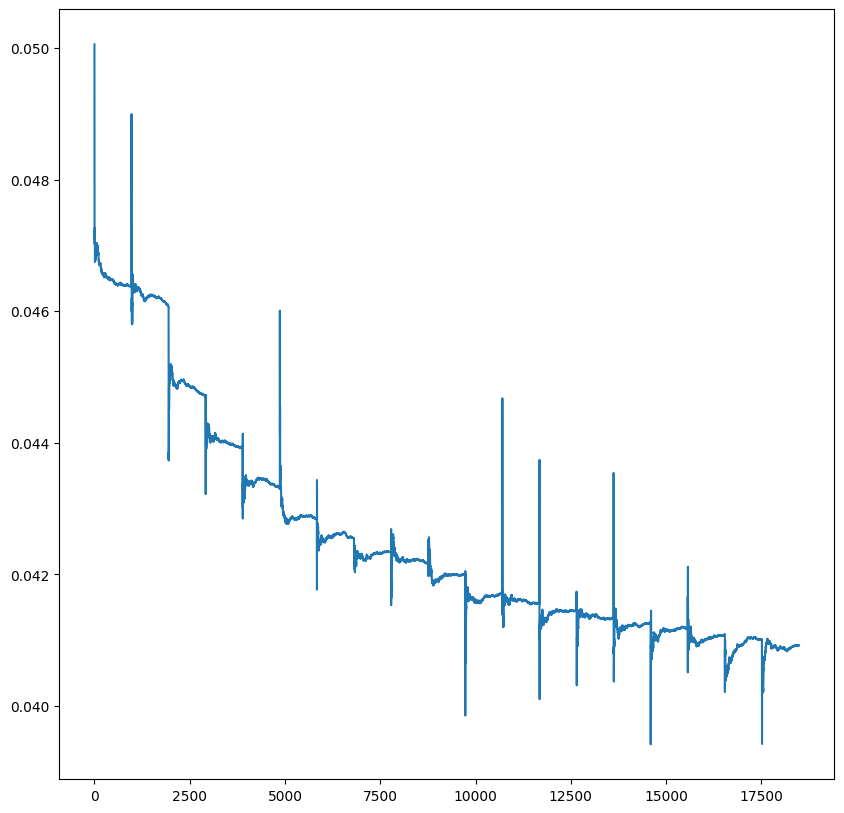

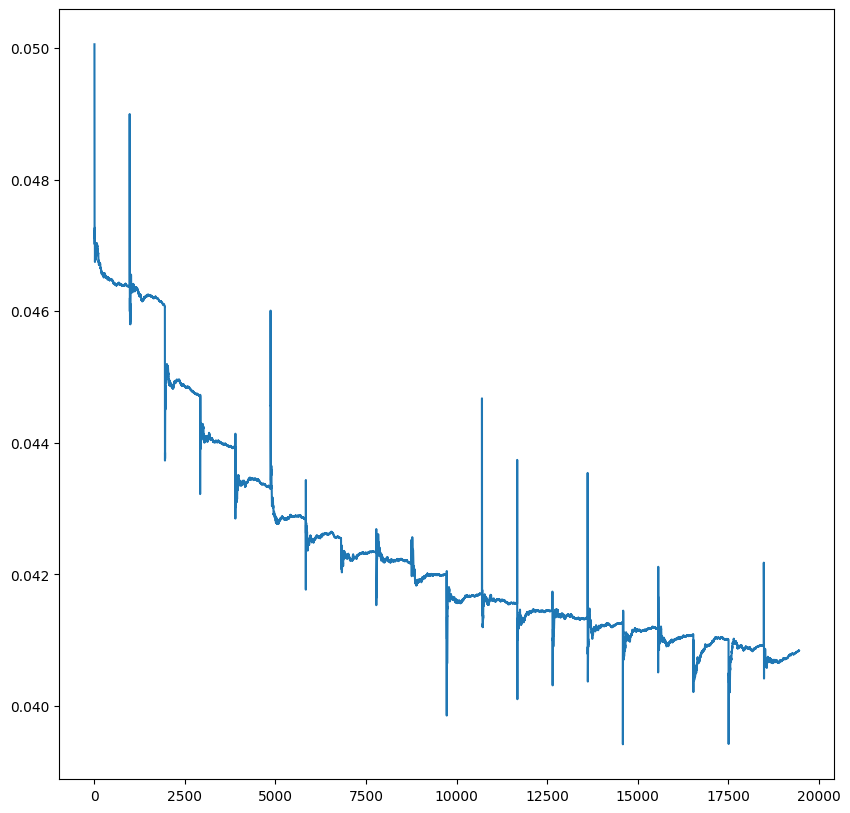

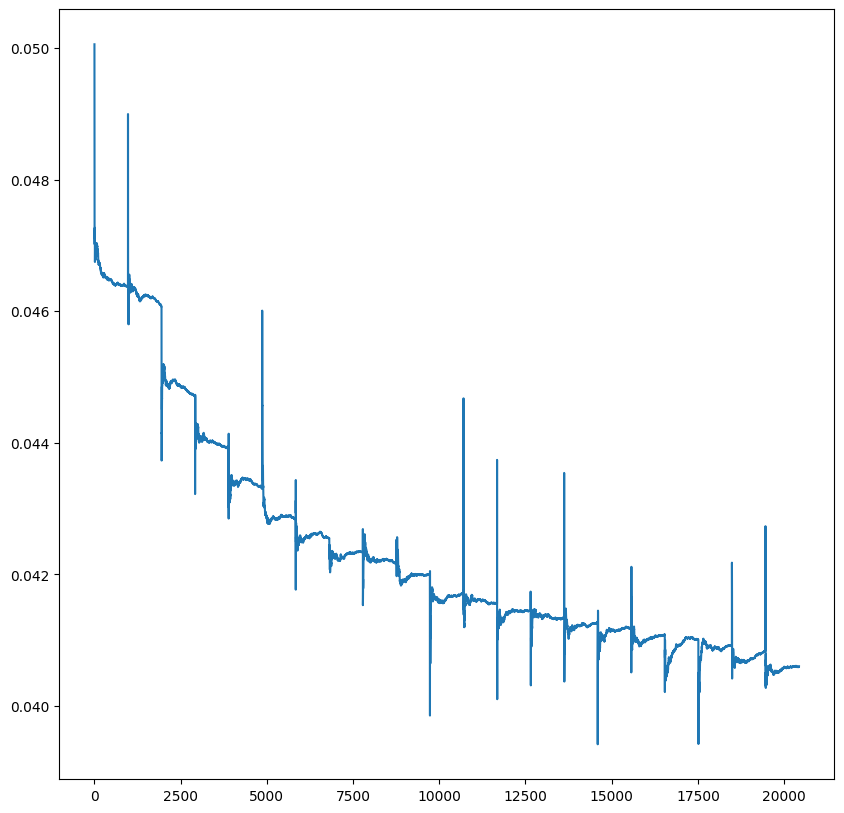

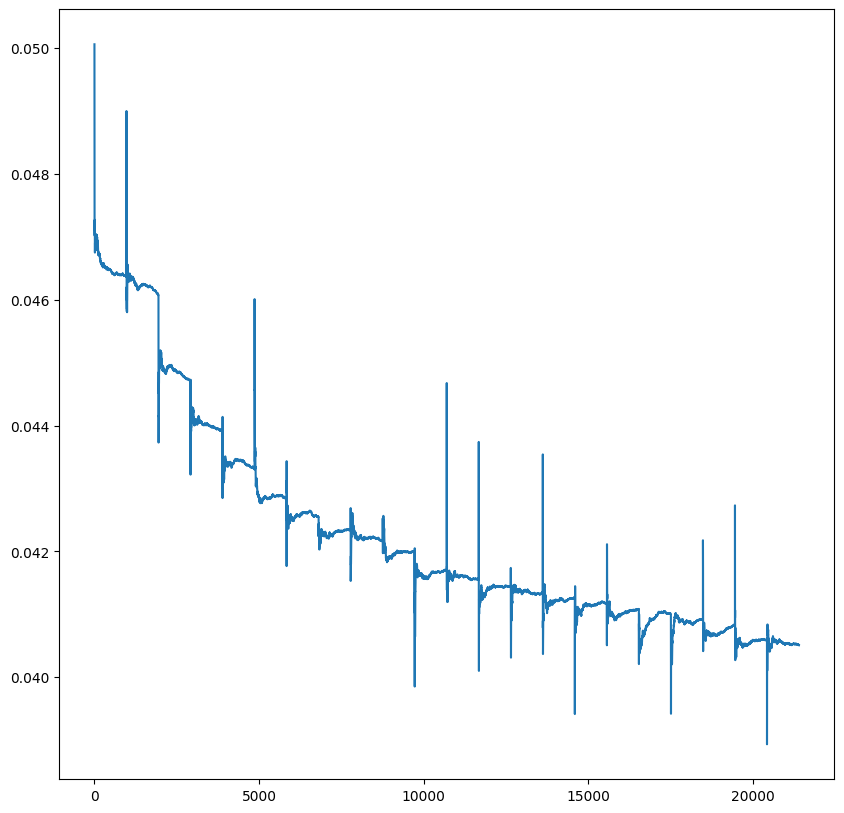

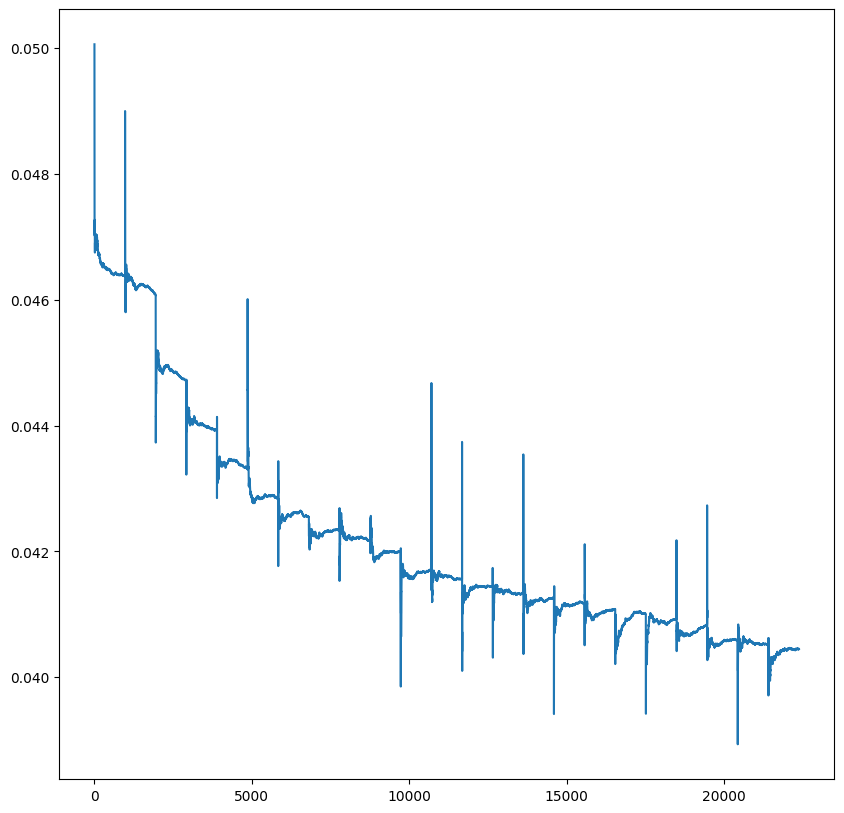

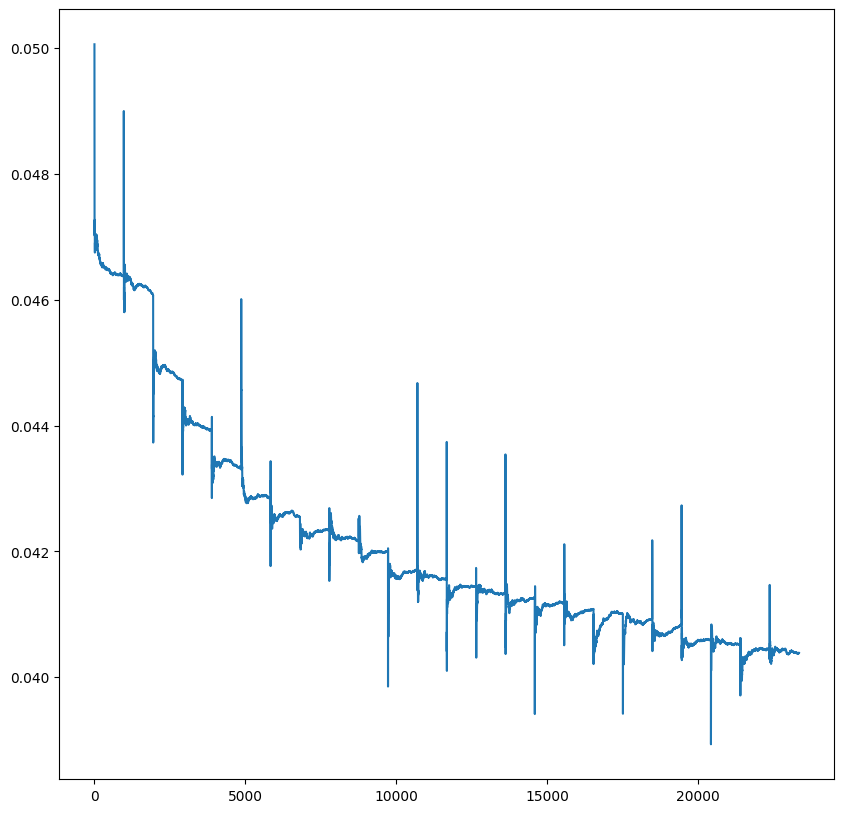

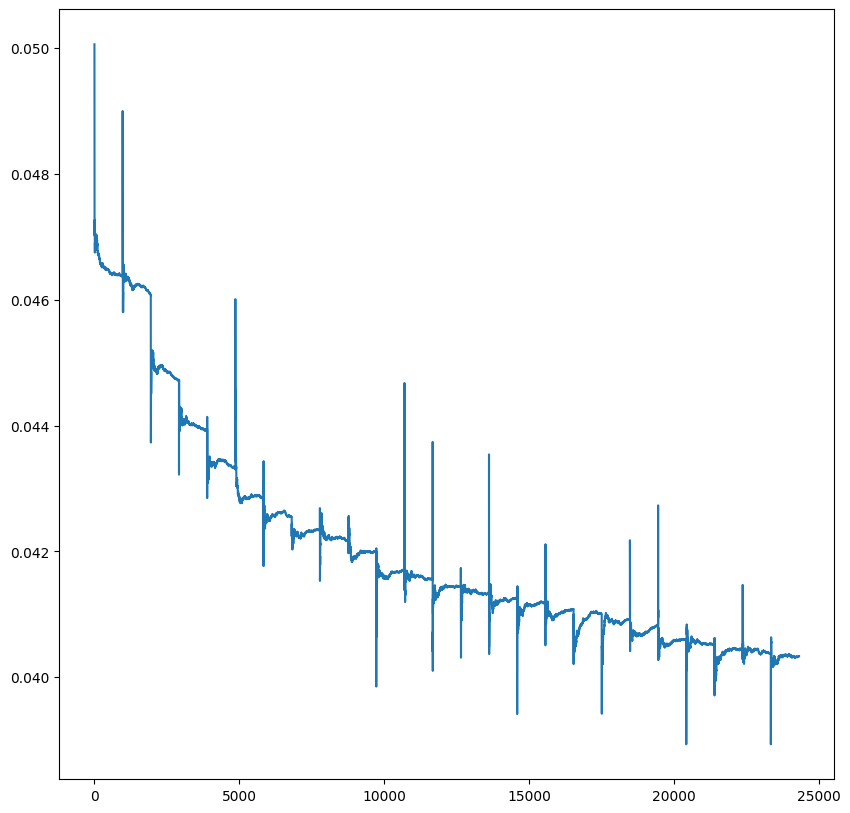

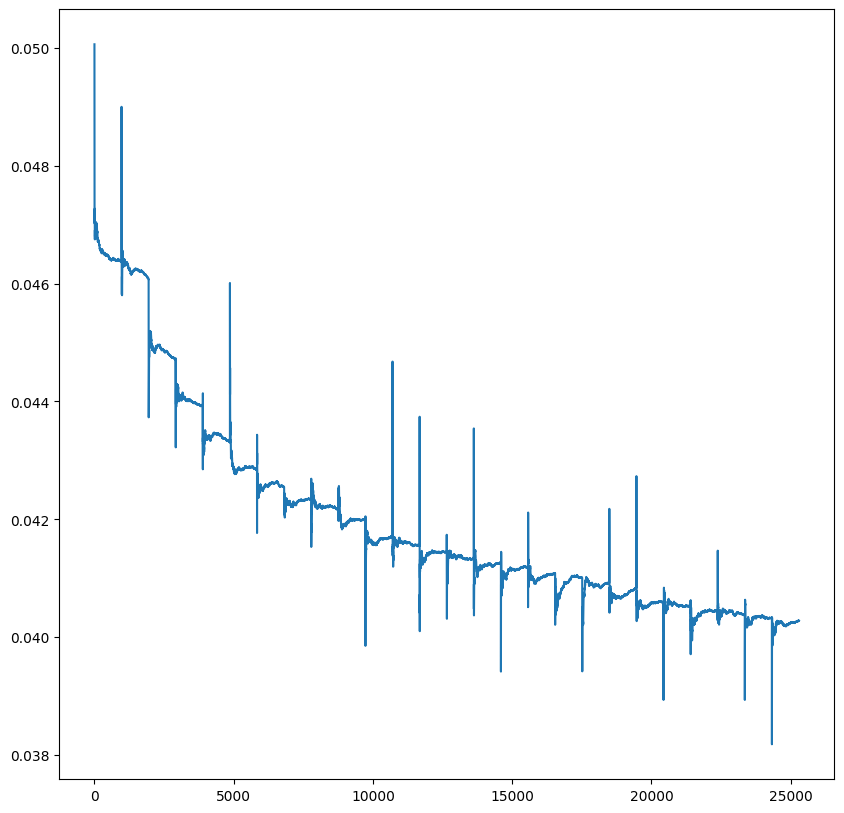

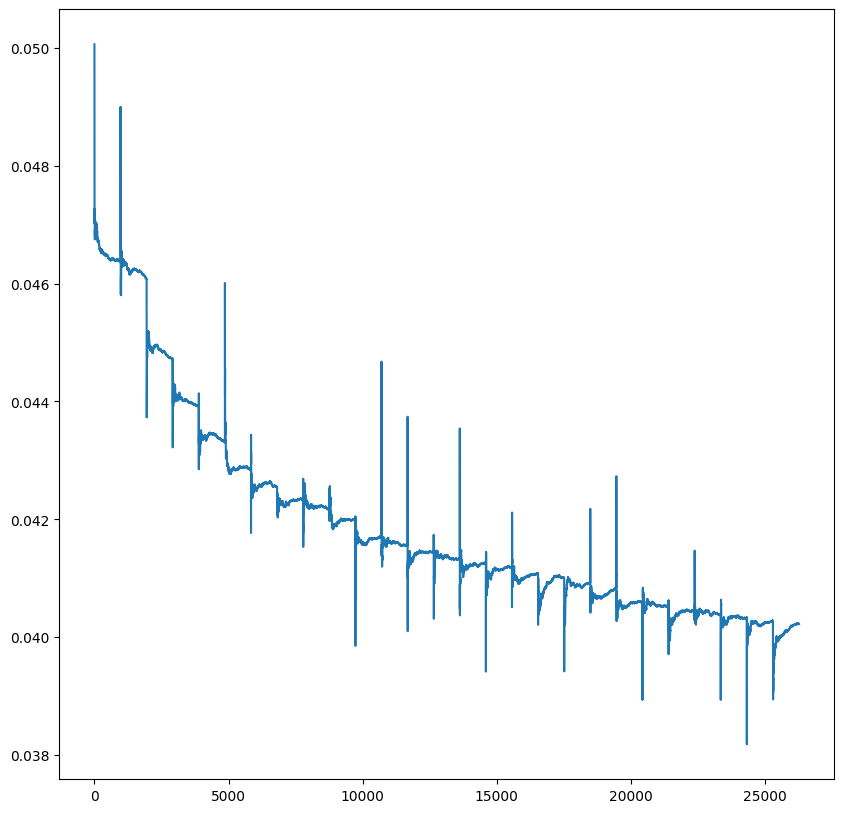

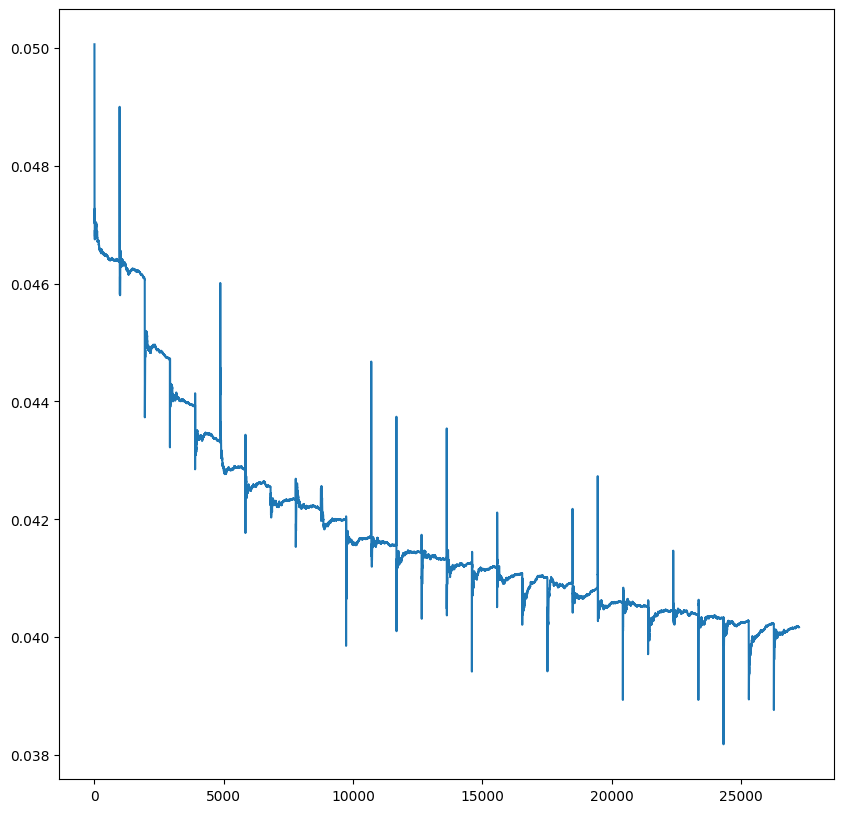

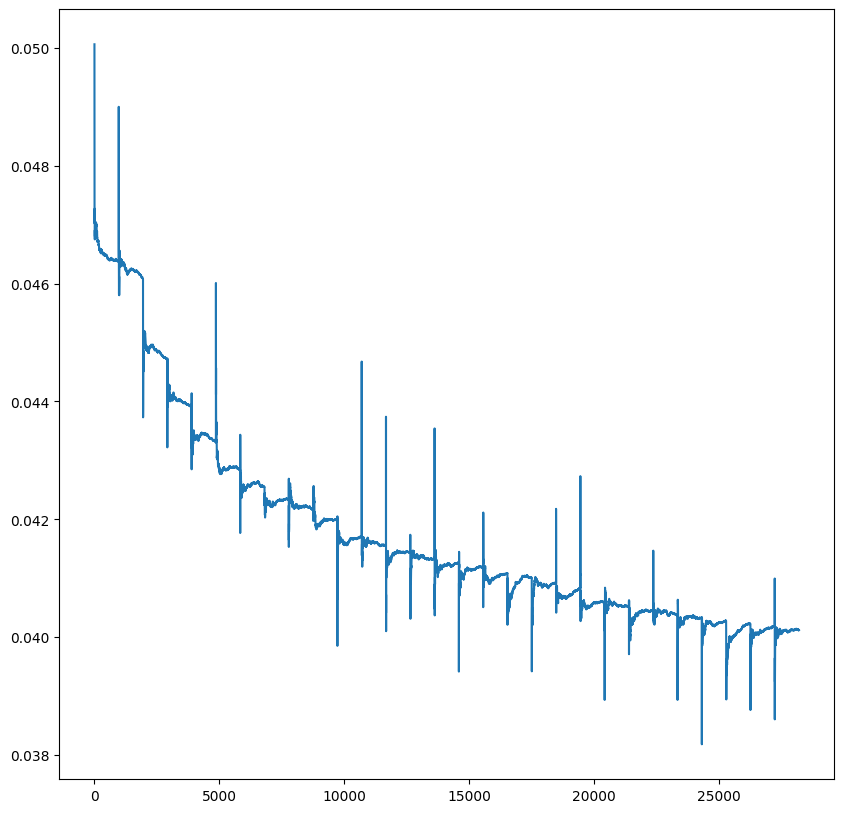

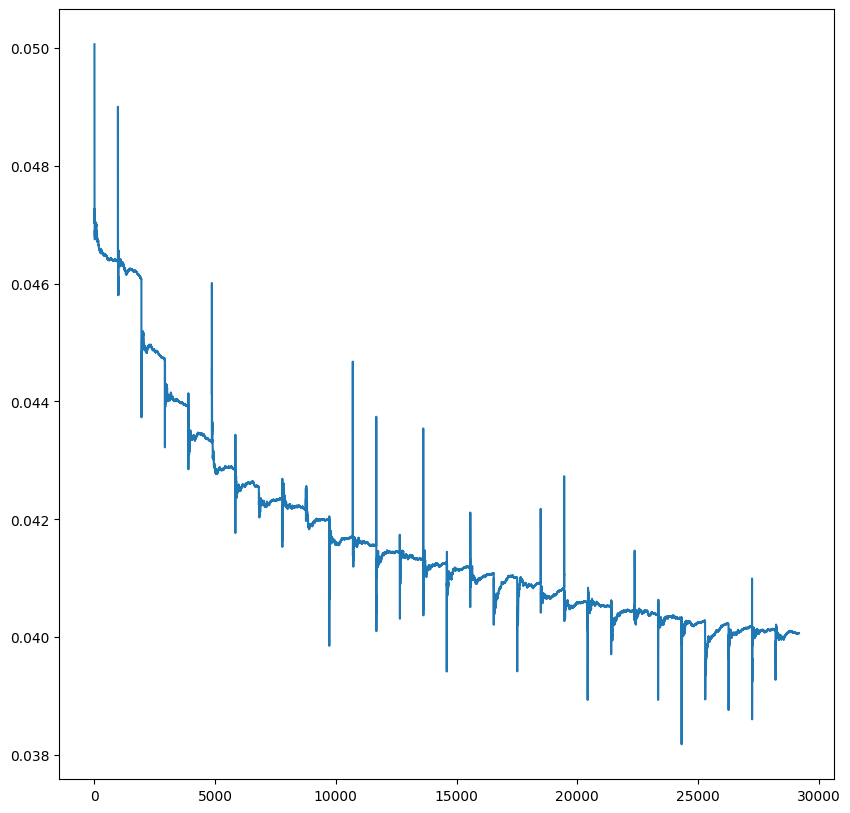

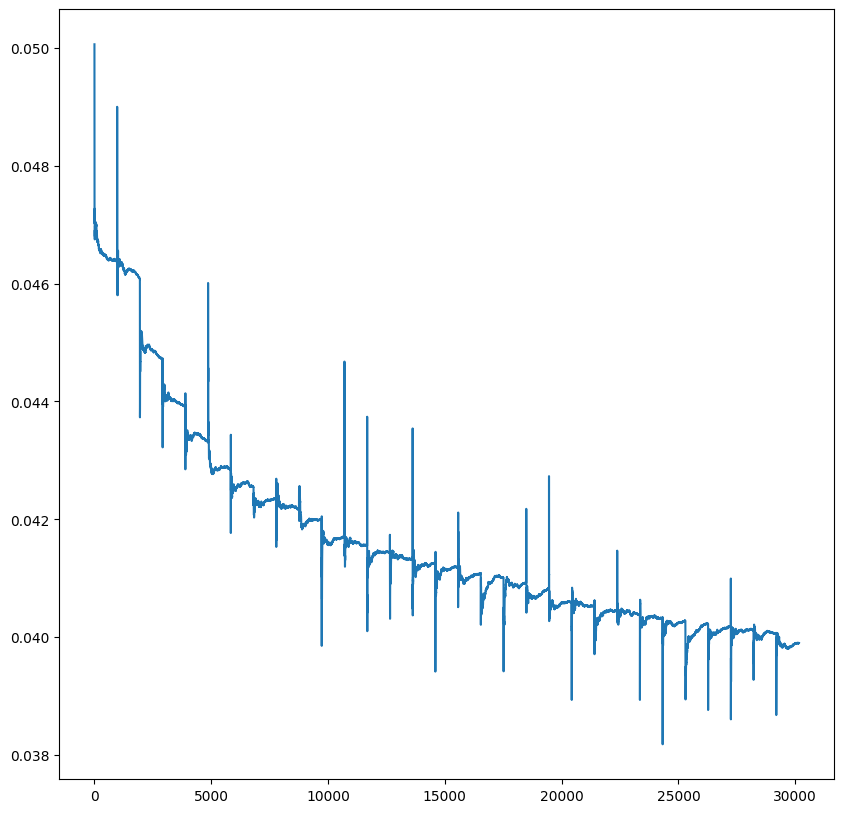

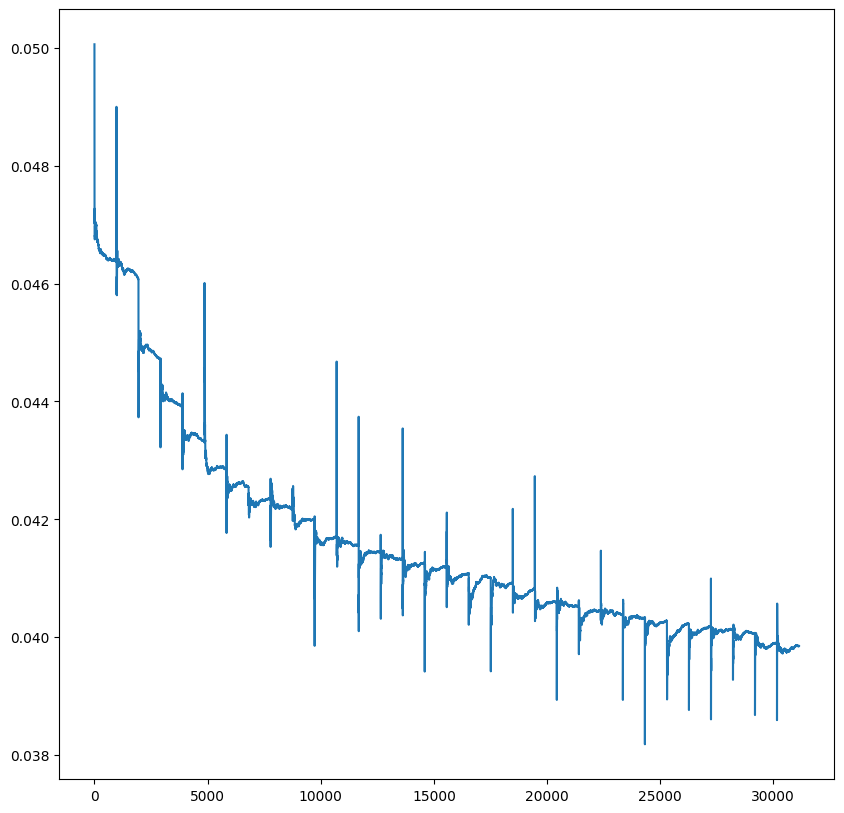

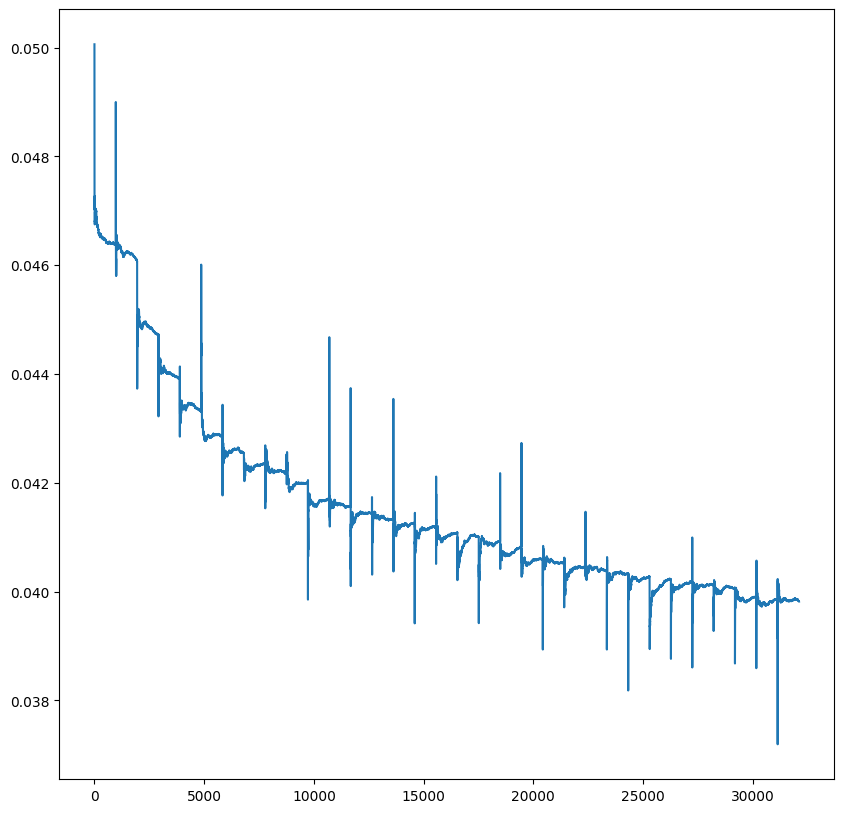

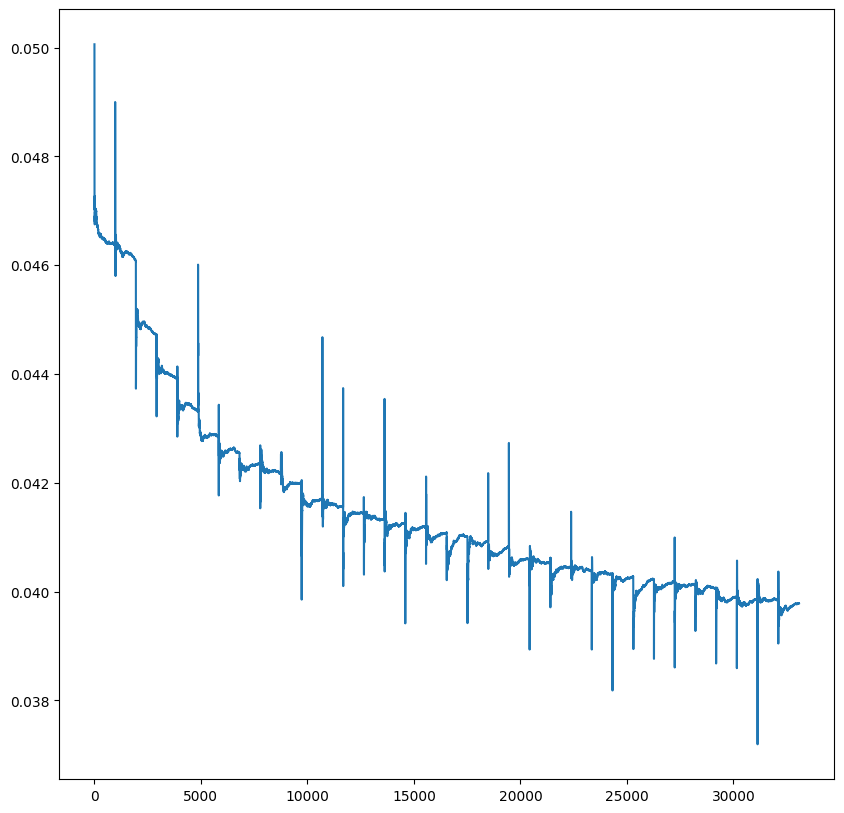

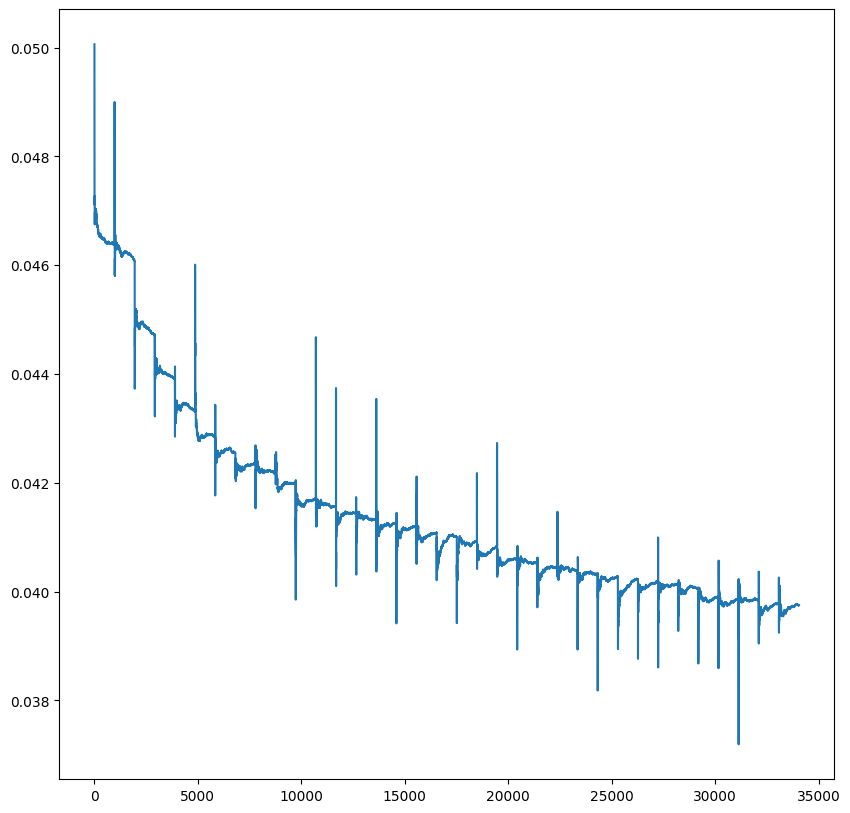

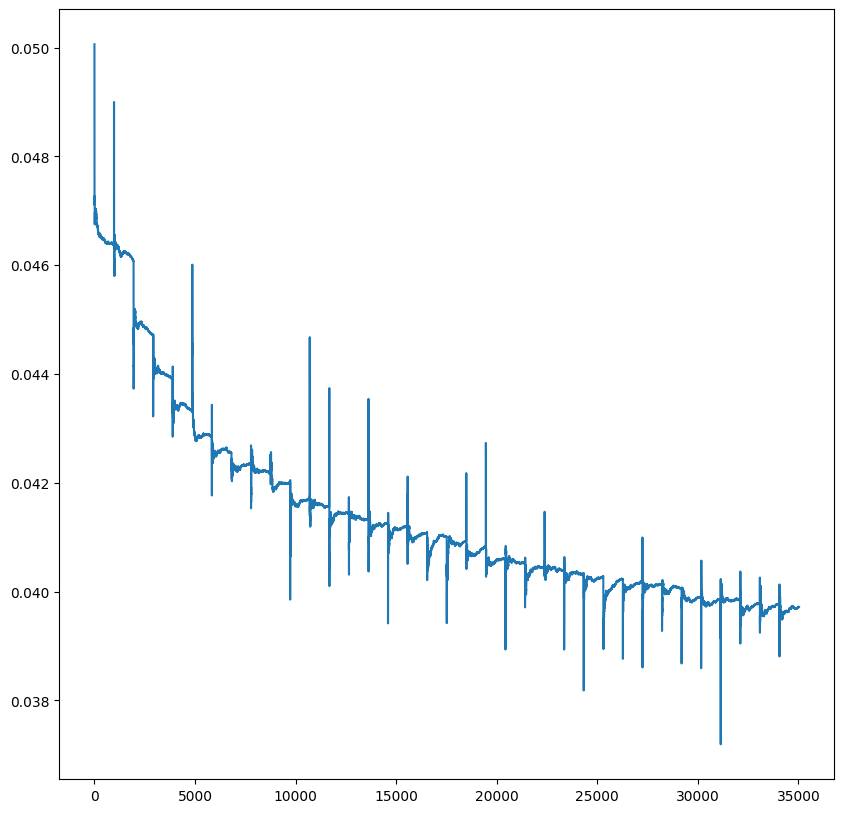

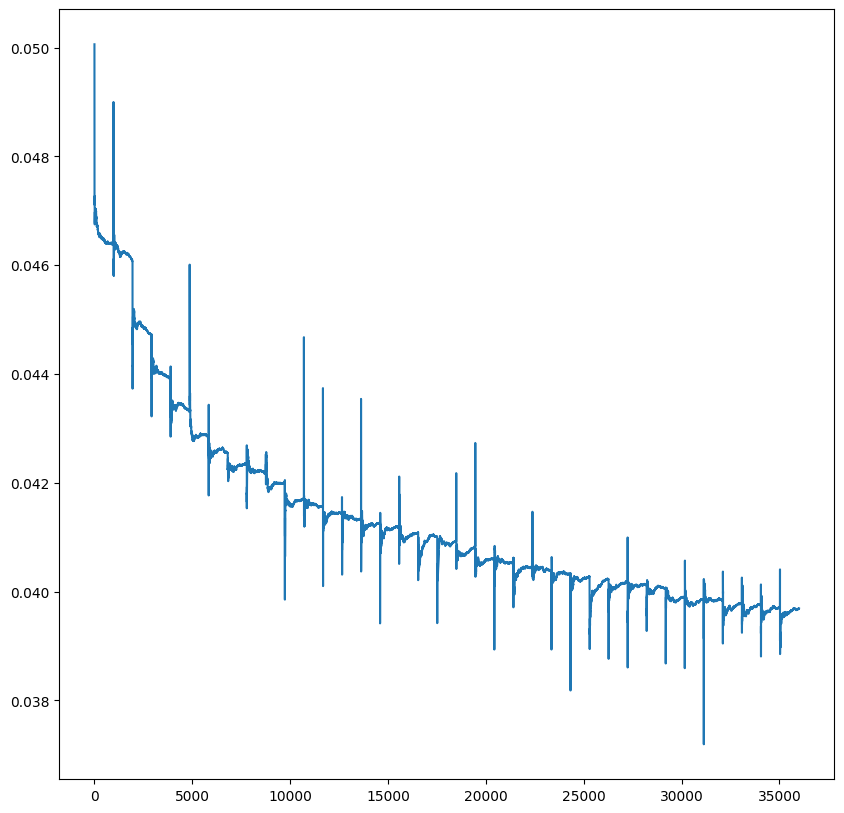

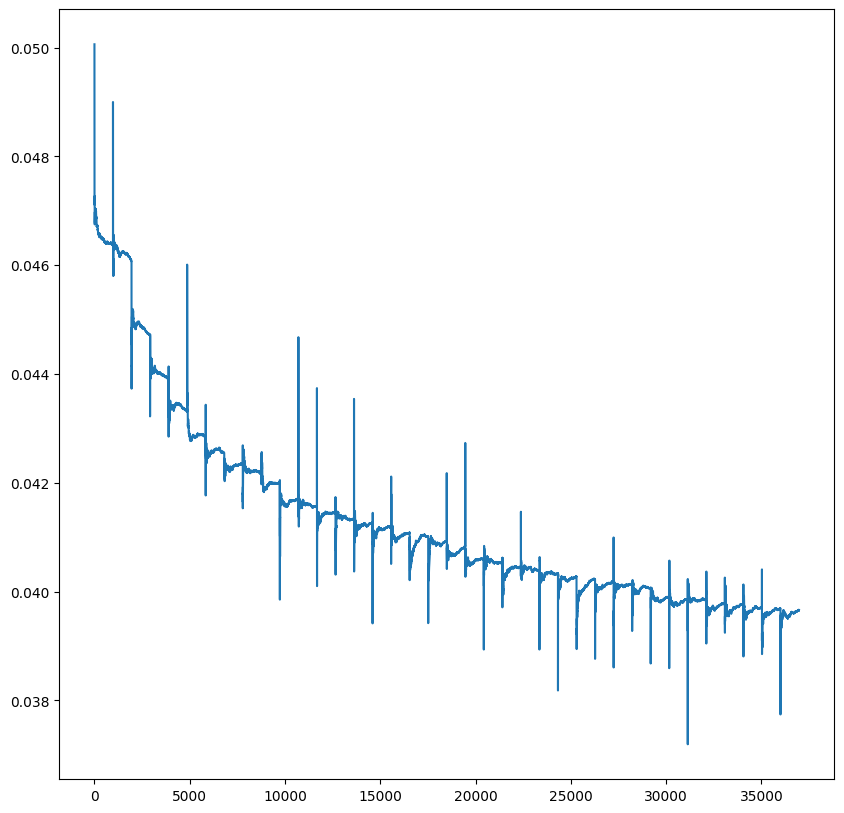

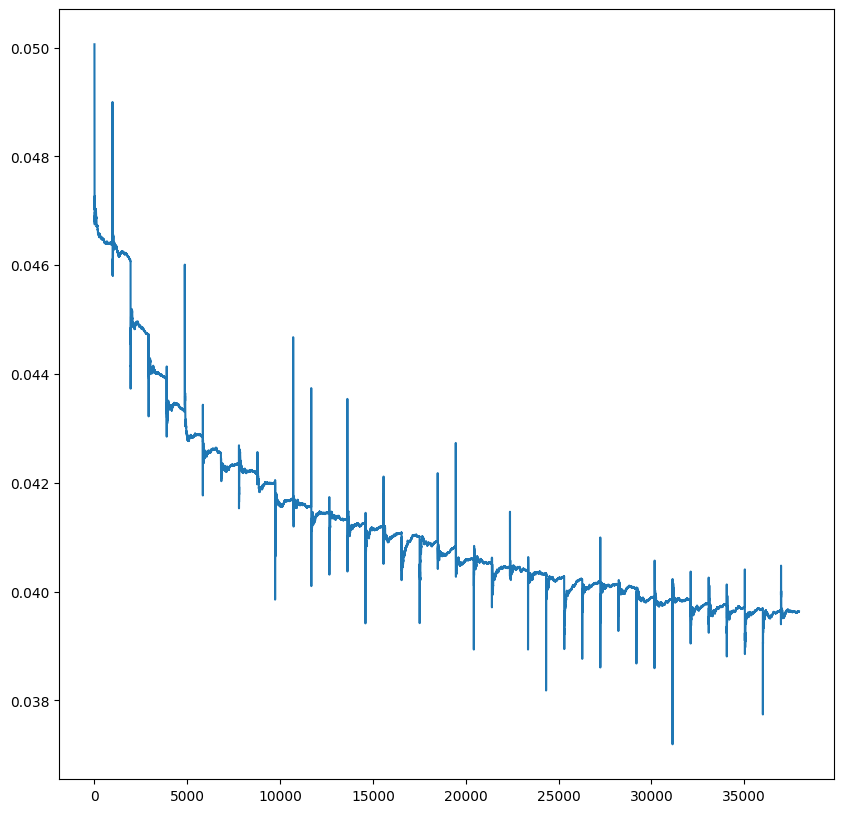

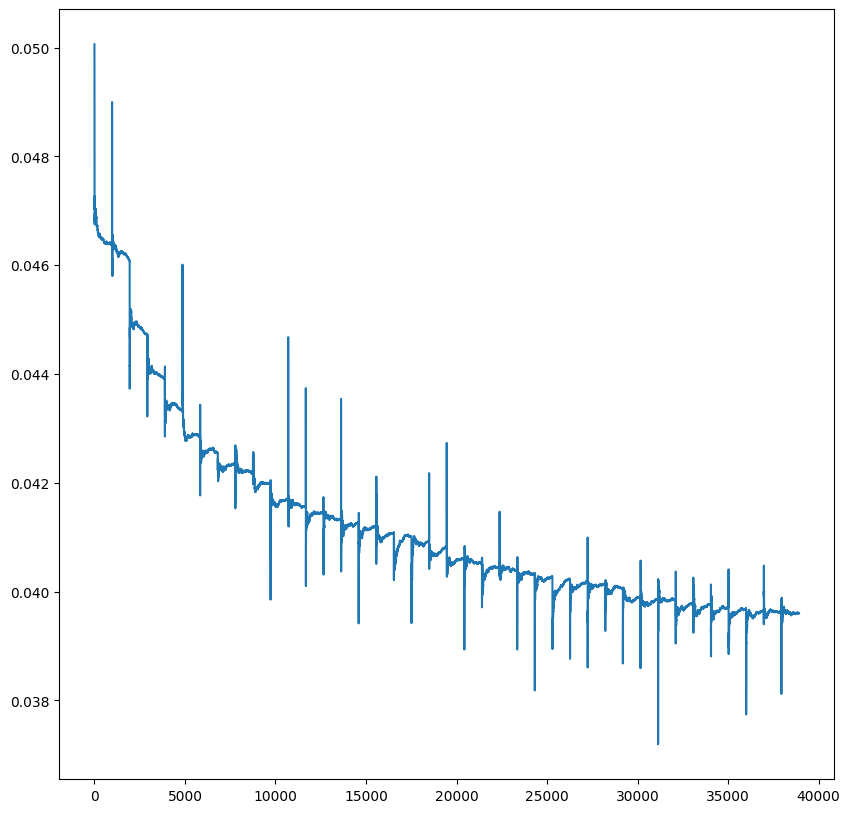

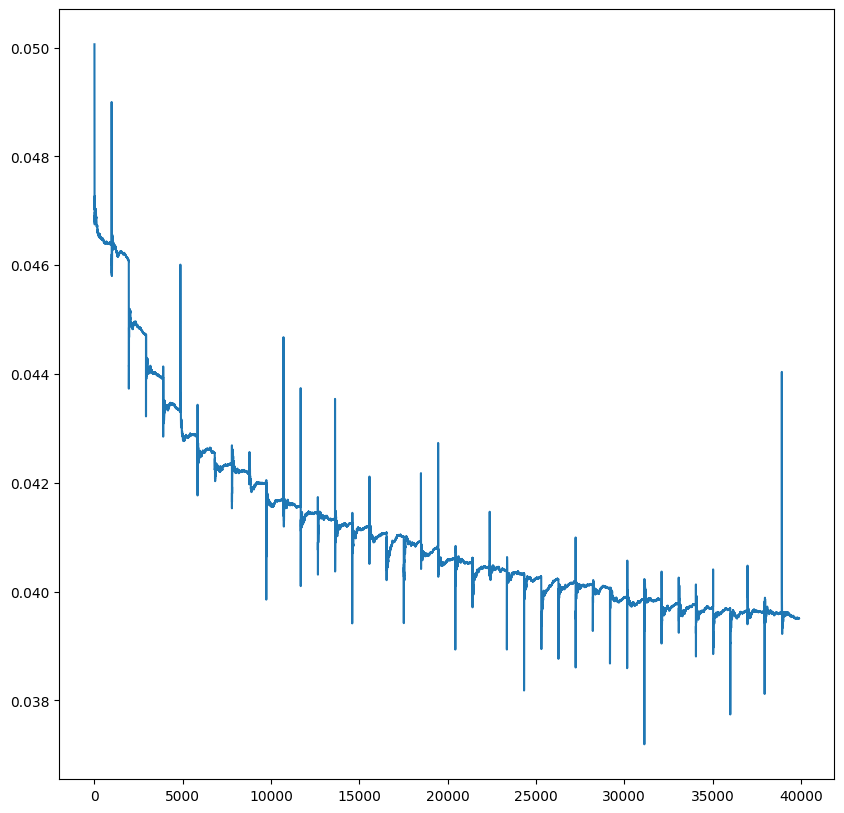

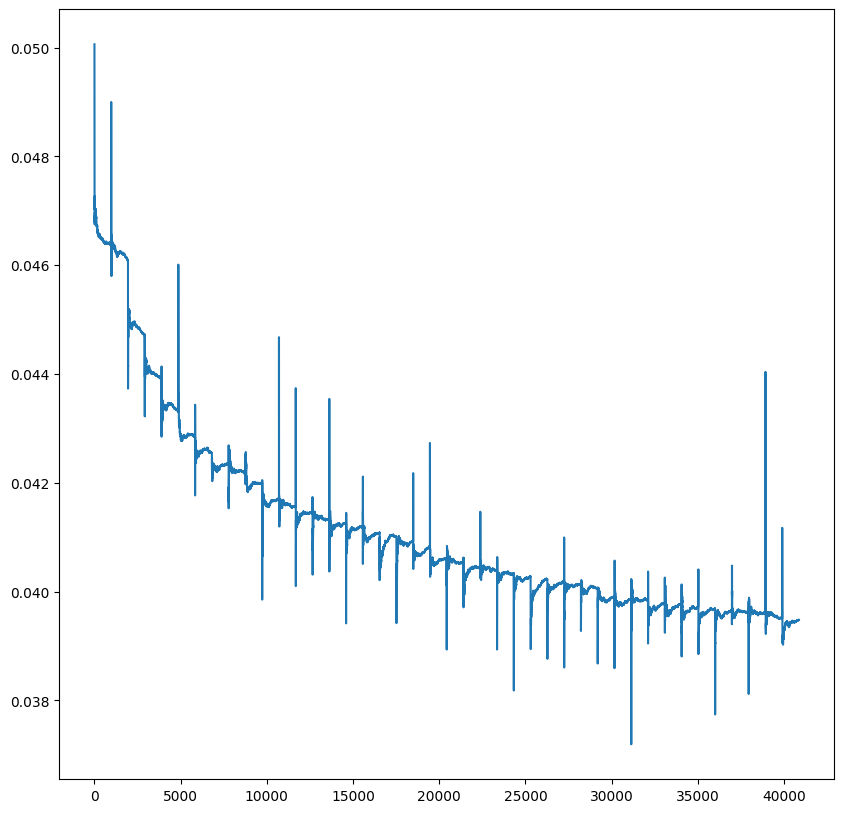

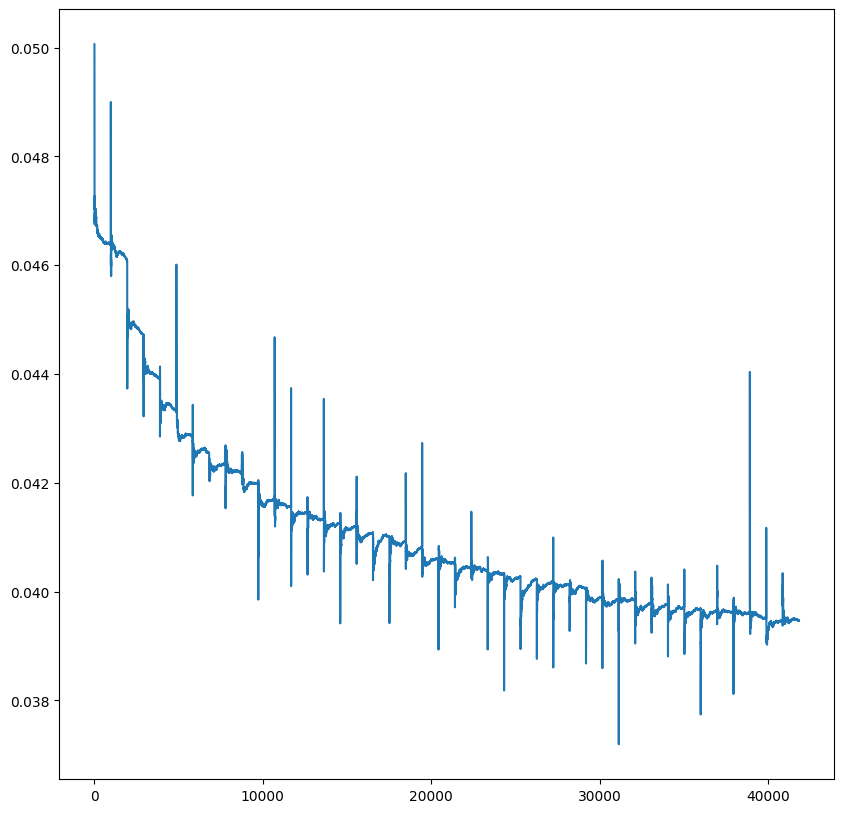

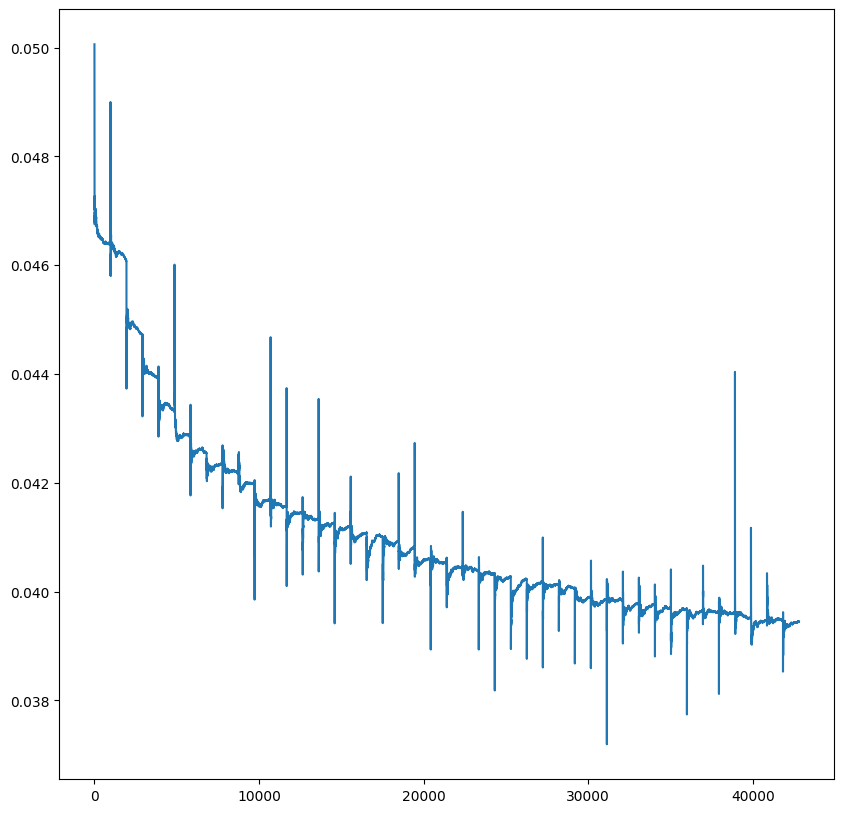

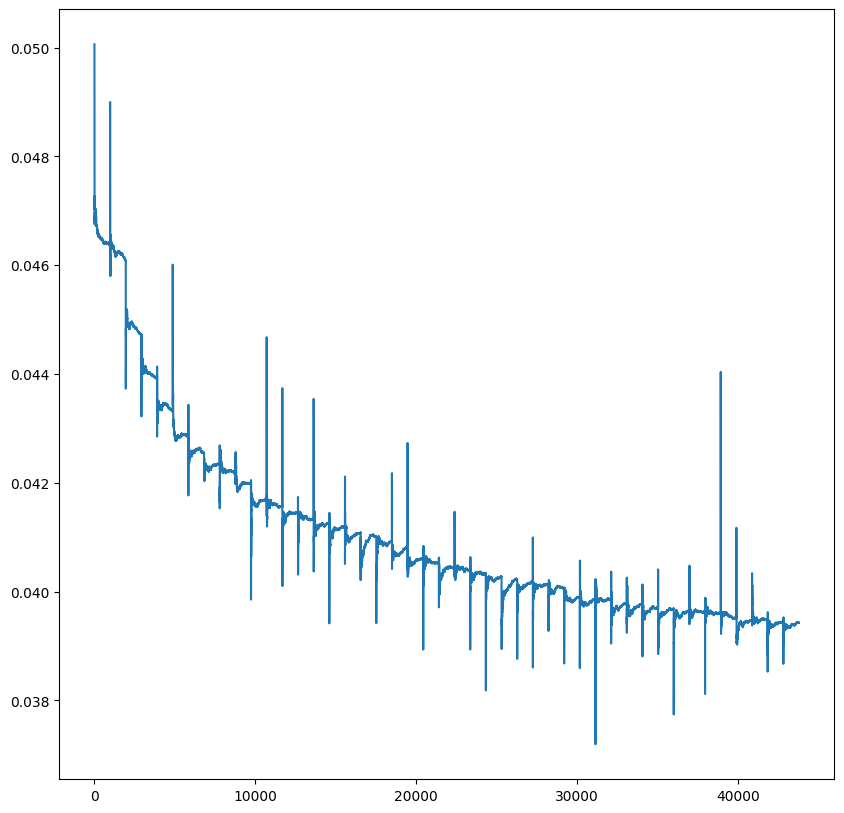

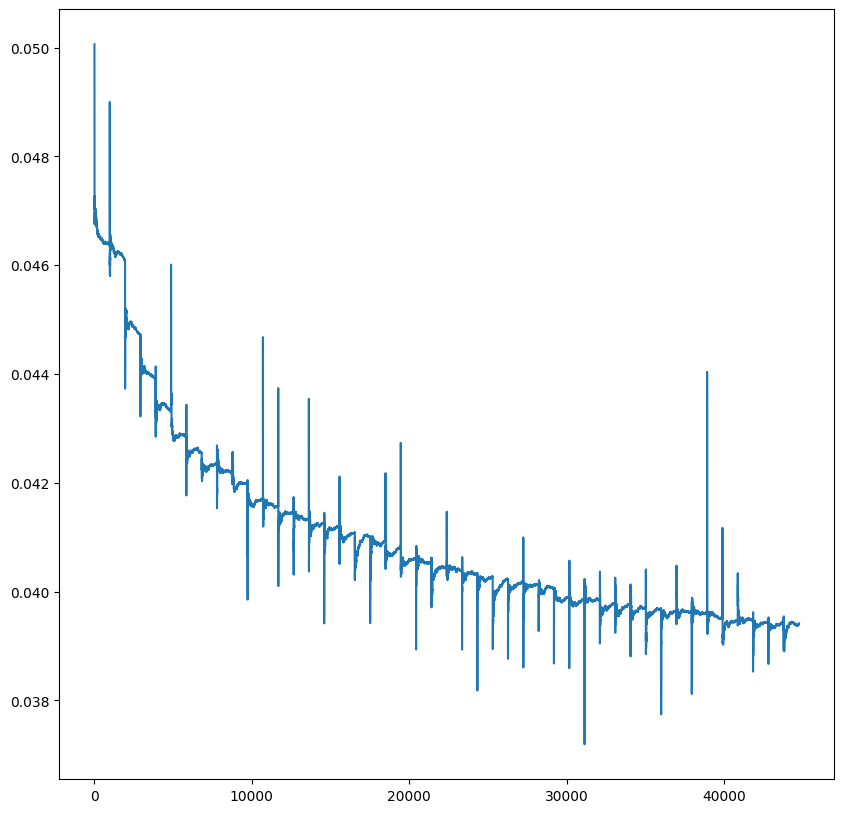

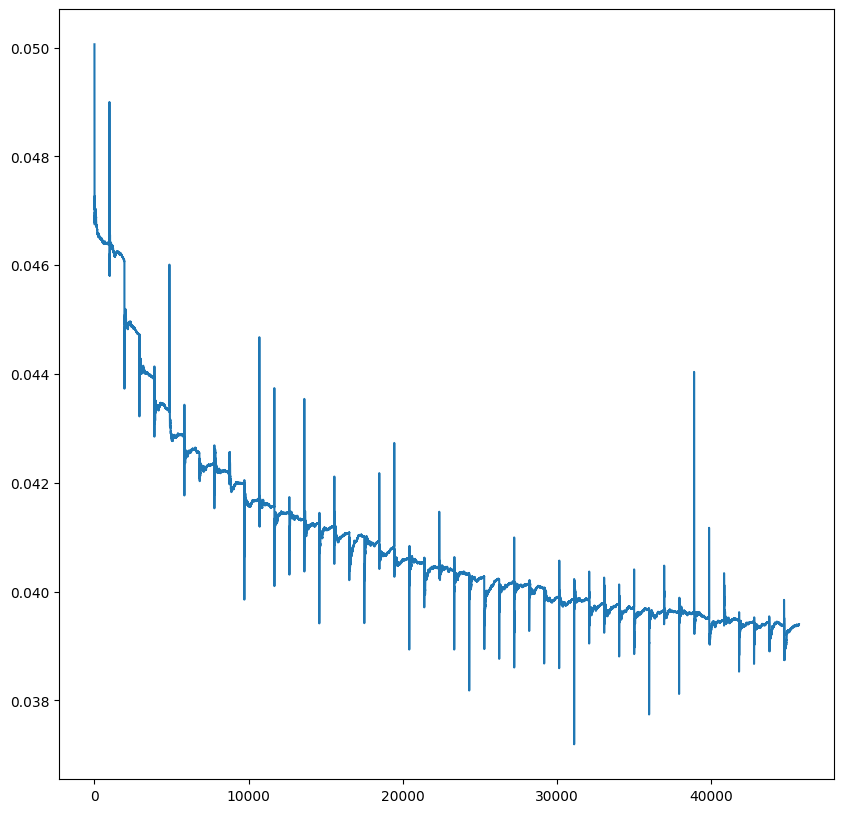

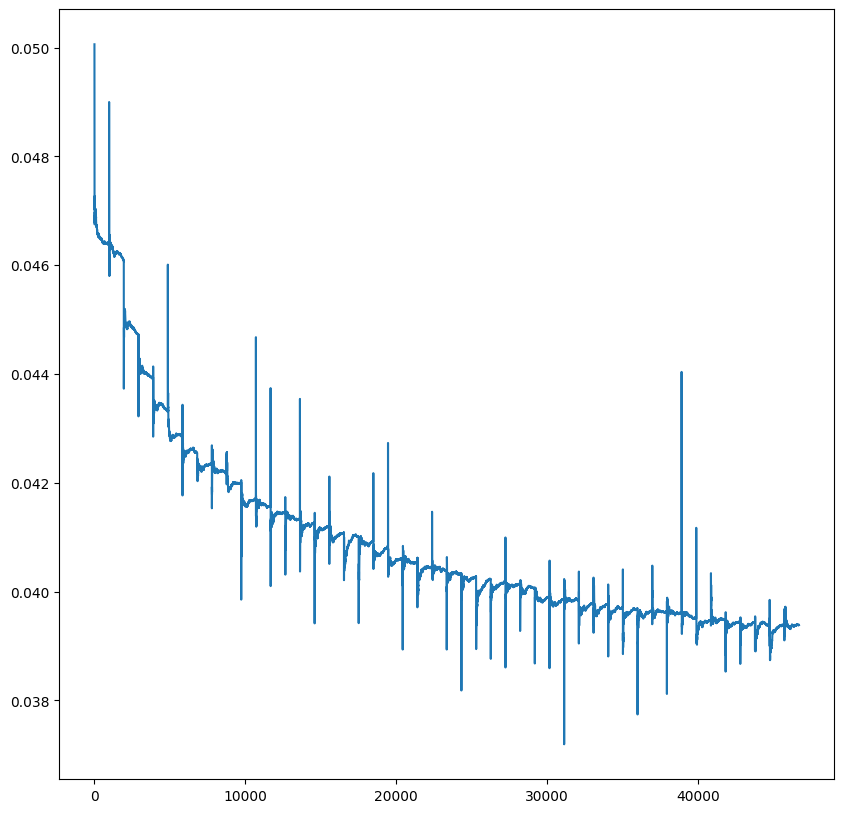

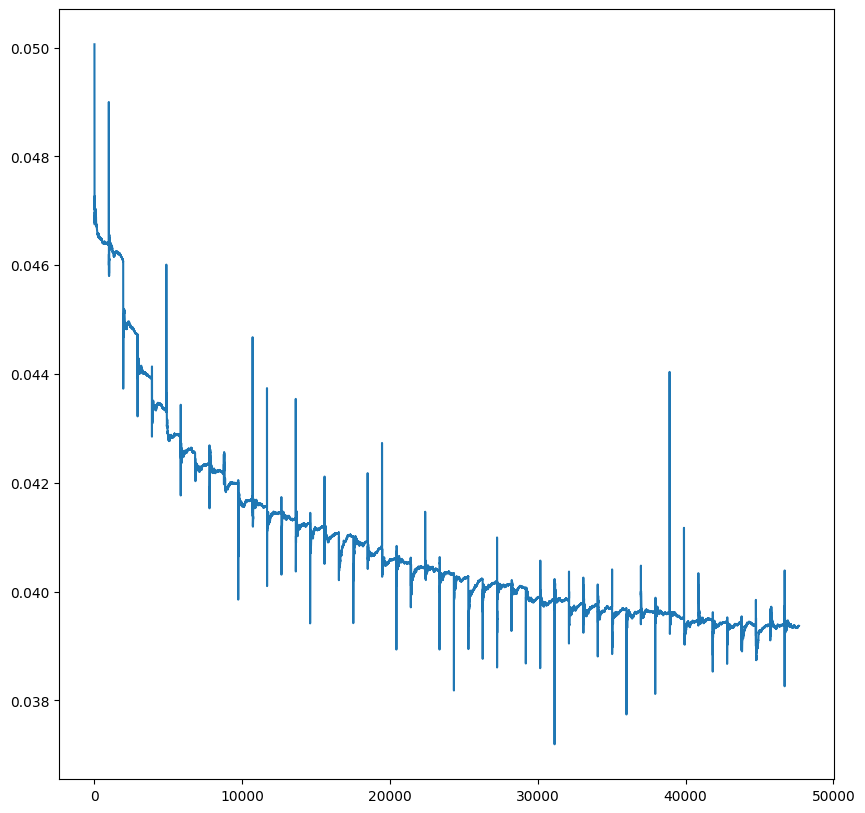

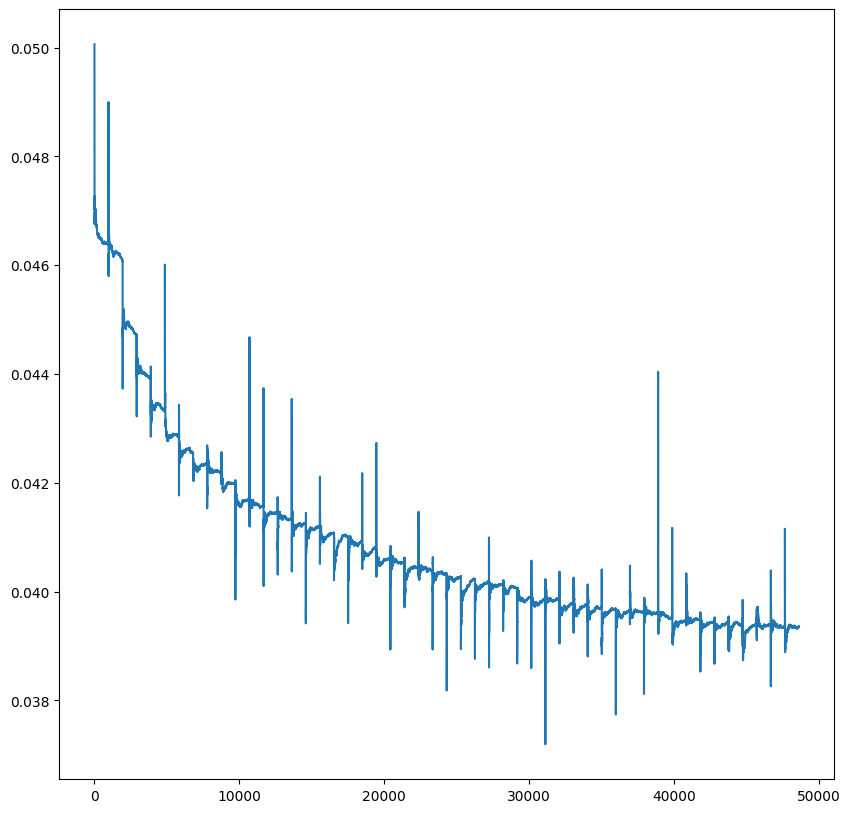

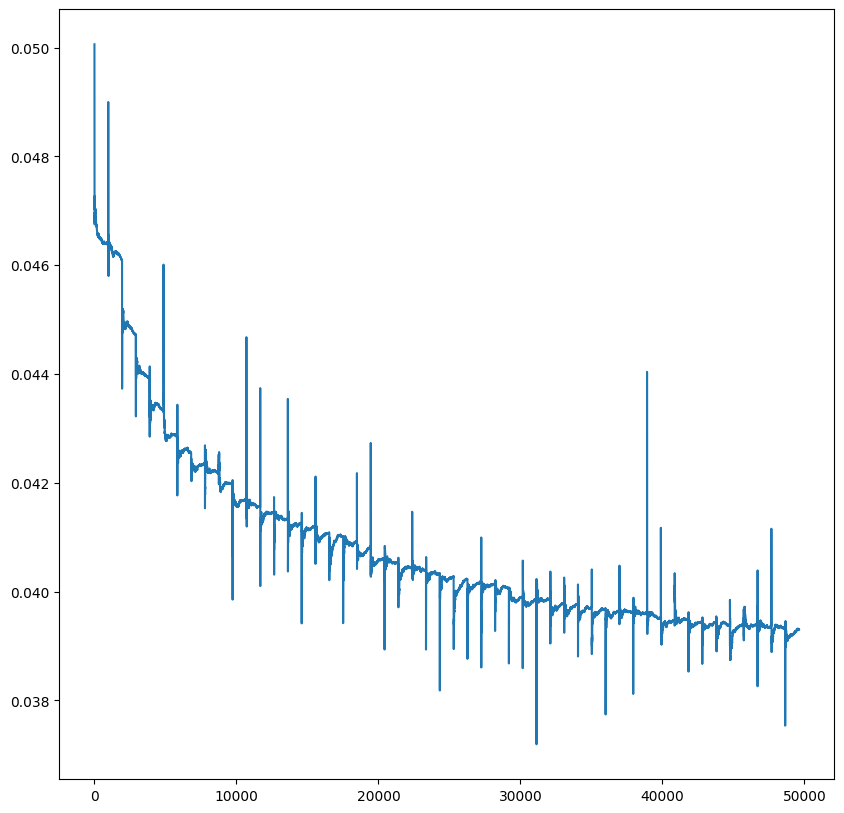

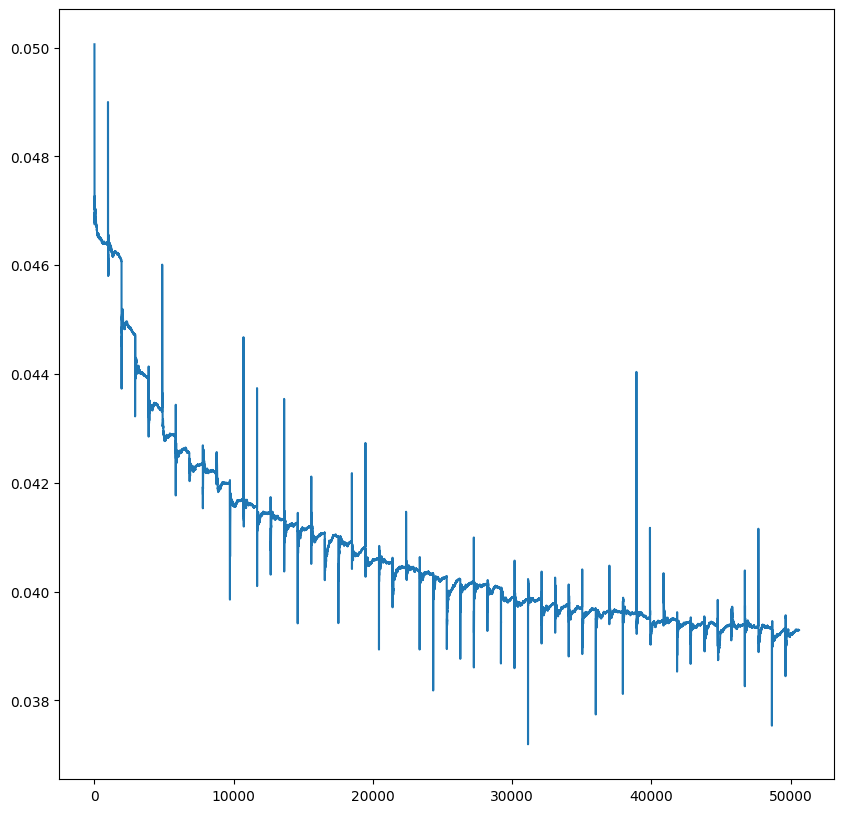

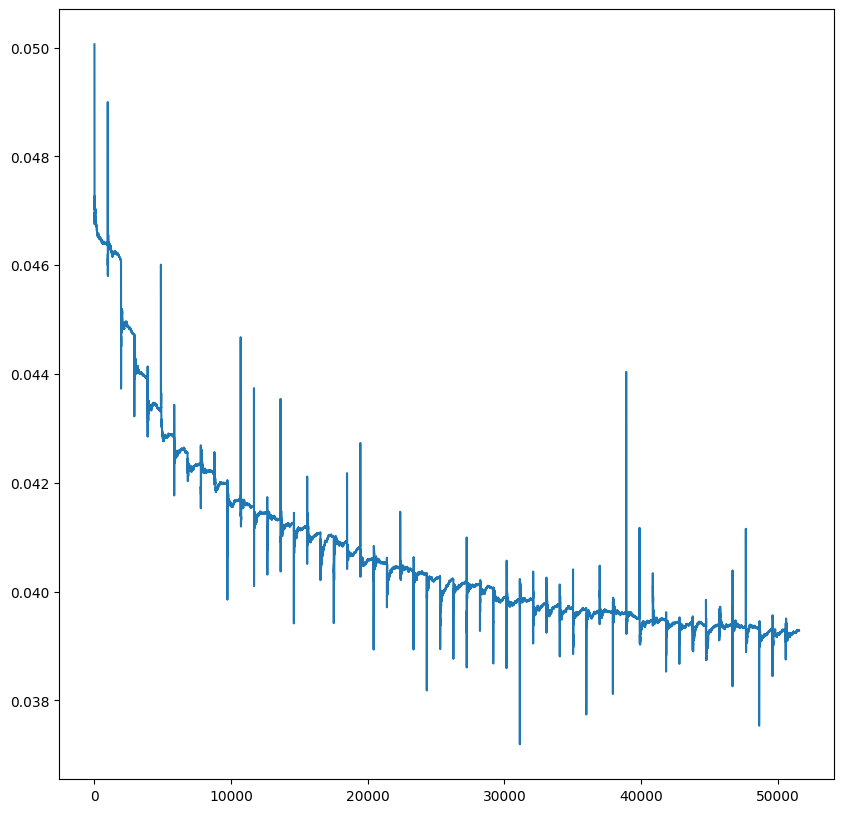

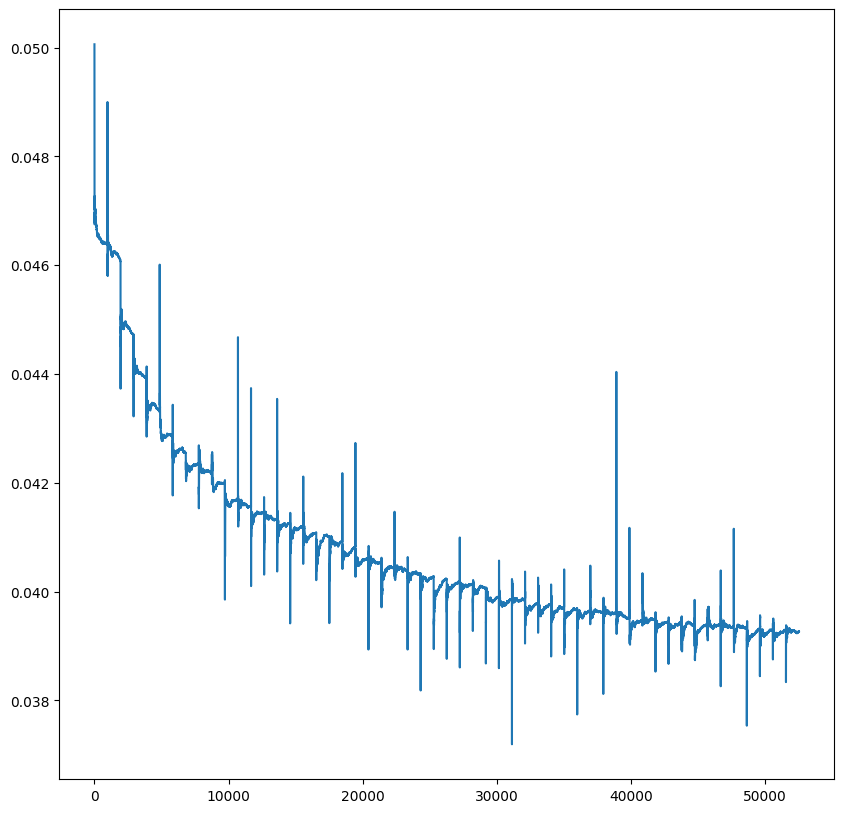

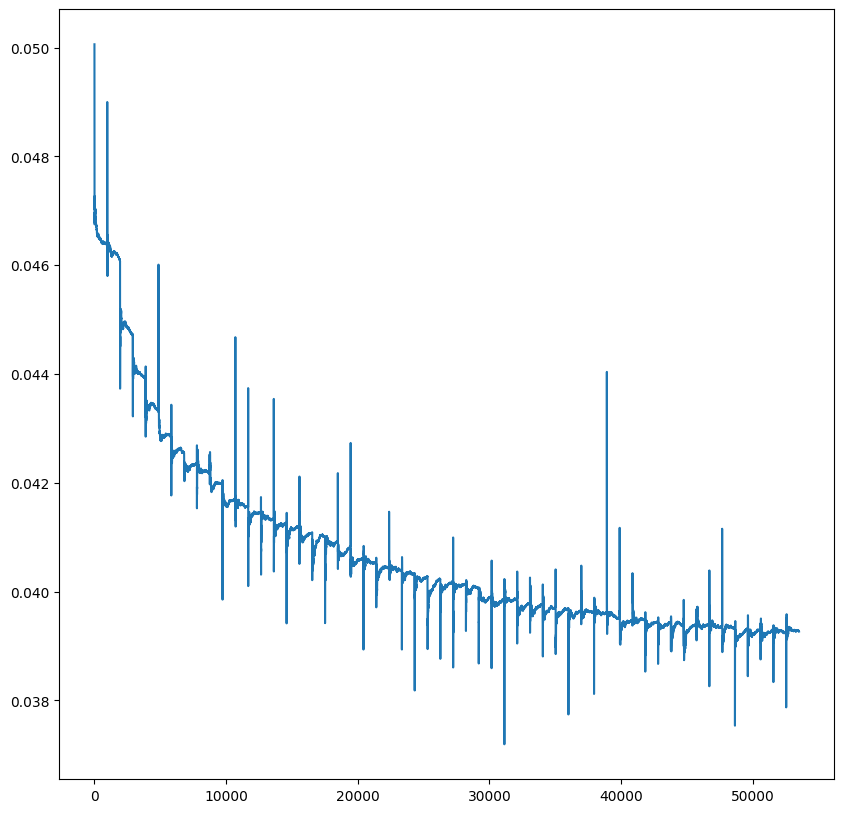

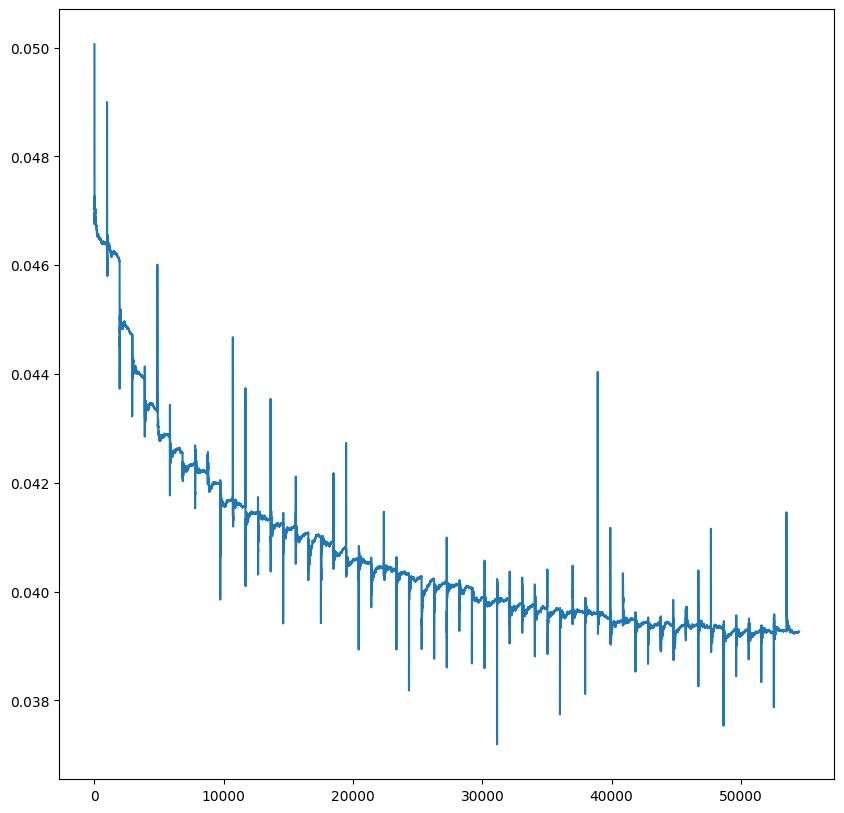

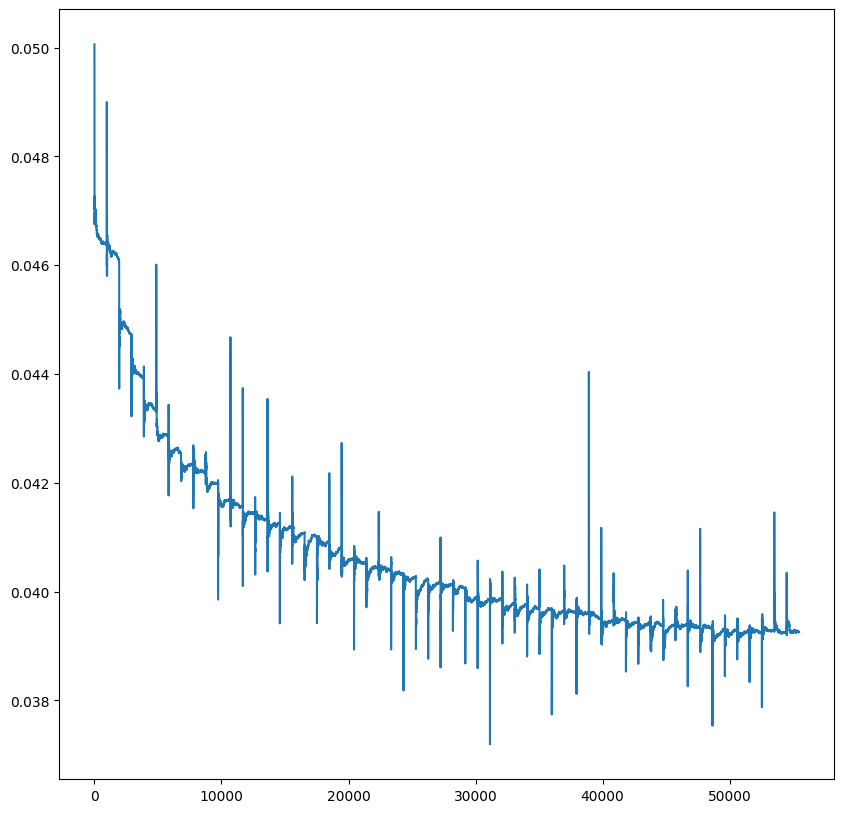

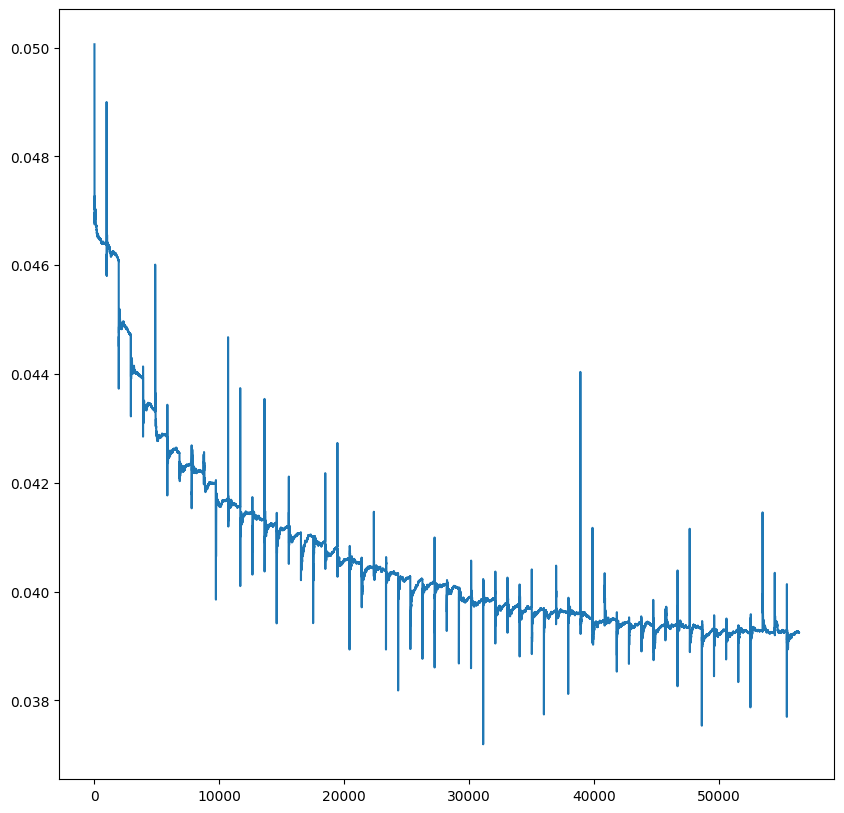

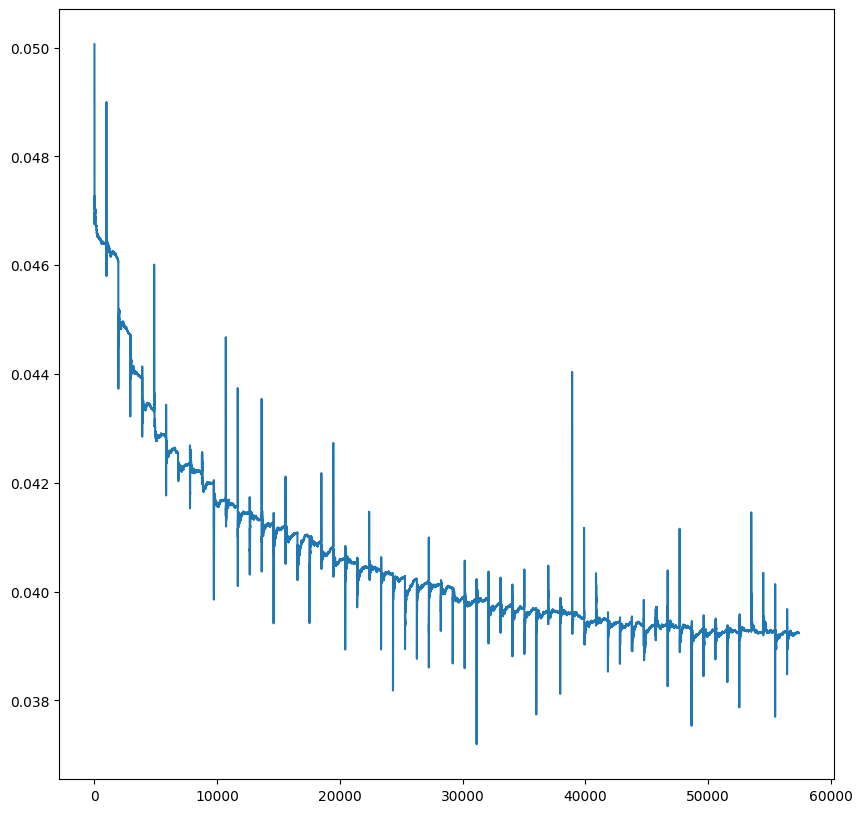

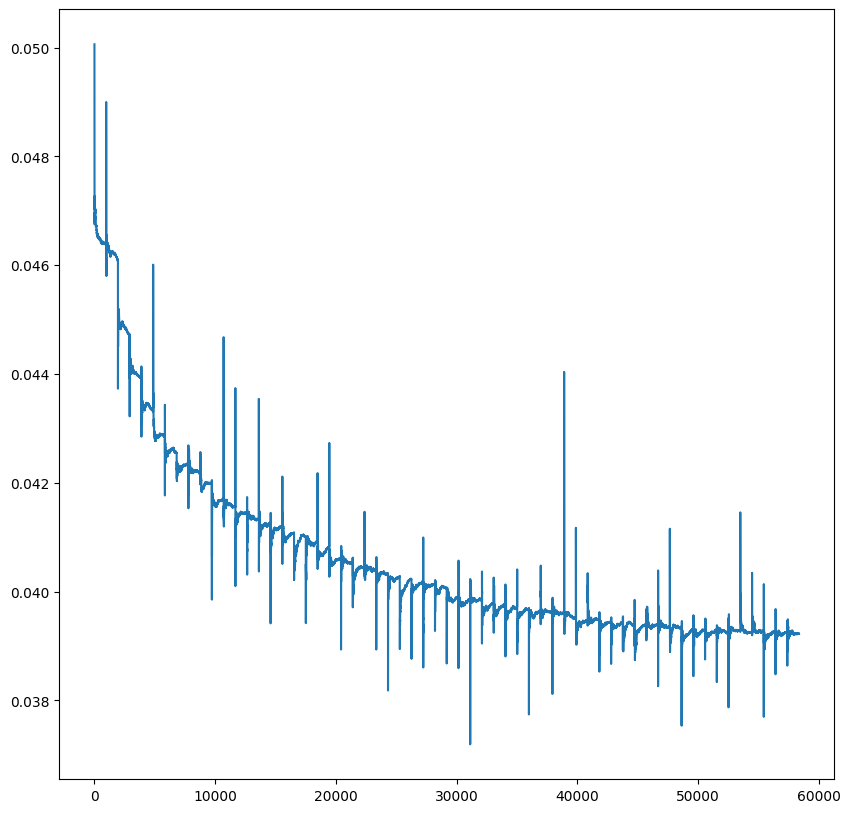

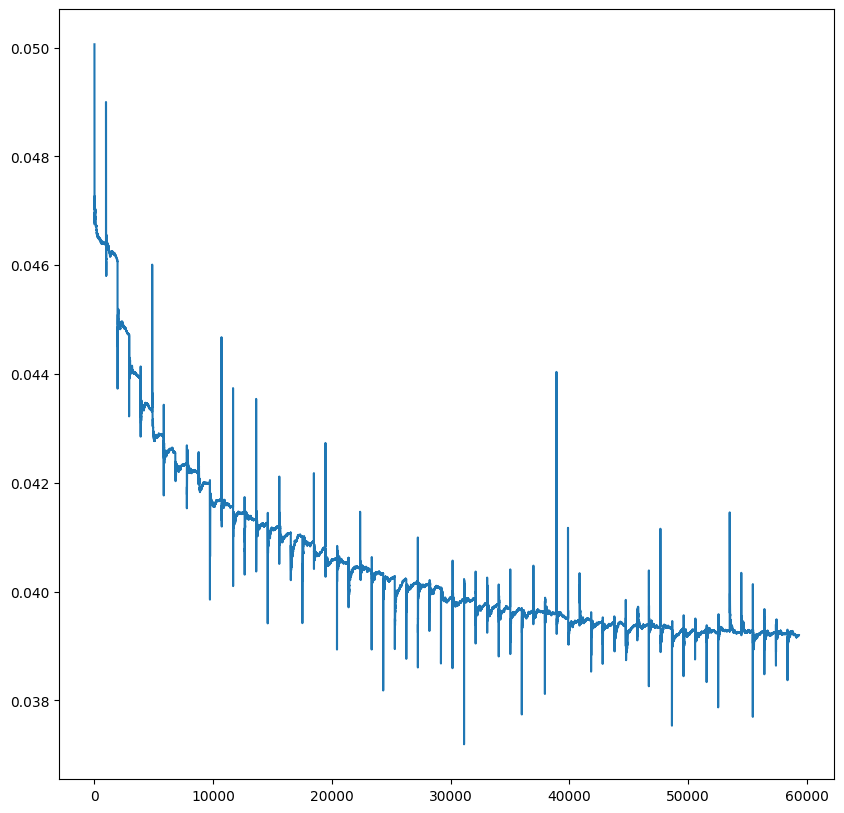

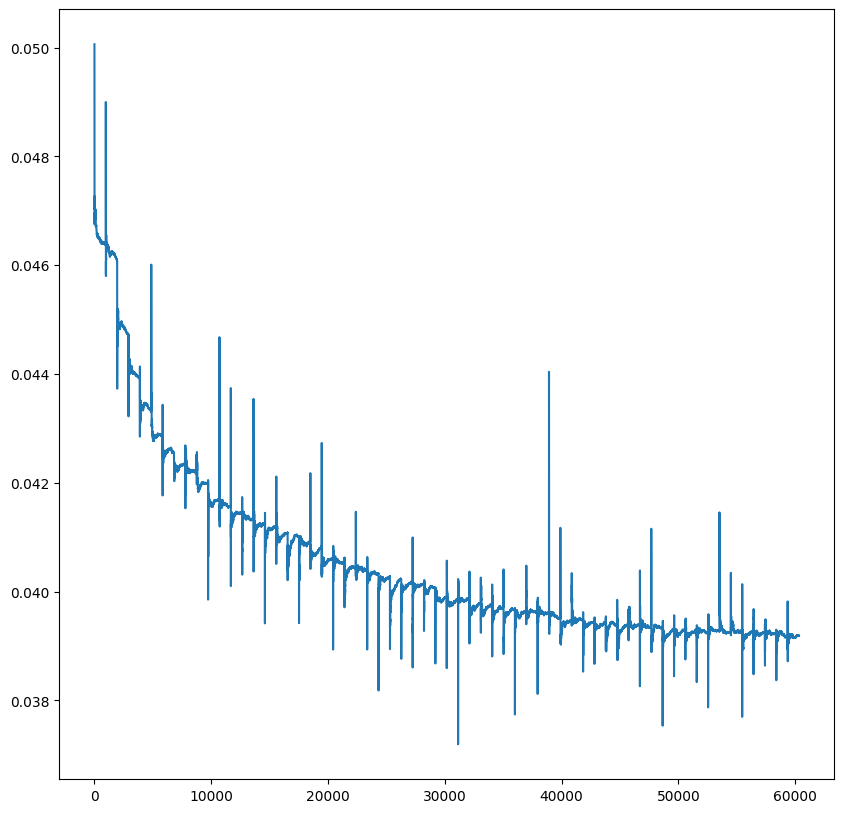

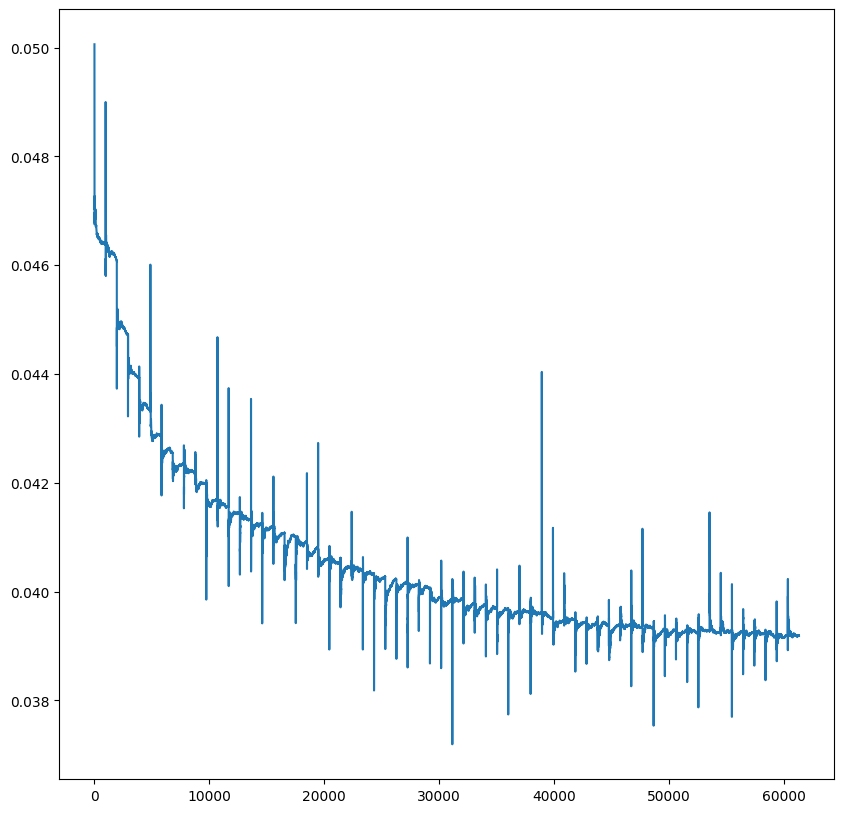

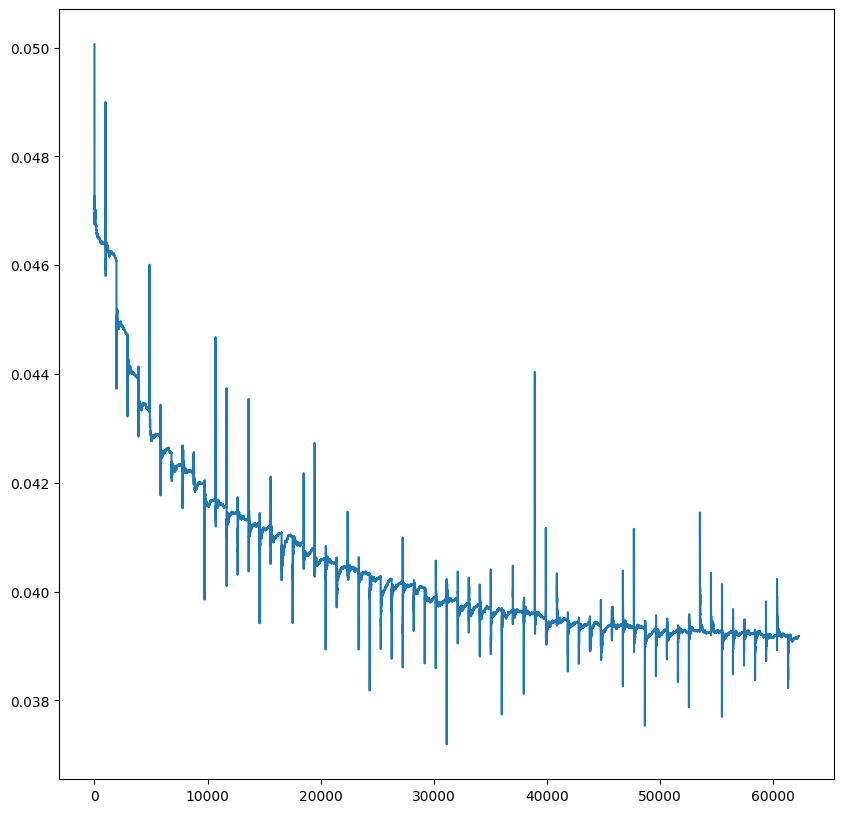

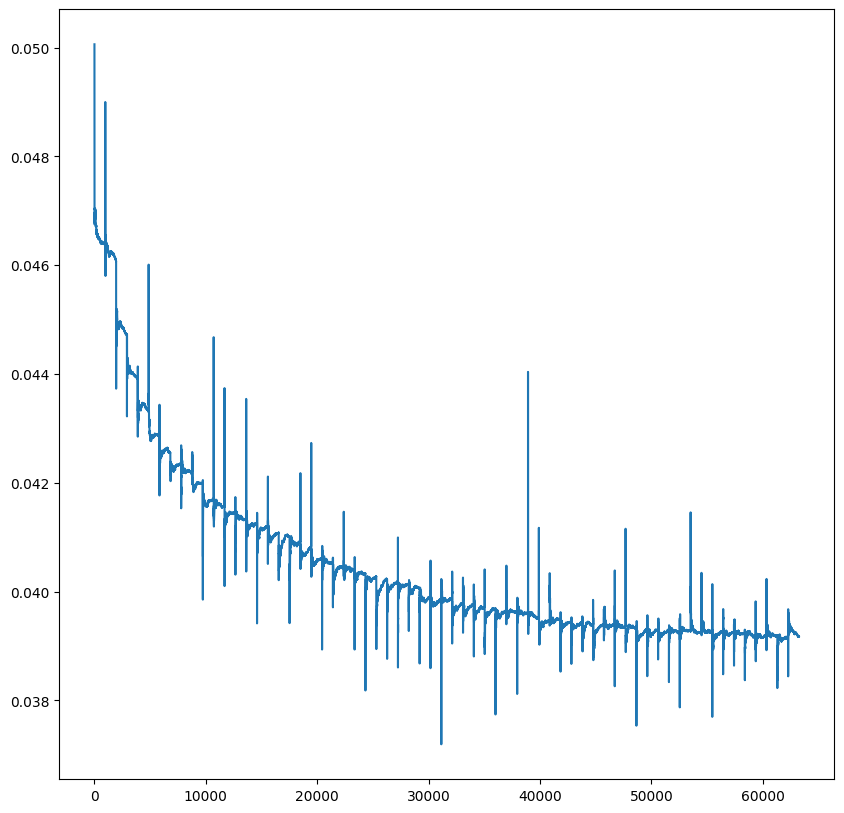

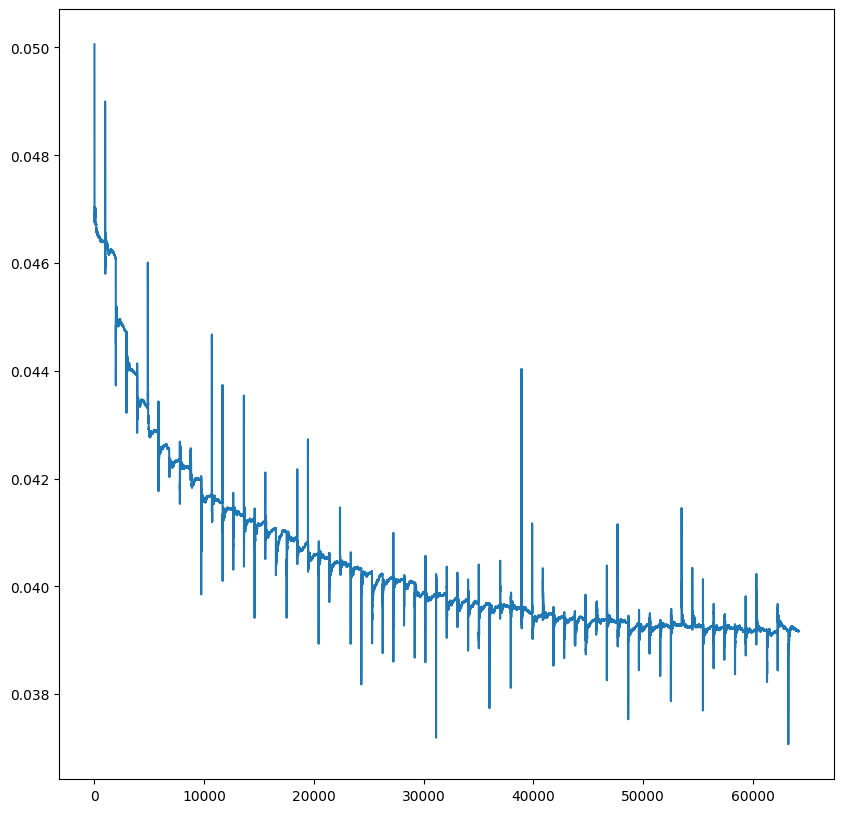

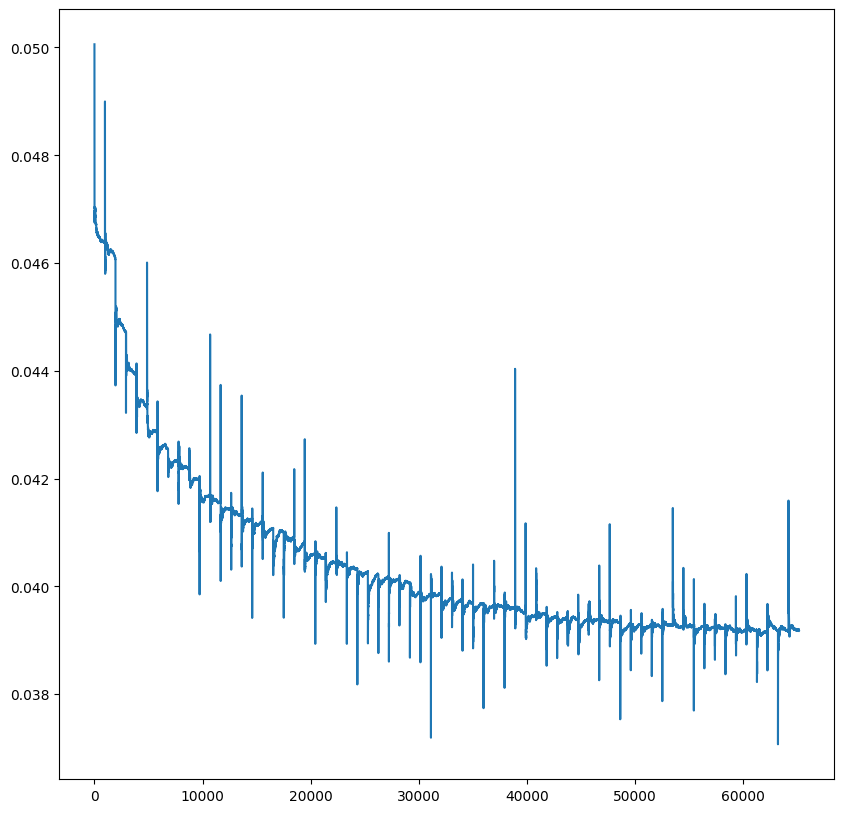

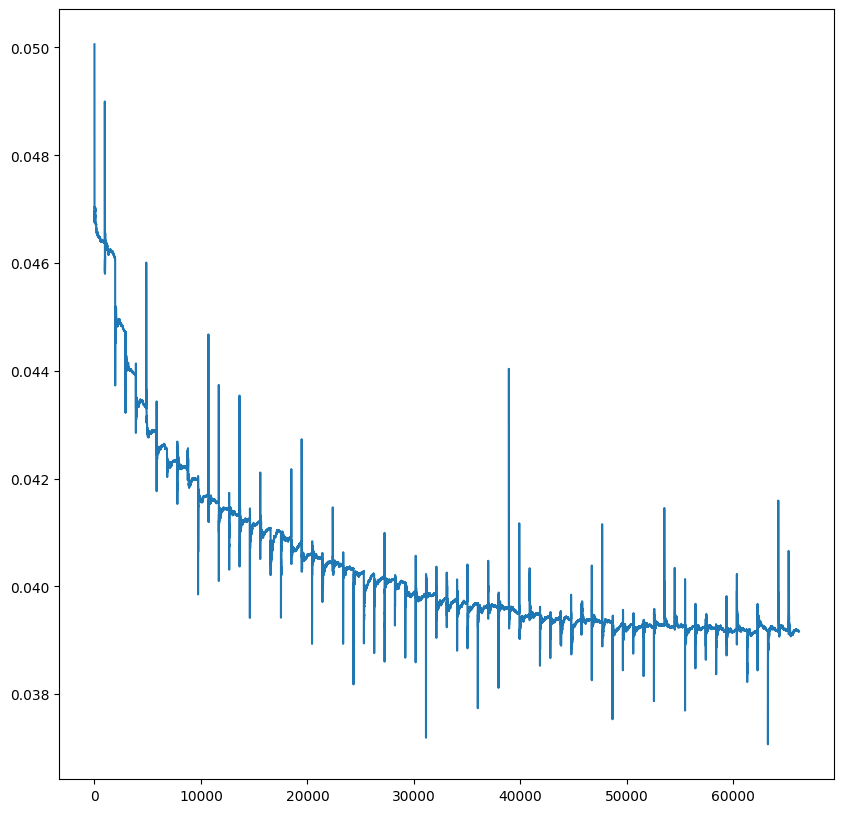

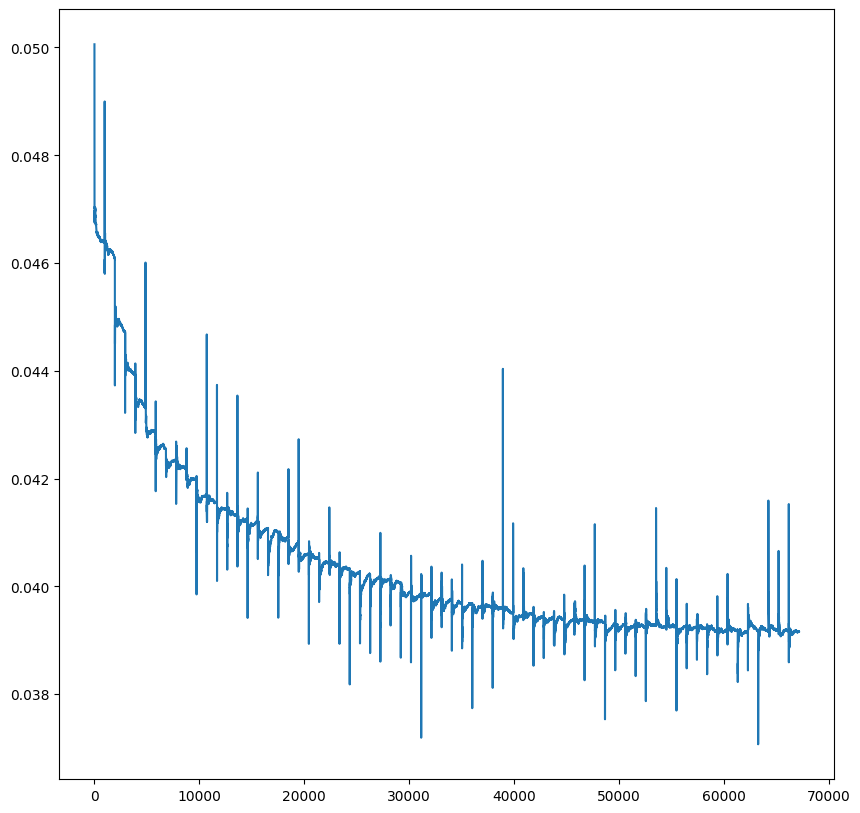

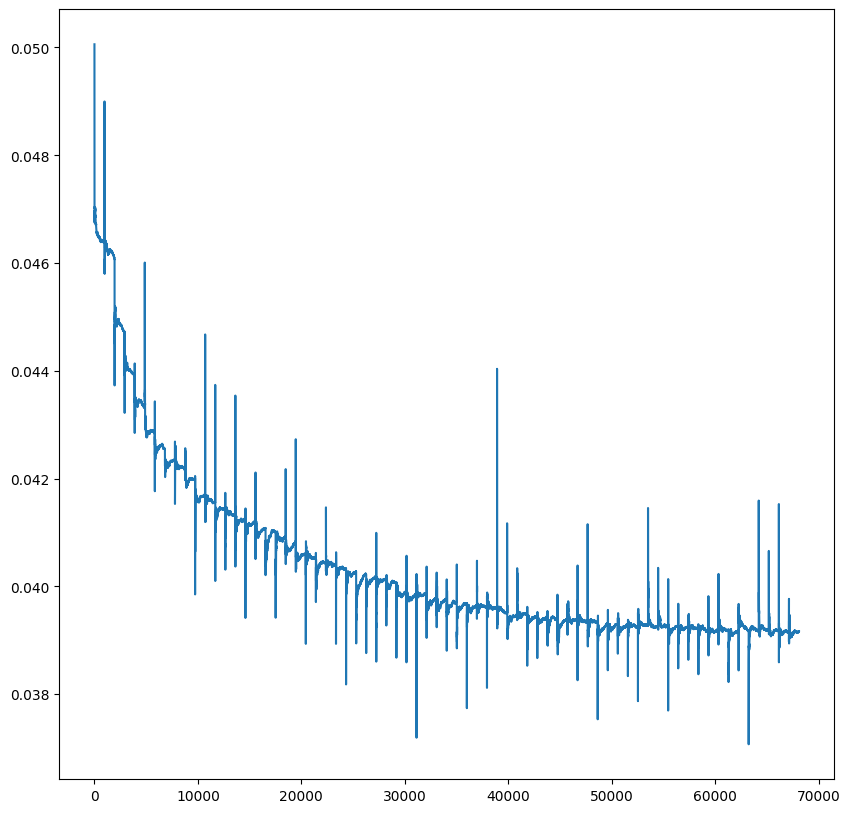

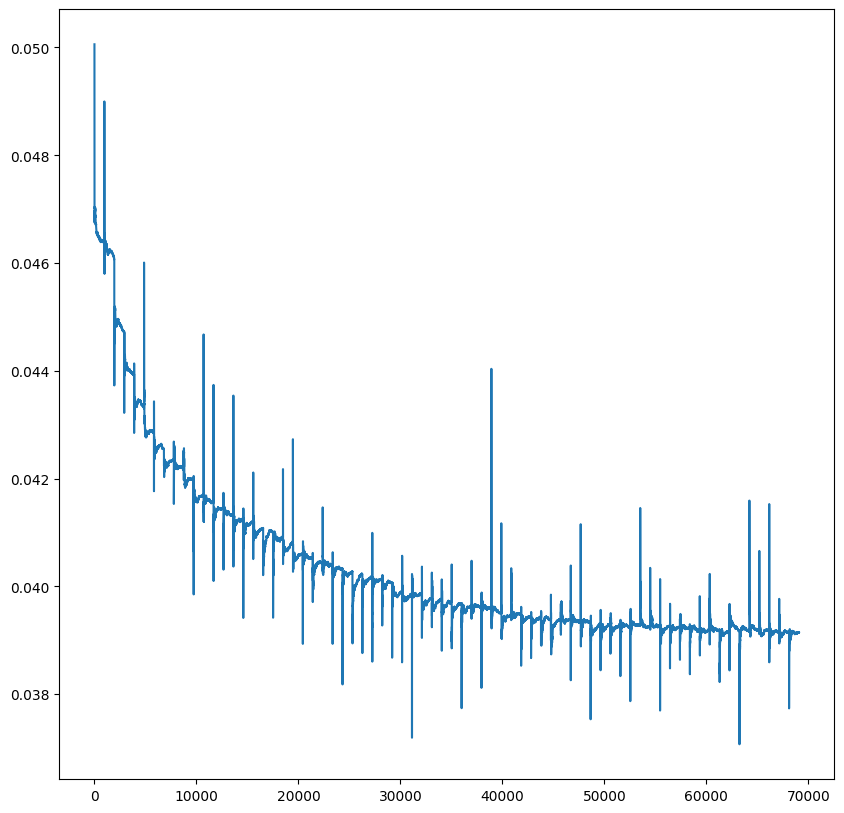

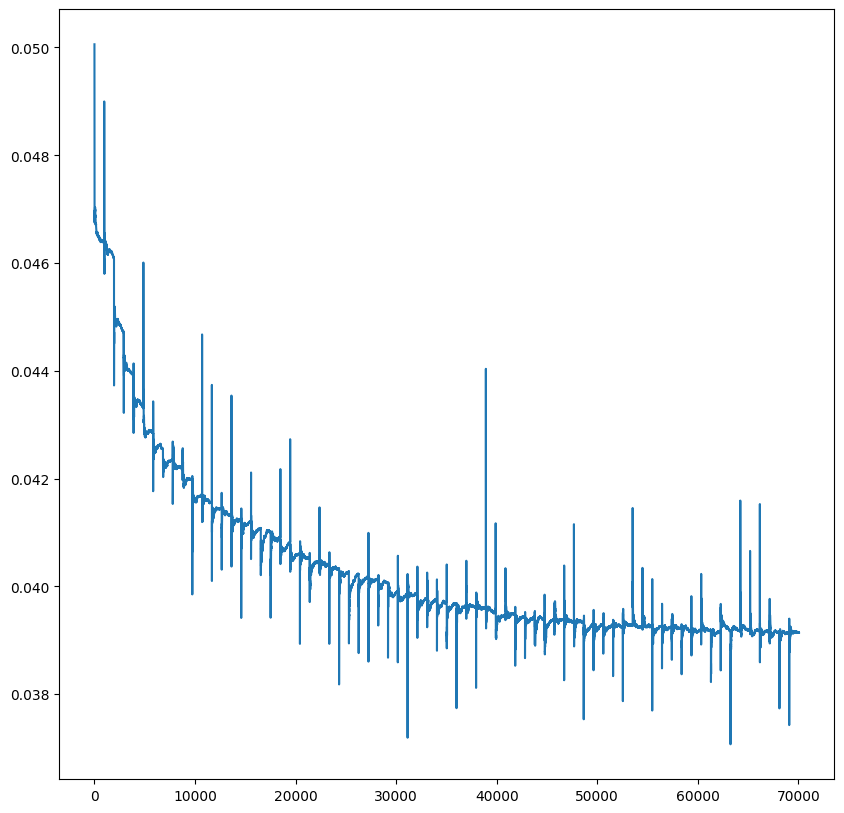

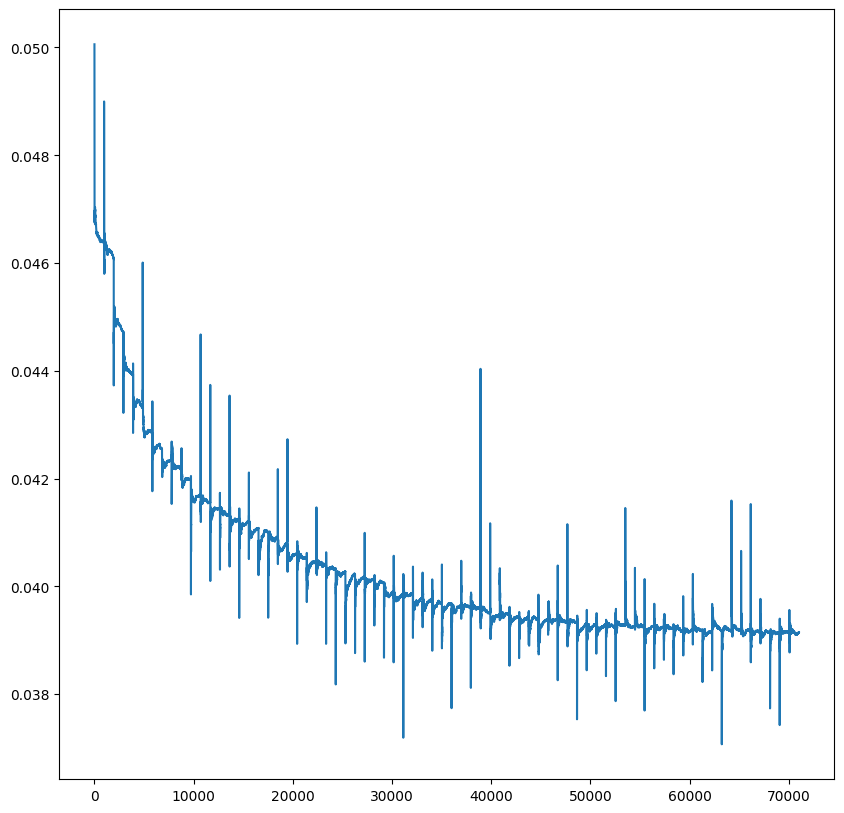

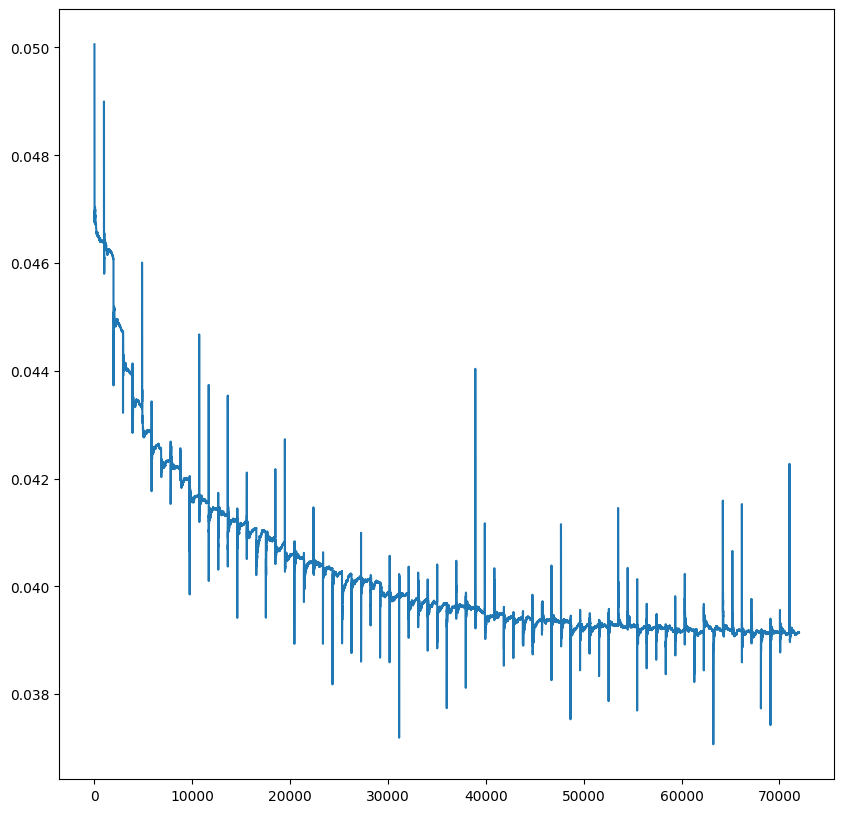

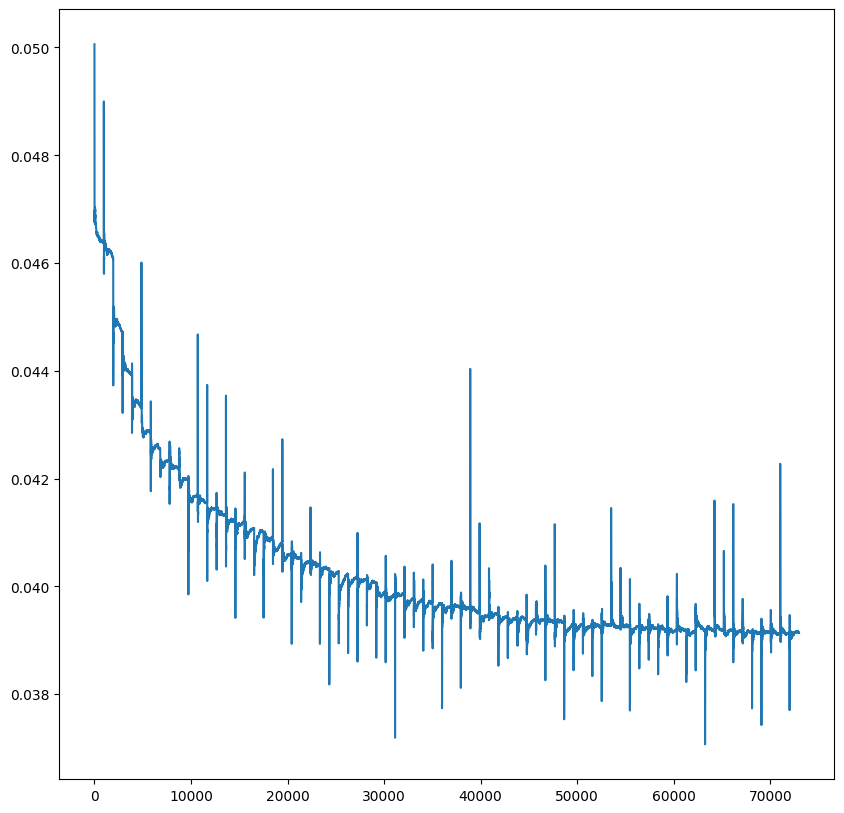

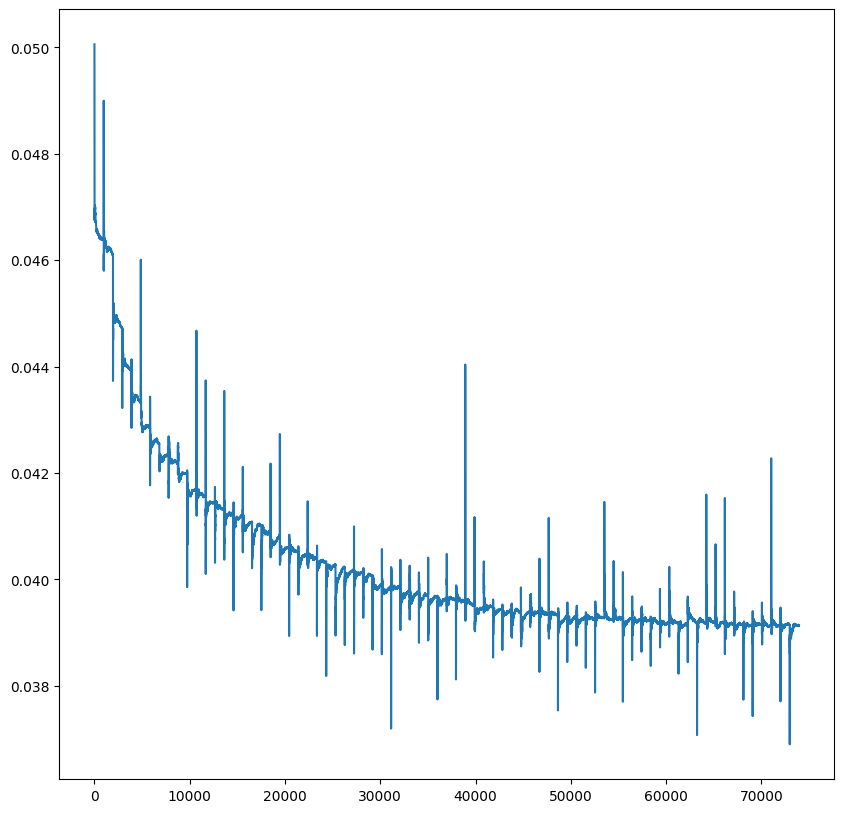

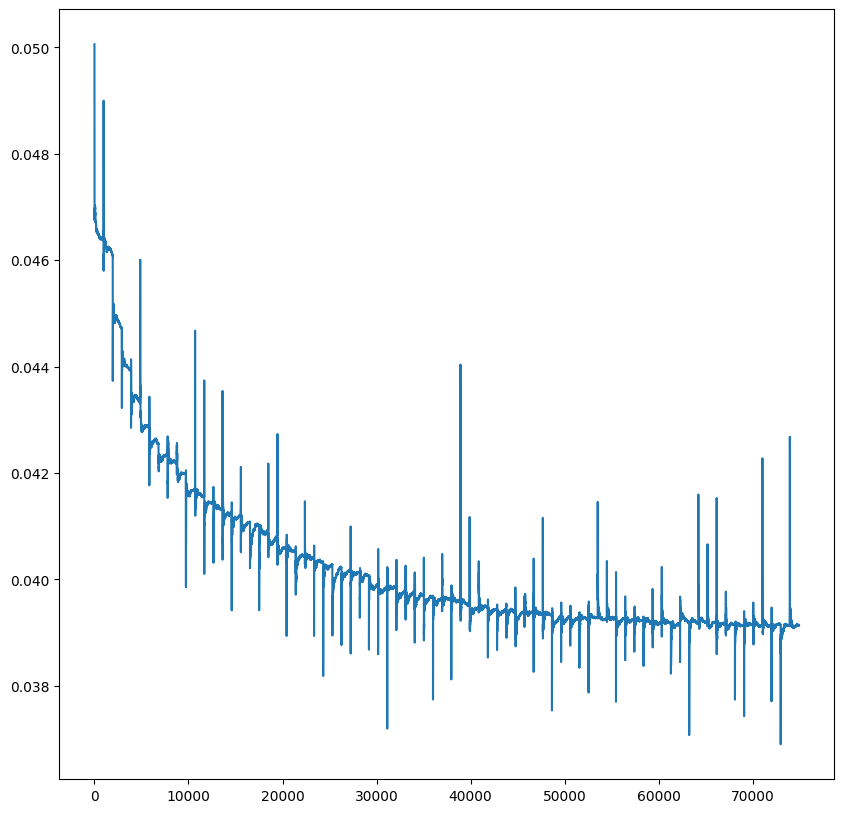

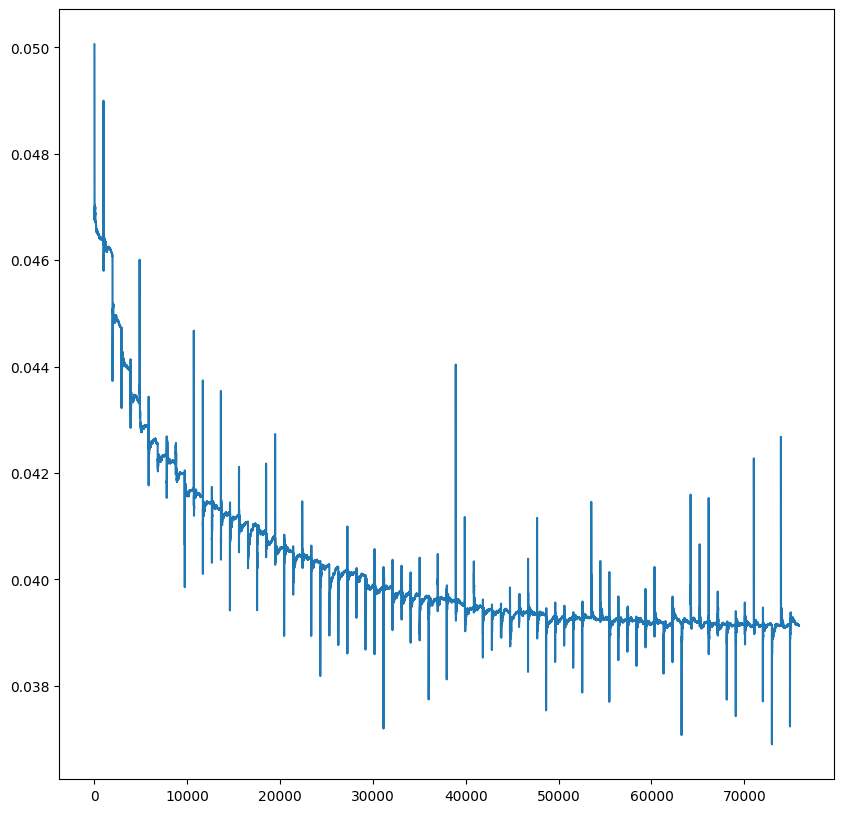

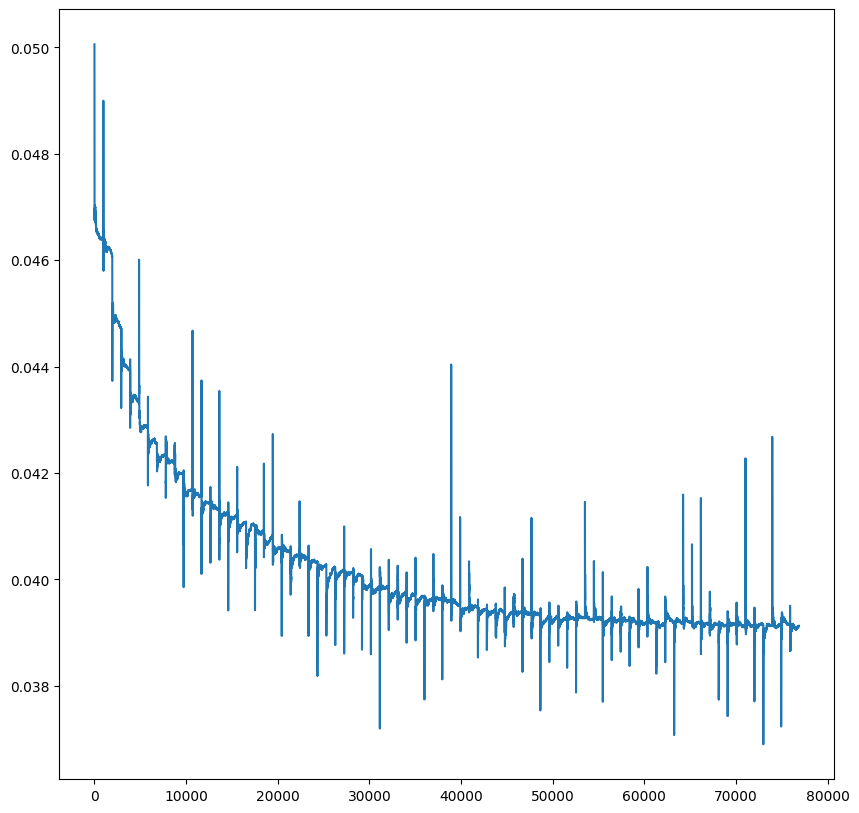

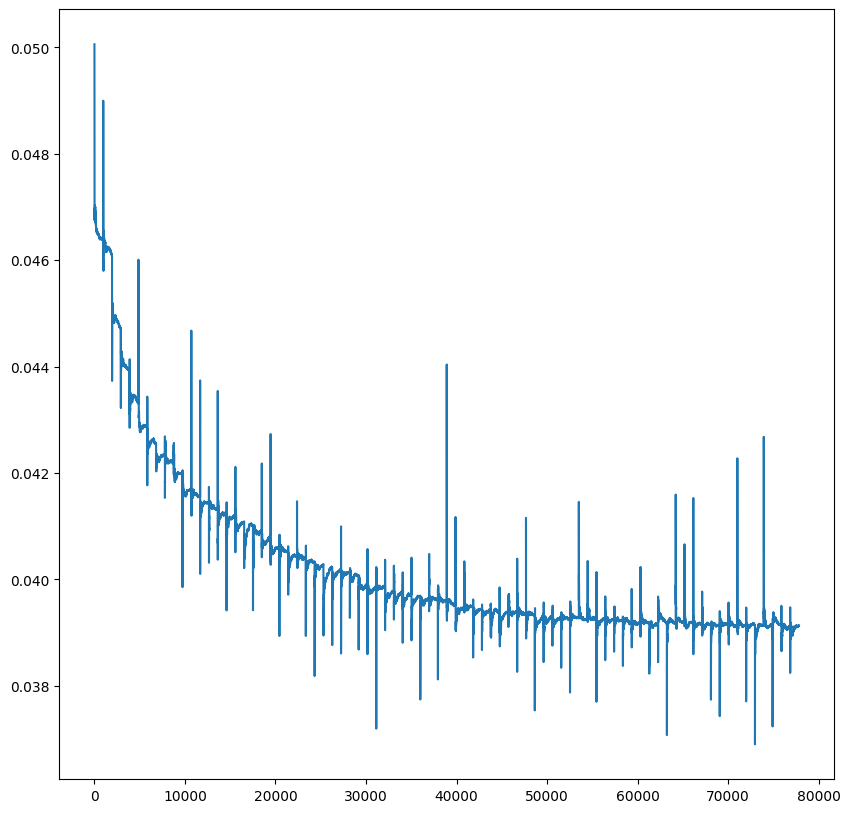

In [47]:
if __name__=='__main__':
  # ================================================================================
  # Create objects
  
  param_super_class_obj=param_class_module.Param_Super_Class(configurable_parameters_dict)
  utils_data_processing_obj=data_processing_module.Utils_Data_Processing(configurable_parameters_dict)
  train_class_obj=train_module.Train_Class(configurable_parameters_dict)
  test_class_obj=test_model_module.Test_Class(configurable_parameters_dict)
  
  # ================================================================================
  # print(train_class_obj.train_start(expression_pert_np_copied_small))
  print(train_class_obj.train_start(expression_pert_np_copied))
  
  # ================================================================================
  # predictions_df=test_class_obj.test_start(expression_pert_np_copied_small)
  
#   # ================================================================================
#   # Add drug label
#   predictions_df['drug']=expression_pert_np_copied_small[:,-1]
#   print('predictions_df',predictions_df)

#   # ================================================================================
#   d={'drug_num':list(dictionary.values()),
#      'drug_string':list(dictionary.keys())}
#   df=pd.DataFrame(d)
  
#   finale_pred=predictions_df.merge(df,left_on='drug',right_on='drug_num',how='inner')
  
#   with open('./result_files/embedding_vectors.pkl','wb') as f:
#     pickle.dump(finale_pred,f)